Below is a demonstration of the intended analysis for Chapter Two of my PhD. This analysis uses the BCS dataset using sweeps 1-6 (1970-2000). The following analysis focuses upon Youth Transition after mandatory education. This analysis attempts to understand the decisions, choices, and constraints that individuals face when negotiating entry into economic activity post-mandatory schooling for the first time. As such, the outcome variable of interest is a post-hoc economic activity entry from a sub-sample sweep at age 21 and sweep 6 when individuals were aged 30 - the outcome variable in question covers the month of September when individuals were aged 16 years old. The independent variables of interest are: Sex, Housing Tenure when a child, Parental Social Class when a child, Educational Attainment at 16 (Number of O-level Passes), Reading and Maths scores at age 11. 

The analysis below is made up of several important steps. Firstly the data is cleaned and recoded in a way that the data will be used all throughout the rest of the analysis. Secondly, descriptive statistics will be produced to best understand the data. Third, model construction and sensitivity analysis of social class measures. Finally, there will be an attempt to handle missing data within the model. 

In [1]:
import stata_setup

stata_setup.config("C:\Program Files\Stata18", "se")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      18.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2023 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user network, expiring 14 Sep 2024
Serial number: 401809305318
  Licensed to: Scott Oatley
               University of Edinburgh

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


Part One: Data Cleaning 

The import command tells Jupyter Notebook to import stata from its given location in my internal system and call it up for use in the virutal notebook. 

In [2]:
%%stata

cd "G:\Stata data and do\BCS\BCS Birth\stata9"

use "G:\Stata data and do\BCS\BCS Birth\stata9\bcs7072a"


. 
. cd "G:\Stata data and do\BCS\BCS Birth\stata9"
G:\Stata data and do\BCS\BCS Birth\stata9

. 
. use "G:\Stata data and do\BCS\BCS Birth\stata9\bcs7072a"

. 


This sets the root directory and loads the database related to the BCS cohort when they were 10 years old. This dataset contains maths and reading scores that can be used as prior educational outcome variables in the proposed model. The BCS does offer maths and reading scores at age 16 - similar to the NCDS, however the amount of missingness at this age for the BCS cohort makes choosing the age 16 scores over the age 10 scores much less attractive. 

In [3]:
%%stata

gen sex=.
replace sex=0 if (a0255==1)
replace sex=1 if (a0255==2)

label define sex_lbl 1"Male" 0"Female"
label values sex sex_lbl


. 
. gen sex=.
(17,196 missing values generated)

. replace sex=0 if (a0255==1)
(8,906 real changes made)

. replace sex=1 if (a0255==2)
(8,279 real changes made)

. 
. label define sex_lbl 1"Male" 0"Female"

. label values sex sex_lbl

. 


Starting with the Birth Sweep to get the highest amount of responses possible - Sex is recoded for analysis. On top of this, for later imputation, auxillary variables will be recoded also - using the Missing Data Guide for the BCS variables: have been identified for auxillary status.

In [4]:
%%stata

gen pmart=.
replace pmart=0 if (a0012==1)
replace pmart=1 if (a0012==2)
replace pmart=0 if (a0012==3)
replace pmart=0 if (a0012==4)
replace pmart=0 if (a0012==5)

label define pmart_lbl 0"Single" 1"Married"
label values pmart pmart_lbl

gen parity=.
replace parity=1 if(a0166==0)
replace parity=2 if(a0166==1)
replace parity=3 if(a0166==2)
replace parity=4 if(a0166==3)
replace parity=4 if(a0166>3 & a0166<18)

label define parity_lbl 1"0" 2"1" 3"2" 4"3+"
label values parity parity_lbl

gen breast=.
replace breast=0 if(a0297==1)
replace breast=1 if(a0297==2)

label define breast_lbl 0"Attempted" 1"Not Attempted"
label values breast breast_lbl

gen mage=.
replace mage=1 if(a0005a>13 & a0005a<20)
replace mage=2 if(a0005a>19 & a0005a<25)
replace mage=3 if(a0005a>24 & a0005a<30)
replace mage=4 if(a0005a>29 & a0005a<35)
replace mage=5 if(a0005a>34 & a0005a<53)

label define mage_lbl 1"less than 20" 2"20-24" 3"25-29" 4"30-34" 5"35 or more"
label values mage mage_lbl

gen med=.
replace med=1 if(a0009>6 & a0009<15)
replace med=2 if(a0009==15)
replace med=3 if(a0009==16)
replace med=4 if(a0009==17)
replace med=5 if(a0009>17 & a0009<32)

label define med 1"14 or less" 2"15" 3"16" 4"17" 5"18 or more"
label values med med_lbl 

gen fed=.
replace fed=1 if(a0010>6 & a0010<15)
replace fed=2 if(a0010==15)
replace fed=3 if(a0010==16)
replace fed=4 if(a0010==17)
replace fed=5 if(a0010>17 & a0010<32)

label define fed 1"14 or less" 2"15" 3"16" 4"17" 5"18 or more"
label values fed fed_lbl

keep sex bcsid pmart parity breast mage med fed


. 
. gen pmart=.
(17,196 missing values generated)

. replace pmart=0 if (a0012==1)
(952 real changes made)

. replace pmart=1 if (a0012==2)
(15,914 real changes made)

. replace pmart=0 if (a0012==3)
(23 real changes made)

. replace pmart=0 if (a0012==4)
(62 real changes made)

. replace pmart=0 if (a0012==5)
(228 real changes made)

. 
. label define pmart_lbl 0"Single" 1"Married"

. label values pmart pmart_lbl

. 
. gen parity=.
(17,196 missing values generated)

. replace parity=1 if(a0166==0)
(6,389 real changes made)

. replace parity=2 if(a0166==1)
(5,520 real changes made)

. replace parity=3 if(a0166==2)
(2,787 real changes made)

. replace parity=4 if(a0166==3)
(1,266 real changes made)

. replace parity=4 if(a0166>3 & a0166<18)
(1,202 real changes made)

. 
. label define parity_lbl 1"0" 2"1" 3"2" 4"3+"

. label values parity parity_lbl

. 
. gen breast=.
(17,196 missing values generated)

. replace breast=0 if(a0297==1)
(6,311 real changes made)

. replace breast=1 if(a0

Merging datasets will follow in a temporal manner. Starting at the oldest dataset (age 10) and ending in the youngest (age 30). 

In [5]:
%%stata

cd"G:\Stata data and do\BCS\BCS Sweep 10\UKDA-3723-stata\stata\stata11_se"

merge m:1 bcsid using sn3723
drop _merge


. 
. cd"G:\Stata data and do\BCS\BCS Sweep 10\UKDA-3723-stata\stata\stata11_se"
G:\Stata data and do\BCS\BCS Sweep 10\UKDA-3723-stata\stata\stata11_se

. 
. merge m:1 bcsid using sn3723

    Result                      Number of obs
    -----------------------------------------
    Not matched                         4,514
        from master                     3,420  (_merge==1)
        from using                      1,094  (_merge==2)

    Matched                            13,776  (_merge==3)
    -----------------------------------------

. drop _merge

. 


In [6]:
%%stata

tab d2

gen htenure=.
replace htenure=0 if (d2==1)
replace htenure=0 if (d2==2)

replace htenure=1 if (d2==3)
replace htenure=1 if (d2==4)
replace htenure=1 if (d2==5)
replace htenure=1 if (d2==6)
replace htenure=1 if (d2==7)

tab htenure

label define tenure_lbl 0"Own Home" 1"Don't Own Home"
label value htenure tenure_lbl

keep bcsid htenure sex pmart parity breast mage med fed


. 
. tab d2

  IS ACCOMMODATION OWNED OR |
                 RENTED?    |      Freq.     Percent        Cum.
----------------------------+-----------------------------------
             Owned outright |      1,530       11.25       11.25
               Being bought |      6,809       50.04       61.29
            Rented, Council |      4,374       32.15       93.44
Rented, Private unfurnished |        425        3.12       96.56
  Rented, Private furnished |         31        0.23       96.79
         Tied to occupation |        391        2.87       99.66
                      Other |         46        0.34      100.00
----------------------------+-----------------------------------
                      Total |     13,606      100.00

. 
. gen htenure=.
(18,290 missing values generated)

. replace htenure=0 if (d2==1)
(1,530 real changes made)

. replace htenure=0 if (d2==2)
(6,809 real changes made)

. 
. replace htenure=1 if (d2==3)
(4,374 real changes made)

. replace htenure=1 i

The next dataset in question is the Occupational Codes dataset created by (Gregg 2012). This provides occupational codes for both the father and mother of the participant at age 10. This is identical in coding structure to the occupational codes for fathers in the NCDS with the added bonus of being available for mothers also. Having both father and mother occupational codes allows for mothers occupational data to replace missing data from fathers. Unfortunately the BCS does not offer data on the hours total worked by each parent so a true dominance approach could not be implemented. This filling in missing data approach also only works for two of the three social stratification measures - NS-SEC and RGSC. Camsis is sensitive to the gender of the parent and so will not be combined in a semi-dominance approach.

In [7]:
%%stata

cd "G:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9"

rename bcsid BCSID

merge m:1 BCSID using bcs3_occupation_coding_father


gen nssecf=. 
replace nssecf=1 if (B3FSNSSEC==2)

replace nssecf=2 if (B3FSNSSEC==3.1)
replace nssecf=2 if (B3FSNSSEC==3.2)
replace nssecf=2 if (B3FSNSSEC==3.3)

replace nssecf=3 if (B3FSNSSEC==4.1)
replace nssecf=3 if (B3FSNSSEC==4.2)
replace nssecf=3 if (B3FSNSSEC==4.3)
replace nssecf=3 if (B3FSNSSEC==5)

replace nssecf=4 if (B3FSNSSEC==7.1)
replace nssecf=4 if (B3FSNSSEC==7.2)
replace nssecf=4 if (B3FSNSSEC==7.3)
replace nssecf=4 if (B3FSNSSEC==7.4)

replace nssecf=5 if (B3FSNSSEC==8.1)
replace nssecf=5 if (B3FSNSSEC==9.1)
replace nssecf=5 if (B3FSNSSEC==9.2)

replace nssecf=6 if (B3FSNSSEC==10)
replace nssecf=6 if (B3FSNSSEC==11.1)
replace nssecf=6 if (B3FSNSSEC==11.2)

replace nssecf=7 if (B3FSNSSEC==12.1)
replace nssecf=7 if (B3FSNSSEC==12.2)
replace nssecf=7 if (B3FSNSSEC==12.3)
replace nssecf=7 if (B3FSNSSEC==12.4)
replace nssecf=7 if (B3FSNSSEC==12.5)
replace nssecf=7 if (B3FSNSSEC==12.6)
replace nssecf=7 if (B3FSNSSEC==12.7)

replace nssecf=8 if (B3FSNSSEC==13.1)
replace nssecf=8 if (B3FSNSSEC==13.2)
replace nssecf=8 if (B3FSNSSEC==13.3)
replace nssecf=8 if (B3FSNSSEC==13.4)
replace nssecf=8 if (B3FSNSSEC==13.5)

label define nssec_lbl 1"Large Employers and higher managerial occupations" 2"Higher professional occupations" 3"Lower Managerial and professional occupations" 4"Intermediate occupations" 5"Small employers and own account workers" 6"Lower supervisory and technical occupations" 7"Semi-routine occupations" 8"Routine occupations"
label value nssecf nssec_lbl

gen camsisf=.
replace camsisf=85.6 if B3FSSOC90==100
replace camsisf=71.5 if B3FSSOC90==101
replace camsisf=70.7 if B3FSSOC90==102
replace camsisf=69.3 if B3FSSOC90==103
replace camsisf=59.5 if B3FSSOC90==110
replace camsisf=58.2 if B3FSSOC90==111
replace camsisf=55.4 if B3FSSOC90==112
replace camsisf=66.2 if B3FSSOC90==113
replace camsisf=76.4 if B3FSSOC90==120
replace camsisf=65.9 if B3FSSOC90==121
replace camsisf=61.5 if B3FSSOC90==122
replace camsisf=71 if B3FSSOC90==123
replace camsisf=70.4 if B3FSSOC90==124
replace camsisf=70.4 if B3FSSOC90==125
replace camsisf=69.9 if B3FSSOC90==126
replace camsisf=70 if B3FSSOC90==127
replace camsisf=58.5 if B3FSSOC90==130
replace camsisf=65.1 if B3FSSOC90==131
replace camsisf=64.1 if B3FSSOC90==132
replace camsisf=63.7 if B3FSSOC90==139
replace camsisf=57.5 if B3FSSOC90==140
replace camsisf=50.3 if B3FSSOC90==141
replace camsisf=48.3 if B3FSSOC90==142
replace camsisf=77 if B3FSSOC90==150
replace camsisf=68.6 if B3FSSOC90==151
replace camsisf=60 if B3FSSOC90==152
replace camsisf=68.6 if B3FSSOC90==153
replace camsisf=68.6 if B3FSSOC90==154
replace camsisf=68.6 if B3FSSOC90==155
replace camsisf=55.4 if B3FSSOC90==160
replace camsisf=52.6 if B3FSSOC90==169
replace camsisf=68.5 if B3FSSOC90==170
replace camsisf=56.4 if B3FSSOC90==171
replace camsisf=56.9 if B3FSSOC90==172
replace camsisf=56.5 if B3FSSOC90==173
replace camsisf=54 if B3FSSOC90==174
replace camsisf=50.7 if B3FSSOC90==175
replace camsisf=58.1 if B3FSSOC90==176
replace camsisf=73.2 if B3FSSOC90==177
replace camsisf=49.4 if B3FSSOC90==178
replace camsisf=59.5 if B3FSSOC90==179
replace camsisf=71.7 if B3FSSOC90==190
replace camsisf=82.3 if B3FSSOC90==191
replace camsisf=63.5 if B3FSSOC90==199

replace camsisf=73.4 if B3FSSOC90==200
replace camsisf=74.7 if B3FSSOC90==201
replace camsisf=84.4 if B3FSSOC90==202
replace camsisf=81.4 if B3FSSOC90==209
replace camsisf=66.6 if B3FSSOC90==210
replace camsisf=68.5 if B3FSSOC90==211
replace camsisf=68.3 if B3FSSOC90==212
replace camsisf=67.1 if B3FSSOC90==213
replace camsisf=81.9 if B3FSSOC90==214
replace camsisf=80.3 if B3FSSOC90==215
replace camsisf=64.2 if B3FSSOC90==216
replace camsisf=55.8 if B3FSSOC90==217
replace camsisf=60.2 if B3FSSOC90==218
replace camsisf=64.9 if B3FSSOC90==219
replace camsisf=87.4 if B3FSSOC90==220
replace camsisf=73.7 if B3FSSOC90==221
replace camsisf=80.2 if B3FSSOC90==222
replace camsisf=83.7 if B3FSSOC90==223
replace camsisf=79.6 if B3FSSOC90==224
replace camsisf=82.3 if B3FSSOC90==230
replace camsisf=63.8 if B3FSSOC90==231
replace camsisf=79.9 if B3FSSOC90==232
replace camsisf=70.9 if B3FSSOC90==233
replace camsisf=65.5 if B3FSSOC90==234
replace camsisf=65.8 if B3FSSOC90==235
replace camsisf=66.9 if B3FSSOC90==239
replace camsisf=85.7 if B3FSSOC90==240
replace camsisf=87.9 if B3FSSOC90==241
replace camsisf=85.2 if B3FSSOC90==242
replace camsisf=72.5 if B3FSSOC90==250
replace camsisf=68 if B3FSSOC90==251
replace camsisf=75.3 if B3FSSOC90==252
replace camsisf=81.6 if B3FSSOC90==253
replace camsisf=79.6 if B3FSSOC90==260
replace camsisf=86.3 if B3FSSOC90==261
replace camsisf=68.1 if B3FSSOC90==262
replace camsisf=86.2 if B3FSSOC90==270
replace camsisf=76.5 if B3FSSOC90==271
replace camsisf=94 if B3FSSOC90==290
replace camsisf=79.8 if B3FSSOC90==291
replace camsisf=82.2 if B3FSSOC90==292
replace camsisf=73.6 if B3FSSOC90==293

replace camsisf=61.3 if B3FSSOC90==300
replace camsisf=51.6 if B3FSSOC90==301
replace camsisf=49.6 if B3FSSOC90==302
replace camsisf=67.4 if B3FSSOC90==303
replace camsisf=58.2 if B3FSSOC90==304
replace camsisf=51.8 if B3FSSOC90==309
replace camsisf=59.3 if B3FSSOC90==310
replace camsisf=62.1 if B3FSSOC90==311
replace camsisf=69.7 if B3FSSOC90==312
replace camsisf=63.3 if B3FSSOC90==313
replace camsisf=69.2 if B3FSSOC90==320
replace camsisf=71.8 if B3FSSOC90==330
replace camsisf=73.9 if B3FSSOC90==331
replace camsisf=55.8 if B3FSSOC90==332
replace camsisf=52.4 if B3FSSOC90==340
replace camsisf=59.8 if B3FSSOC90==341
replace camsisf=66.3 if B3FSSOC90==342
replace camsisf=66.1 if B3FSSOC90==343
replace camsisf=66.9 if B3FSSOC90==344
replace camsisf=66.3 if B3FSSOC90==345
replace camsisf=46.7 if B3FSSOC90==346
replace camsisf=66.3 if B3FSSOC90==347
replace camsisf=67.9 if B3FSSOC90==348
replace camsisf=43.9 if B3FSSOC90==349
replace camsisf=65.7 if B3FSSOC90==350
replace camsisf=56.2 if B3FSSOC90==360
replace camsisf=68.1 if B3FSSOC90==361
replace camsisf=67.8 if B3FSSOC90==362
replace camsisf=63.1 if B3FSSOC90==363
replace camsisf=72.2 if B3FSSOC90==364
replace camsisf=60.4 if B3FSSOC90==370
replace camsisf=62.8 if B3FSSOC90==371
replace camsisf=75.8 if B3FSSOC90==380
replace camsisf=71.9 if B3FSSOC90==381
replace camsisf=65.4 if B3FSSOC90==382
replace camsisf=70.9 if B3FSSOC90==383
replace camsisf=70.7 if B3FSSOC90==384
replace camsisf=71.9 if B3FSSOC90==385
replace camsisf=64.6 if B3FSSOC90==386
replace camsisf=70.4 if B3FSSOC90==387
replace camsisf=70.1 if B3FSSOC90==390
replace camsisf=54.2 if B3FSSOC90==391
replace camsisf=57 if B3FSSOC90==392
replace camsisf=54.4 if B3FSSOC90==393
replace camsisf=53.7 if B3FSSOC90==394
replace camsisf=69.5 if B3FSSOC90==395
replace camsisf=58.2 if B3FSSOC90==396
replace camsisf=61.5 if B3FSSOC90==399

replace camsisf=50.9 if B3FSSOC90==400
replace camsisf=57.2 if B3FSSOC90==401
replace camsisf=58.3 if B3FSSOC90==410
replace camsisf=53.9 if B3FSSOC90==411
replace camsisf=42.6 if B3FSSOC90==412
replace camsisf=50.6 if B3FSSOC90==420
replace camsisf=50.5 if B3FSSOC90==421
replace camsisf=51.9 if B3FSSOC90==430
replace camsisf=36 if B3FSSOC90==440
replace camsisf=37.5 if B3FSSOC90==441
replace camsisf=62.6 if B3FSSOC90==450
replace camsisf=62.6 if B3FSSOC90==451
replace camsisf=62.6 if B3FSSOC90==452
replace camsisf=62.3 if B3FSSOC90==459
replace camsisf=51.4 if B3FSSOC90==460
replace camsisf=51.4 if B3FSSOC90==461
replace camsisf=49.3 if B3FSSOC90==462
replace camsisf=46.5 if B3FSSOC90==463
replace camsisf=51.6 if B3FSSOC90==490
replace camsisf=57.6 if B3FSSOC90==491

replace camsisf=33.9 if B3FSSOC90==500
replace camsisf=34.2 if B3FSSOC90==501
replace camsisf=36.4 if B3FSSOC90==502
replace camsisf=39.7 if B3FSSOC90==503
replace camsisf=46.5 if B3FSSOC90==504
replace camsisf=33.7 if B3FSSOC90==505
replace camsisf=43.2 if B3FSSOC90==506
replace camsisf=38.8 if B3FSSOC90==507
replace camsisf=38.4 if B3FSSOC90==509
replace camsisf=38.6 if B3FSSOC90==510
replace camsisf=33.7 if B3FSSOC90==511
replace camsisf=32 if B3FSSOC90==512
replace camsisf=36.6 if B3FSSOC90==513
replace camsisf=24.7 if B3FSSOC90==514
replace camsisf=42.8 if B3FSSOC90==515
replace camsisf=41.2 if B3FSSOC90==516
replace camsisf=46.5 if B3FSSOC90==517
replace camsisf=57.1 if B3FSSOC90==518
replace camsisf=30.3 if B3FSSOC90==519
replace camsisf=47.4 if B3FSSOC90==520
replace camsisf=45.4 if B3FSSOC90==521
replace camsisf=54.8 if B3FSSOC90==522
replace camsisf=48.9 if B3FSSOC90==523
replace camsisf=41.5 if B3FSSOC90==524
replace camsisf=47.4 if B3FSSOC90==525
replace camsisf=54.1 if B3FSSOC90==526
replace camsisf=50.3 if B3FSSOC90==529
replace camsisf=33.2 if B3FSSOC90==530
replace camsisf=18.3 if B3FSSOC90==531
replace camsisf=43.5 if B3FSSOC90==532
replace camsisf=38.6 if B3FSSOC90==533
replace camsisf=33.9 if B3FSSOC90==534
replace camsisf=31.9 if B3FSSOC90==535
replace camsisf=37.7 if B3FSSOC90==536
replace camsisf=33.3 if B3FSSOC90==537
replace camsisf=43.3 if B3FSSOC90==540
replace camsisf=38.8 if B3FSSOC90==541
replace camsisf=39.9 if B3FSSOC90==542
replace camsisf=54.2 if B3FSSOC90==543
replace camsisf=42.5 if B3FSSOC90==544
replace camsisf=13.7 if B3FSSOC90==550
replace camsisf=26.4 if B3FSSOC90==551
replace camsisf=26.3 if B3FSSOC90==552
replace camsisf=33.3 if B3FSSOC90==553
replace camsisf=42.4 if B3FSSOC90==554
replace camsisf=39.8 if B3FSSOC90==555
replace camsisf=44.9 if B3FSSOC90==556
replace camsisf=33.1 if B3FSSOC90==557
replace camsisf=39.3 if B3FSSOC90==559
replace camsisf=51.1 if B3FSSOC90==560
replace camsisf=48.7 if B3FSSOC90==561
replace camsisf=38.5 if B3FSSOC90==562
replace camsisf=43.9 if B3FSSOC90==563
replace camsisf=38.5 if B3FSSOC90==569
replace camsisf=41.5 if B3FSSOC90==570
replace camsisf=43.6 if B3FSSOC90==571
replace camsisf=21.2 if B3FSSOC90==572
replace camsisf=41.7 if B3FSSOC90==573
replace camsisf=44.1 if B3FSSOC90==579
replace camsisf=33.5 if B3FSSOC90==580
replace camsisf=33.6 if B3FSSOC90==581
replace camsisf=24.6 if B3FSSOC90==582
replace camsisf=24.6 if B3FSSOC90==590
replace camsisf=19.5 if B3FSSOC90==591
replace camsisf=63.6 if B3FSSOC90==592
replace camsisf=66 if B3FSSOC90==593
replace camsisf=37.8 if B3FSSOC90==594
replace camsisf=39.6 if B3FSSOC90==595
replace camsisf=36.1 if B3FSSOC90==596
replace camsisf=17.5 if B3FSSOC90==597
replace camsisf=50.2 if B3FSSOC90==598
replace camsisf=31.6 if B3FSSOC90==599

replace camsisf=45.1 if B3FSSOC90==600
replace camsisf=46.2 if B3FSSOC90==601
replace camsisf=57.4 if B3FSSOC90==610
replace camsisf=52.7 if B3FSSOC90==611
replace camsisf=48.6 if B3FSSOC90==612
replace camsisf=81.6 if B3FSSOC90==613
replace camsisf=43.8 if B3FSSOC90==614
replace camsisf=38.6 if B3FSSOC90==615
replace camsisf=43.5 if B3FSSOC90==619
replace camsisf=42.3 if B3FSSOC90==620
replace camsisf=38.4 if B3FSSOC90==621
replace camsisf=36 if B3FSSOC90==622
replace camsisf=52.2 if B3FSSOC90==630
replace camsisf=28.7 if B3FSSOC90==631
replace camsisf=40.4 if B3FSSOC90==640
replace camsisf=42.5 if B3FSSOC90==641
replace camsisf=46.6 if B3FSSOC90==642
replace camsisf=44.8 if B3FSSOC90==643
replace camsisf=43.5 if B3FSSOC90==644
replace camsisf=46.5 if B3FSSOC90==650
replace camsisf=43.7 if B3FSSOC90==651
replace camsisf=43.5 if B3FSSOC90==652
replace camsisf=46.7 if B3FSSOC90==659
replace camsisf=52.6 if B3FSSOC90==660
replace camsisf=52.6 if B3FSSOC90==661
replace camsisf=32.8 if B3FSSOC90==670
replace camsisf=32.8 if B3FSSOC90==671
replace camsisf=39.5 if B3FSSOC90==672
replace camsisf=44.1 if B3FSSOC90==673
replace camsisf=56.4 if B3FSSOC90==690
replace camsisf=51 if B3FSSOC90==691
replace camsisf=43 if B3FSSOC90==699

replace camsisf=57.6 if B3FSSOC90==700
replace camsisf=53.6 if B3FSSOC90==701
replace camsisf=61.2 if B3FSSOC90==702
replace camsisf=60 if B3FSSOC90==703
replace camsisf=56.6 if B3FSSOC90==710
replace camsisf=56.9 if B3FSSOC90==719
replace camsisf=51.5 if B3FSSOC90==720
replace camsisf=34.4 if B3FSSOC90==721
replace camsisf=37 if B3FSSOC90==722
replace camsisf=37.9 if B3FSSOC90==730
replace camsisf=39.7 if B3FSSOC90==731
replace camsisf=46.6 if B3FSSOC90==732
replace camsisf=44 if B3FSSOC90==733
replace camsisf=42 if B3FSSOC90==790
replace camsisf=51.5 if B3FSSOC90==791
replace camsisf=53.3 if B3FSSOC90==792

replace camsisf=31.3 if B3FSSOC90==800
replace camsisf=32.3 if B3FSSOC90==801
replace camsisf=31.1 if B3FSSOC90==802
replace camsisf=30.7 if B3FSSOC90==809
replace camsisf=24.4 if B3FSSOC90==810
replace camsisf=24.3 if B3FSSOC90==811
replace camsisf=24.5 if B3FSSOC90==812
replace camsisf=24.8 if B3FSSOC90==813
replace camsisf=22.5 if B3FSSOC90==814
replace camsisf=38 if B3FSSOC90==820
replace camsisf=33 if B3FSSOC90==821
replace camsisf=35.4 if B3FSSOC90==822
replace camsisf=13.1 if B3FSSOC90==823
replace camsisf=27.1 if B3FSSOC90==824
replace camsisf=30.1 if B3FSSOC90==825
replace camsisf=36.7 if B3FSSOC90==826
replace camsisf=31.5 if B3FSSOC90==829
replace camsisf=27.9 if B3FSSOC90==830
replace camsisf=31.2 if B3FSSOC90==831
replace camsisf=29.4 if B3FSSOC90==832
replace camsisf=29.5 if B3FSSOC90==833
replace camsisf=24.3 if B3FSSOC90==834
replace camsisf=31.1 if B3FSSOC90==839
replace camsisf=37.2 if B3FSSOC90==840
replace camsisf=31.4 if B3FSSOC90==841
replace camsisf=31.4 if B3FSSOC90==842
replace camsisf=23.7 if B3FSSOC90==843
replace camsisf=21.1 if B3FSSOC90==844
replace camsisf=37 if B3FSSOC90==850
replace camsisf=37.5 if B3FSSOC90==851
replace camsisf=20.6 if B3FSSOC90==859
replace camsisf=42.2 if B3FSSOC90==860
replace camsisf=34.3 if B3FSSOC90==861
replace camsisf=30.2 if B3FSSOC90==862
replace camsisf=30.1 if B3FSSOC90==863
replace camsisf=44.6 if B3FSSOC90==864
replace camsisf=37.1 if B3FSSOC90==869

replace camsisf=35.1 if B3FSSOC90==870
replace camsisf=35.1 if B3FSSOC90==871
replace camsisf=34.5 if B3FSSOC90==872
replace camsisf=35.1 if B3FSSOC90==873
replace camsisf=42.3 if B3FSSOC90==874
replace camsisf=32 if B3FSSOC90==875
replace camsisf=39.8 if B3FSSOC90==880
replace camsisf=39.9 if B3FSSOC90==881
replace camsisf=36.5 if B3FSSOC90==882
replace camsisf=31.5 if B3FSSOC90==883
replace camsisf=29.2 if B3FSSOC90==884
replace camsisf=30.3 if B3FSSOC90==885
replace camsisf=24.3 if B3FSSOC90==886
replace camsisf=29.1 if B3FSSOC90==887
replace camsisf=30 if B3FSSOC90==889
replace camsisf=28.5 if B3FSSOC90==890
replace camsisf=44.9 if B3FSSOC90==891
replace camsisf=42 if B3FSSOC90==892
replace camsisf=33 if B3FSSOC90==893
replace camsisf=23.7 if B3FSSOC90==894
replace camsisf=32 if B3FSSOC90==895
replace camsisf=40.4 if B3FSSOC90==896
replace camsisf=33.1 if B3FSSOC90==897
replace camsisf=35.9 if B3FSSOC90==898
replace camsisf=35.8 if B3FSSOC90==899

replace camsisf=32.2 if B3FSSOC90==900
replace camsisf=35 if B3FSSOC90==901
replace camsisf=35.9 if B3FSSOC90==902
replace camsisf=33 if B3FSSOC90==903
replace camsisf=44.7 if B3FSSOC90==904
replace camsisf=17.4 if B3FSSOC90==910
replace camsisf=16 if B3FSSOC90==911
replace camsisf=24.3 if B3FSSOC90==912
replace camsisf=31.4 if B3FSSOC90==913
replace camsisf=23.8 if B3FSSOC90==919
replace camsisf=30.8 if B3FSSOC90==920
replace camsisf=29.4 if B3FSSOC90==921
replace camsisf=24.9 if B3FSSOC90==922
replace camsisf=26.9 if B3FSSOC90==923
replace camsisf=31.5 if B3FSSOC90==924
replace camsisf=29.1 if B3FSSOC90==929
replace camsisf=32.1 if B3FSSOC90==930
replace camsisf=33.6 if B3FSSOC90==931
replace camsisf=32.5 if B3FSSOC90==932
replace camsisf=19.8 if B3FSSOC90==933
replace camsisf=32.5 if B3FSSOC90==934
replace camsisf=38.8 if B3FSSOC90==940
replace camsisf=43 if B3FSSOC90==941
replace camsisf=38.5 if B3FSSOC90==950
replace camsisf=43.1 if B3FSSOC90==951
replace camsisf=37.9 if B3FSSOC90==952
replace camsisf=48.3 if B3FSSOC90==953
replace camsisf=33.8 if B3FSSOC90==954
replace camsisf=39.3 if B3FSSOC90==955
replace camsisf=37.6 if B3FSSOC90==956
replace camsisf=32.5 if B3FSSOC90==957
replace camsisf=36.4 if B3FSSOC90==958
replace camsisf=34.6 if B3FSSOC90==959
replace camsisf=29 if B3FSSOC90==990
replace camsisf=46.8 if B3FSSOC90==999

gen rgscf=.
replace rgscf=1 if (B3FSRGSC==1)
replace rgscf=2 if (B3FSRGSC==2)
replace rgscf=3 if (B3FSRGSC==3.1)
replace rgscf=4 if (B3FSRGSC==3.2)
replace rgscf=5 if (B3FSRGSC==4)
replace rgscf=6 if (B3FSRGSC==5)

label define rgsc_lbl 1"Professional" 2"Managerial and Technical" 3"Skilled non-manual" 4"Skilled manual" 5"Partly skilled" 6"Unskilled"
label value rgscf rgsc_lbl


keep BCSID htenure sex nssecf rgscf camsisf pmart parity breast mage med fed

merge m:1 BCSID using bcs3_occupation_coding_mother

drop _merge

gen nssecm=. 
replace nssecm=1 if (B3MSNSSEC==2)

replace nssecm=2 if (B3MSNSSEC==3.1)
replace nssecm=2 if (B3MSNSSEC==3.2)
replace nssecm=2 if (B3MSNSSEC==3.3)

replace nssecm=3 if (B3MSNSSEC==4.1)
replace nssecm=3 if (B3MSNSSEC==4.2)
replace nssecm=3 if (B3MSNSSEC==4.3)
replace nssecm=3 if (B3MSNSSEC==5)

replace nssecm=4 if (B3MSNSSEC==7.1)
replace nssecm=4 if (B3MSNSSEC==7.2)
replace nssecm=4 if (B3MSNSSEC==7.3)
replace nssecm=4 if (B3MSNSSEC==7.4)

replace nssecm=5 if (B3MSNSSEC==8.1)
replace nssecm=5 if (B3MSNSSEC==9.1)
replace nssecm=5 if (B3MSNSSEC==9.2)

replace nssecm=6 if (B3MSNSSEC==10)
replace nssecm=6 if (B3MSNSSEC==11.1)
replace nssecm=6 if (B3MSNSSEC==11.2)

replace nssecm=7 if (B3MSNSSEC==12.1)
replace nssecm=7 if (B3MSNSSEC==12.2)
replace nssecm=7 if (B3MSNSSEC==12.3)
replace nssecm=7 if (B3MSNSSEC==12.4)
replace nssecm=7 if (B3MSNSSEC==12.5)
replace nssecm=7 if (B3MSNSSEC==12.6)
replace nssecm=7 if (B3MSNSSEC==12.7)

replace nssecm=8 if (B3MSNSSEC==13.1)
replace nssecm=8 if (B3MSNSSEC==13.2)
replace nssecm=8 if (B3MSNSSEC==13.3)
replace nssecm=8 if (B3MSNSSEC==13.4)
replace nssecm=8 if (B3MSNSSEC==13.5)


label value nssecm nssec_lbl

gen rgscm=.
replace rgscm=1 if (B3MSRGSC==1)
replace rgscm=2 if (B3MSRGSC==2)
replace rgscm=3 if (B3MSRGSC==3.1)
replace rgscm=4 if (B3MSRGSC==3.2)
replace rgscm=5 if (B3MSRGSC==4)
replace rgscm=6 if (B3MSRGSC==5)

label value rgscm rgsc_lbl


keep BCSID htenure sex nssecf rgscf camsisf nssecm rgscm pmart parity breast mage med fed


. 
. cd "G:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9"
G:\Stata data and do\NCDS\Occupation Codes\UKDA-7023-stata9\stata9

. 
. rename bcsid BCSID

. 
. merge m:1 BCSID using bcs3_occupation_coding_father

    Result                      Number of obs
    -----------------------------------------
    Not matched                         3,584
        from master                     3,500  (_merge==1)
        from using                         84  (_merge==2)

    Matched                            14,790  (_merge==3)
    -----------------------------------------

. 
. 
. gen nssecf=. 
(18,374 missing values generated)

. replace nssecf=1 if (B3FSNSSEC==2)
(570 real changes made)

. 
. replace nssecf=2 if (B3FSNSSEC==3.1)
(624 real changes made)

. replace nssecf=2 if (B3FSNSSEC==3.2)
(120 real changes made)

. replace nssecf=2 if (B3FSNSSEC==3.3)
(16 real changes made)

. 
. replace nssecf=3 if (B3FSNSSEC==4.1)
(905 real changes made)

. replace nssecf=3 if (B3FSN

(1 real change made)

. replace camsisf=66.1 if B3FSSOC90==343
(1 real change made)

. replace camsisf=66.9 if B3FSSOC90==344
(1 real change made)

. replace camsisf=66.3 if B3FSSOC90==345
(2 real changes made)

. replace camsisf=46.7 if B3FSSOC90==346
(4 real changes made)

. replace camsisf=66.3 if B3FSSOC90==347
(1 real change made)

. replace camsisf=67.9 if B3FSSOC90==348
(3 real changes made)

. replace camsisf=43.9 if B3FSSOC90==349
(0 real changes made)

. replace camsisf=65.7 if B3FSSOC90==350
(5 real changes made)

. replace camsisf=56.2 if B3FSSOC90==360
(21 real changes made)

. replace camsisf=68.1 if B3FSSOC90==361
(55 real changes made)

. replace camsisf=67.8 if B3FSSOC90==362
(6 real changes made)

. replace camsisf=63.1 if B3FSSOC90==363
(20 real changes made)

. replace camsisf=72.2 if B3FSSOC90==364
(23 real changes made)

. replace camsisf=60.4 if B3FSSOC90==370
(14 real changes made)

. replace camsisf=62.8 if B3FSSOC90==371
(15 real changes made)

. replace camsi

(5 real changes made)

. replace camsisf=43.8 if B3FSSOC90==614
(2 real changes made)

. replace camsisf=38.6 if B3FSSOC90==615
(65 real changes made)

. replace camsisf=43.5 if B3FSSOC90==619
(3 real changes made)

. replace camsisf=42.3 if B3FSSOC90==620
(33 real changes made)

. replace camsisf=38.4 if B3FSSOC90==621
(13 real changes made)

. replace camsisf=36 if B3FSSOC90==622
(9 real changes made)

. replace camsisf=52.2 if B3FSSOC90==630
(5 real changes made)

. replace camsisf=28.7 if B3FSSOC90==631
(14 real changes made)

. replace camsisf=40.4 if B3FSSOC90==640
(2 real changes made)

. replace camsisf=42.5 if B3FSSOC90==641
(4 real changes made)

. replace camsisf=46.6 if B3FSSOC90==642
(23 real changes made)

. replace camsisf=44.8 if B3FSSOC90==643
(0 real changes made)

. replace camsisf=43.5 if B3FSSOC90==644
(5 real changes made)

. replace camsisf=46.5 if B3FSSOC90==650
(0 real changes made)

. replace camsisf=43.7 if B3FSSOC90==651
(0 real changes made)

. replace cams

(7 real changes made)

. replace camsisf=43.1 if B3FSSOC90==951
(1 real change made)

. replace camsisf=37.9 if B3FSSOC90==952
(3 real changes made)

. replace camsisf=48.3 if B3FSSOC90==953
(2 real changes made)

. replace camsisf=33.8 if B3FSSOC90==954
(1 real change made)

. replace camsisf=39.3 if B3FSSOC90==955
(1 real change made)

. replace camsisf=37.6 if B3FSSOC90==956
(16 real changes made)

. replace camsisf=32.5 if B3FSSOC90==957
(1 real change made)

. replace camsisf=36.4 if B3FSSOC90==958
(56 real changes made)

. replace camsisf=34.6 if B3FSSOC90==959
(3 real changes made)

. replace camsisf=29 if B3FSSOC90==990
(73 real changes made)

. replace camsisf=46.8 if B3FSSOC90==999
(23 real changes made)

. 
. gen rgscf=.
(18,374 missing values generated)

. replace rgscf=1 if (B3FSRGSC==1)
(640 real changes made)

. replace rgscf=2 if (B3FSRGSC==2)
(2,899 real changes made)

. replace rgscf=3 if (B3FSRGSC==3.1)
(1,156 real changes made)

. replace rgscf=4 if (B3FSRGSC==3.2)


Both father and mother occupational codes have been merged and cleaned. Now to create the improved NS-SEC and RGSC measures whereby mothers fill in missingness. 

In [8]:
%%stata

gen nssecdom=.
replace nssecdom=1 if (nssecf==1)
replace nssecdom=2 if (nssecf==2)
replace nssecdom=3 if (nssecf==3)
replace nssecdom=4 if (nssecf==4)
replace nssecdom=5 if (nssecf==5)
replace nssecdom=6 if (nssecf==6)
replace nssecdom=7 if (nssecf==7)
replace nssecdom=8 if (nssecf==8)
replace nssecdom=1 if (nssecf==. & nssecm==1)
replace nssecdom=2 if (nssecf==. & nssecm==2)
replace nssecdom=3 if (nssecf==. & nssecm==3)
replace nssecdom=4 if (nssecf==. & nssecm==4)
replace nssecdom=5 if (nssecf==. & nssecm==5)
replace nssecdom=6 if (nssecf==. & nssecm==6)
replace nssecdom=7 if (nssecf==. & nssecm==7)
replace nssecdom=8 if (nssecf==. & nssecm==8)
tab nssecdom
label values nssecdom nssec_lbl


gen rgscdom=. 
replace rgscdom=1 if (rgscf==1)
replace rgscdom=2 if (rgscf==2)
replace rgscdom=3 if (rgscf==3)
replace rgscdom=4 if (rgscf==4)
replace rgscdom=5 if (rgscf==5)
replace rgscdom=6 if (rgscf==6)
replace rgscdom=1 if (rgscf==. & rgscm==1)
replace rgscdom=2 if (rgscf==. & rgscm==2)
replace rgscdom=3 if (rgscf==. & rgscm==3)
replace rgscdom=4 if (rgscf==. & rgscm==4)
replace rgscdom=5 if (rgscf==. & rgscm==5)
replace rgscdom=6 if (rgscf==. & rgscm==6)

label values rgscdom rgsc_lbl

keep BCSID htenure sex nssecf rgscf camsisf nssecm rgscm nssecdom rgscdom pmart parity breast mage med fed


. 
. gen nssecdom=.
(18,374 missing values generated)

. replace nssecdom=1 if (nssecf==1)
(570 real changes made)

. replace nssecdom=2 if (nssecf==2)
(760 real changes made)

. replace nssecdom=3 if (nssecf==3)
(1,806 real changes made)

. replace nssecdom=4 if (nssecf==4)
(1,090 real changes made)

. replace nssecdom=5 if (nssecf==5)
(1,582 real changes made)

. replace nssecdom=6 if (nssecf==6)
(2,032 real changes made)

. replace nssecdom=7 if (nssecf==7)
(1,739 real changes made)

. replace nssecdom=8 if (nssecf==8)
(2,466 real changes made)

. replace nssecdom=1 if (nssecf==. & nssecm==1)
(8 real changes made)

. replace nssecdom=2 if (nssecf==. & nssecm==2)
(6 real changes made)

. replace nssecdom=3 if (nssecf==. & nssecm==3)
(123 real changes made)

. replace nssecdom=4 if (nssecf==. & nssecm==4)
(222 real changes made)

. replace nssecdom=5 if (nssecf==. & nssecm==5)
(34 real changes made)

. replace nssecdom=6 if (nssecf==. & nssecm==6)
(28 real changes made)

. replace ns

Appropriate social class measures have now been constructed. Now onto merging with the age 16 and 26 dataset to aquire greater observations at housing tenure and educational attainment (O-level passes), as well as adding extra observations to the sex variable respectively. 

In [9]:
%%stata

cd "G:\Stata data and do\BCS\BCS Sweep 16\stata\stata11_se"

rename BCSID bcsid

merge 1:m bcsid using bcs7016x

drop _merge

tab htenure

replace htenure=0 if(htenure==. & of3_1==1) 
replace htenure=0 if(htenure==. & of3_2==1) 

replace htenure=1 if(htenure==. & of3_3==1) 
replace htenure=1 if(htenure==. & of3_4==1) 
replace htenure=1 if(htenure==. & of3_5==1) 


keep bcsid htenure sex nssecf rgscf camsisf nssecm rgscm nssecdom rgscdom pmart parity breast mage med fed


. 
. cd "G:\Stata data and do\BCS\BCS Sweep 16\stata\stata11_se"
G:\Stata data and do\BCS\BCS Sweep 16\stata\stata11_se

. 
. rename BCSID bcsid

. 
. merge 1:m bcsid using bcs7016x
(label status already defined)
(label c6_14 already defined)
(label c6_13 already defined)
(label c6_12 already defined)
(label c6_11 already defined)
(label c6_10 already defined)
(label c6_9 already defined)
(label c6_8 already defined)
(label c6_7 already defined)
(label c6_5 already defined)
(label c6_2 already defined)

    Result                      Number of obs
    -----------------------------------------
    Not matched                         7,121
        from master                     6,940  (_merge==1)
        from using                        181  (_merge==2)

    Matched                            11,434  (_merge==3)
    -----------------------------------------

. 
. drop _merge

. 
. tab htenure

       htenure |      Freq.     Percent        Cum.
---------------+-----------------------

In [10]:
%%stata

cd "G:\Stata data and do\BCS\BCS Sweep 26\stata\stata11"


merge 1:m bcsid using bcs96x
drop _merge

gen o26=ol_acb
tab o26


gen s26=sog_acb
tab s26


gen bin26=. 
replace bin26=1 if(b960154>4 & b960154<16)

replace bin26=0 if(b960154<5 & b960154>0)

replace bin26=1 if(b960169>4 & b960169<11)

replace bin26=0 if(b960169<5 & b960169>0)

replace bin26=0 if(b960154==. & b960157>0 & b960157<11)

replace bin26=0 if(b960169==. & b960172>0 & b960172<9)

tab bin26


replace sex=1 if(sex==2)
gen female = sex
replace female=1 if(female==. & b960337==1)
replace female=0 if(female==. & b960337==2)


. 
. cd "G:\Stata data and do\BCS\BCS Sweep 26\stata\stata11"
G:\Stata data and do\BCS\BCS Sweep 26\stata\stata11

. 
. 
. merge 1:m bcsid using bcs96x
(label q39_2 already defined)
(label q39_1 already defined)

    Result                      Number of obs
    -----------------------------------------
    Not matched                         9,710
        from master                     9,631  (_merge==1)
        from using                         79  (_merge==2)

    Matched                             8,924  (_merge==3)
    -----------------------------------------

. drop _merge

. 
. gen o26=ol_acb
(14,074 missing values generated)

. tab o26

        o26 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |          1        0.02        0.02
          1 |        635       13.93       13.95
          2 |        589       12.92       26.86
          3 |        435        9.54       36.40
          4 |        410        8.99       45.39

All independent variables have now been constructed. Prior to merging the rest of the datasets together the root directory will be changed to the master file and the new merged dataset will be saved prior to construction of the outcome variable that requires the 21 subsample and the 30 sample. 

In [11]:
%%stata

cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two"

save BCS_Chapter_Two_Varaibles, replace


cd "G:\Stata data and do\BCS\BCS Sample Survey 21\stata\stata11"
use "G:\Stata data and do\BCS\BCS Sample Survey 21\stata\stata11\bcs21yearsample"

keep bcsid va86sep

cd "G:\Stata data and do\BCS\BCS Sweep 30\UKDA-5558-stata\stata\stata11_se"

merge m:m bcsid using bcs2000
drop _merge


. 
. cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Tw
> o"
G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two

. 
. save BCS_Chapter_Two_Varaibles, replace
file BCS_Chapter_Two_Varaibles.dta saved

. 
. 
. cd "G:\Stata data and do\BCS\BCS Sample Survey 21\stata\stata11"
G:\Stata data and do\BCS\BCS Sample Survey 21\stata\stata11

. use "G:\Stata data and do\BCS\BCS Sample Survey 21\stata\stata11\bcs21yearsam
> ple"

. 
. keep bcsid va86sep

. 
. cd "G:\Stata data and do\BCS\BCS Sweep 30\UKDA-5558-stata\stata\stata11_se"
G:\Stata data and do\BCS\BCS Sweep 30\UKDA-5558-stata\stata\stata11_se

. 
. merge m:m bcsid using bcs2000
(label sex already defined)

    Result                      Number of obs
    -----------------------------------------
    Not matched                        10,176
        from master                       281  (_merge==1)
        from using                      9,895  (_merge==2)

    Matched                

In [12]:
%%stata

gen prev10= activi10 if (starty10==1986 & startm10==9)
gen prev9= activit9 if (startyr9==1986 & startmo9==9)
gen prev8= activit8 if (startyr8==1986 & startmo8==9)
gen prev7= activit7 if (startyr7==1986 & startmo7==9)
gen prev6= activit6 if (startyr6==1986 & startmo6==9)
gen prev5= activit5 if (startyr5==1986 & startmo5==9)
gen prev4= activit4 if (startyr4==1986 & startmo4==9)
gen prev3= activit3 if (startyr3==1986 & startmo3==9)
gen prev2= activit2 if (startyr2==1986 & startmo2==9)
gen prev1= activity if (startyr==1986 & startmo==9)
gen curact= econact if (cstartyr==1986 & cstartmo==9)


codebook prev10 prev9 prev8 prev7 prev6 prev5 prev4 prev3 prev2 prev1 curact, compact

replace prev10= 2 if (prev10==6)
replace prev10= 3 if (prev10==7)

replace prev9= 2 if (prev9==6)
replace prev9= 3 if (prev9==7)
replace prev9= . if (prev9==12)

replace prev8= 1 if (prev8==3)
replace prev8= 4 if (prev8==5)
replace prev8= 2 if (prev8==6)
replace prev8= 3 if (prev8==7)
replace prev8= . if (prev8==12)

replace prev7= 1 if (prev7==2)
replace prev7= 4 if (prev7==5)
replace prev7= 2 if (prev7==6)
replace prev7= 3 if (prev7==7)
replace prev7= 4 if (prev7==11)
replace prev7= . if (prev7==12)

replace prev6= 1 if (prev6==2)
replace prev6= 2 if (prev6==6)
replace prev6= 3 if (prev6==7)
replace prev6= . if (prev6==12)

replace prev5= 1 if (prev5==2)
replace prev5= 1 if (prev5==3)
replace prev5= 4 if (prev5==5)
replace prev5= 2 if (prev5==6)
replace prev5= 3 if (prev5==7)
replace prev5= . if (prev5==12)

replace prev4= 1 if (prev4==2)
replace prev4= 1 if (prev4==3)
replace prev4= 4 if (prev4==5)
replace prev4= 2 if (prev4==6)
replace prev4= 3 if (prev4==7)
replace prev4= 4 if (prev4==9)
replace prev4= 4 if (prev4==10)
replace prev4= . if (prev4==12)

replace prev3= 1 if (prev3==2)
replace prev3= 1 if (prev3==3)
replace prev3= 4 if (prev3==5)
replace prev3= 2 if (prev3==6)
replace prev3= 3 if (prev3==7)
replace prev3= . if (prev3==12)

replace prev2= 1 if (prev2==2)
replace prev2= 1 if (prev2==3)
replace prev2= 4 if (prev2==5)
replace prev2= 2 if (prev2==6)
replace prev2= 3 if (prev2==7)
replace prev2= 4 if (prev2==10)
replace prev2= . if (prev2==12)

replace prev1= 1 if (prev1==2)
replace prev1= 1 if (prev1==3)
replace prev1= 4 if (prev1==5)
replace prev1= 2 if (prev1==6)
replace prev1= 3 if (prev1==7)
replace prev1= 4 if (prev1==11)
replace prev1= . if (prev1==12)

replace curact= 1 if (curact==2)
replace curact= 1 if (curact==3)
replace curact= 4 if (curact==9)
replace curact= 4 if (curact==10)


gen econ2 =. 

replace econ2=1 if (prev10==1)
replace econ2=1 if (prev9==1)
replace econ2=1 if (prev8==1)
replace econ2=1 if (prev7==1)
replace econ2=1 if (prev6==1)
replace econ2=1 if (prev5==1)
replace econ2=1 if (prev4==1)
replace econ2=1 if (prev3==1)
replace econ2=1 if (prev2==1)
replace econ2=1 if (prev1==1)
replace econ2=1 if (curact==1)

replace econ2=2 if (prev10==2)
replace econ2=2 if (prev9==2)
replace econ2=2 if (prev8==2)
replace econ2=2 if (prev7==2)
replace econ2=2 if (prev6==2)
replace econ2=2 if (prev5==2)
replace econ2=2 if (prev4==2)
replace econ2=2 if (prev3==2)
replace econ2=2 if (prev2==2)
replace econ2=2 if (prev1==2)
replace econ2=2 if (curact==2)

replace econ2=3 if (prev10==3)
replace econ2=3 if (prev9==3)
replace econ2=3 if (prev8==3)
replace econ2=3 if (prev7==3)
replace econ2=3 if (prev6==3)
replace econ2=3 if (prev5==3)
replace econ2=3 if (prev4==3)
replace econ2=3 if (prev3==3)
replace econ2=3 if (prev2==3)
replace econ2=3 if (prev1==3)
replace econ2=3 if (curact==3)

replace econ2=4 if (prev10==4)
replace econ2=4 if (prev9==4)
replace econ2=4 if (prev8==4)
replace econ2=4 if (prev7==4)
replace econ2=4 if (prev6==4)
replace econ2=4 if (prev5==4)
replace econ2=4 if (prev4==4)
replace econ2=4 if (prev3==4)
replace econ2=4 if (prev2==4)
replace econ2=4 if (prev1==4)
replace econ2=4 if (curact==4)

label define econ201_lbl 1"Employment" 2"Education" 3"Training & Apprenticeships" 4"Unemployment & OLF"
label values econ2 econ201_lbl


gen econ1=.
replace econ1=1 if (va86sep>=5 & va86sep<=7)
replace econ1=2 if (va86sep==4)
replace econ1=3 if (va86sep==3)
replace econ1=4 if (va86sep>=1 & va86sep<=2)
replace econ1=. if (va86sep==8)

label values econ1 econ201_lbl


. 
. gen prev10= activi10 if (starty10==1986 & startm10==9)
(11,519 missing values generated)

. gen prev9= activit9 if (startyr9==1986 & startmo9==9)
(11,495 missing values generated)

. gen prev8= activit8 if (startyr8==1986 & startmo8==9)
(11,463 missing values generated)

. gen prev7= activit7 if (startyr7==1986 & startmo7==9)
(11,442 missing values generated)

. gen prev6= activit6 if (startyr6==1986 & startmo6==9)
(11,362 missing values generated)

. gen prev5= activit5 if (startyr5==1986 & startmo5==9)
(11,316 missing values generated)

. gen prev4= activit4 if (startyr4==1986 & startmo4==9)
(11,227 missing values generated)

. gen prev3= activit3 if (startyr3==1986 & startmo3==9)
(11,180 missing values generated)

. gen prev2= activit2 if (startyr2==1986 & startmo2==9)
(11,140 missing values generated)

. gen prev1= activity if (startyr==1986 & startmo==9)
(11,207 missing values generated)

. gen curact= econact if (cstartyr==1986 & cstartmo==9)
(11,419 missing values generate

In [13]:
%%stata

misstable summarize econ1 econ2 

misstable patterns econ1 econ2 


. 
. misstable summarize econ1 econ2 
                                                               Obs<.
                                                +------------------------------
               |                                | Unique
      Variable |     Obs=.     Obs>.     Obs<.  | values        Min         Max
  -------------+--------------------------------+------------------------------
         econ1 |     9,924               1,618  |      4          1           4
         econ2 |     9,455               2,087  |      4          1           4
  -----------------------------------------------------------------------------

. 
. misstable patterns econ1 econ2 

   Missing-value patterns
     (1 means complete)

              |   Pattern
    Percent   |  1  2
  ------------+-------------
        3%    |  1  1
              |
       70     |  0  0
       16     |  1  0
       12     |  0  1
  ------------+-------------
      100%    |

  Variables are  (1) econ2  (2) econ1


There are now two different time periods that have the same outcome varaible with difference levels of response from different members in the cohort. The desire is to merge these two variables together. As seen with the miss table, only 3% of cases overlap so the combined variable will see a reduction of 27% of missingness with new cases. For the overlapping cases, a temporal dominance approach is used. Whenever a case overlaps and they are not identical the subsample 21 answer is given precedent over the age 30 answer due to someone at age 21 being more likely to recall their economic activity at 16 than when they are 30. 

In [14]:
%%stata

gen econ201=. 
replace econ201=1 if (econ2==1)
replace econ201=1 if (econ2==. & econ1==1)

replace econ201=2 if (econ2==2)
replace econ201=2 if (econ2==. & econ1==2)

replace econ201=3 if (econ2==3)
replace econ201=3 if (econ2==. & econ1==3)

replace econ201=4 if (econ2==4)
replace econ201=4 if (econ2==. & econ1==4)

label values econ201 econ201_lbl


tab econ201


. 
. gen econ201=. 
(11,542 missing values generated)

. replace econ201=1 if (econ2==1)
(824 real changes made)

. replace econ201=1 if (econ2==. & econ1==1)
(335 real changes made)

. 
. replace econ201=2 if (econ2==2)
(894 real changes made)

. replace econ201=2 if (econ2==. & econ1==2)
(600 real changes made)

. 
. replace econ201=3 if (econ2==3)
(328 real changes made)

. replace econ201=3 if (econ2==. & econ1==3)
(334 real changes made)

. 
. replace econ201=4 if (econ2==4)
(41 real changes made)

. replace econ201=4 if (econ2==. & econ1==4)
(60 real changes made)

. 
. label values econ201 econ201_lbl

. 
. 
. tab econ201

                   econ201 |      Freq.     Percent        Cum.
---------------------------+-----------------------------------
                Employment |      1,159       33.93       33.93
                 Education |      1,494       43.74       77.66
Training & Apprenticeships |        662       19.38       97.04
        Unemployment & OLF |        101  

Merge once again with main dataset. 

In [15]:
%%stata

cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two"

merge m:m bcsid using BCS_Chapter_Two_Varaibles

drop _merge


. 
. cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Tw
> o"
G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two

. 
. merge m:m bcsid using BCS_Chapter_Two_Varaibles
(variable sex was byte, now float to accommodate using data's values)
(label empstat2 already defined)
(label empstat already defined)

    Result                      Number of obs
    -----------------------------------------
    Not matched                         7,198
        from master                        53  (_merge==1)
        from using                      7,145  (_merge==2)

    Matched                            11,489  (_merge==3)
    -----------------------------------------

. 
. drop _merge

. 


Once more there are some observations at the Sex level that can be used to boost the sex variable. The Sweep 30 also provides educational attainment data that will be used to boost the educational attainment variable in a semi-dominance way also.

In [16]:
%%stata

replace female=1 if (female==. & dmsex==1)
replace female=0 if (female==. & dmsex==2)
label define female_lbl 1"Male" 0"Female"
label values female female_lbl
tab female

gen o30=edolev1
tab o30
replace o30=. if(o30==98)
replace o30=. if(o30==99)

list bin26 o30 in 1/100


gen obin=.
replace obin=0 if(o30==0)
replace obin=0 if(o30==1)
replace obin=0 if(o30==2)
replace obin=0 if(o30==3)
replace obin=0 if(o30==4)

replace obin=1 if(o30==5)
replace obin=1 if(o30==6)
replace obin=1 if(o30==7)
replace obin=1 if(o30==8)
replace obin=1 if(o30==9)
replace obin=1 if(o30==10)
replace obin=1 if(o30==11)
replace obin=1 if(o30==12)
replace obin=1 if(o30==13)
replace obin=1 if(o30==14)
replace obin=1 if(o30==15)

replace obin=0 if(o30==. & bin26==0)

replace obin=1 if(o30==. & bin26==1)

tab obin

label define obin_lbl 0"Less than five O'level passes" 1"Five or more O'level passes"
label values obin obin_lbl

tab obin


. 
. replace female=1 if (female==. & dmsex==1)
(161 real changes made)

. replace female=0 if (female==. & dmsex==2)
(131 real changes made)

. label define female_lbl 1"Male" 0"Female"

. label values female female_lbl

. tab female

     female |      Freq.     Percent        Cum.
------------+-----------------------------------
     Female |      9,329       51.41       51.41
       Male |      8,818       48.59      100.00
------------+-----------------------------------
      Total |     18,147      100.00

. 
. gen o30=edolev1
(13,717 missing values generated)

. tab o30

        o30 |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |        137        2.76        2.76
          1 |        586       11.79       14.55
          2 |        491        9.88       24.43
          3 |        458        9.22       33.64
          4 |        472        9.50       43.14
          5 |        552       11.11       54.25
          6 |        

All variables have been recoded. Now to assign labels to them and save the dataset. 

In [17]:
%%stata

label variable econ201 "Economic Activity of Respondent"
label variable obin "Educational Attainment O-levels"
label variable female "Sex of Respondent"
label variable htenure "Housing Tenure of Respondent when Child"
label variable nssecdom "Semi-Dominant NS-SEC Social Class of Parents"
label variable rgscdom "Semi-Dominant RGSC Social Class of Parents"
label variable camsisf "CAMSIS of Father"


keep bcsid econ201 obin female htenure nssecdom rgscdom camsisf pmart parity breast mage med fed


. 
. label variable econ201 "Economic Activity of Respondent"

. label variable obin "Educational Attainment O-levels"

. label variable female "Sex of Respondent"

. label variable htenure "Housing Tenure of Respondent when Child"

. label variable nssecdom "Semi-Dominant NS-SEC Social Class of Parents"

. label variable rgscdom "Semi-Dominant RGSC Social Class of Parents"

. label variable camsisf "CAMSIS of Father"

. 
. 
. keep bcsid econ201 obin female htenure nssecdom rgscdom camsisf pmart parity 
> breast mage med fed

. 


Provide a run down of missingness for upcoming analysis.

In [18]:
%%stata

codebook econ201 obin female htenure nssecdom rgscdom camsisf, compact

misstable summarize econ201 obin female htenure nssecdom, gen(missed)

misstable patterns econ201 obin female htenure nssecdom 

save BCS_Chapter_Two, replace


. 
. codebook econ201 obin female htenure nssecdom rgscdom camsisf, compact

Variable     Obs Unique      Mean   Min   Max  Label
-------------------------------------------------------------------------------
econ201     3416      4  1.913642     1     4  Economic Activity of Respondent
obin        7092      2  .5255217     0     1  Educational Attainment O-levels
female     18147      2  .4859205     0     1  Sex of Respondent
htenure    14610      2  .3813142     0     1  Housing Tenure of Respondent ...
nssecdom   13133      8  5.370898     1     8  Semi-Dominant NS-SEC Social C...
rgscdom    13133      6  3.556765     1     6  Semi-Dominant RGSC Social Cla...
camsisf    12417    263  46.59848  13.1  87.9  CAMSIS of Father
-------------------------------------------------------------------------------

. 
. misstable summarize econ201 obin female htenure nssecdom, gen(missed)
                                                               Obs<.
                                     

Part Two: Descriptive Statistics

In [19]:
%%stata

keep if !missing(econ201, obin, female, htenure, nssecdom, rgscdom, camsisf)

count


. 
. keep if !missing(econ201, obin, female, htenure, nssecdom, rgscdom, camsisf)
(17,163 observations deleted)

. 
. count
  1,524

. 


Seeing a CCA descriptive count of responses shows that there are 2,123 cases where data is present across all variables. Now to produce a descriptive table. 

In [20]:
%%stata

collect clear

table (var) (), statistic(fvfrequency econ201 obin female htenure nssecdom rgscdom) ///
					statistic(fvpercent econ201 obin female htenure nssecdom rgscdom) /// 
					statistic(mean camsisf) ///  
					statistic(sd camsisf) 			
collect remap result[fvfrequency mean] = Col[1 1] 
	collect remap result[fvpercent sd] = Col[2 2]
collect get resname = "Mean", tag(Col[1] var[mylabel]) 
	collect get resname = "SD", tag(Col[2] var[mylabel])
collect get empty = "  ", tag(Col[1] var[empty]) 
	collect get empty = "  ", tag(Col[2] var[empty])
    
count
	collect get n = `r(N)', tag(Col[2] var[n])
	
collect layout (var[1.econ201 2.econ201 3.econ201 4.econ201 5.econ201 ///
					0.obin 1.obin ///
					0.female 1.female  ///
					0.htenure 1.htenure ///
					1.nssecdom 2.nssecdom 3.nssecdom 4.nssecdom 5.nssecdom 6.nssecdom 7.nssecdom 8.nssecdom ///
					1.rgscdom 2.rgscdom 3.rgscdom 4.rgscdom 5.rgscdom 6.rgscdom ///
					empty mylabel ///
					camsisf ///
					empty n]) (Col[1 2])

collect label levels Col 1 "n" 2 "%"			
collect style header Col, title(hide)
collect style header var[empty mylabel], level(hide)
collect style row stack, nobinder
collect style cell var[econ201 obin female htenure nssecdom rgscdom]#Col[1], nformat(%6.0fc) 
collect style cell var[econ201 obin female htenure nssecdom rgscdom]#Col[2], nformat(%6.2f) sformat("%s%%") 	
collect style cell var[camsisf], nformat(%6.2f)
collect style cell border_block[item row-header], border(top, pattern(nil)) 
collect title "Table 1: Descriptive Statistics for Economic Activity"
collect note "Data Source: BCS [Sweeps 0-4]"
collect preview

collect export "Table1BCS.docx", replace


dtable i.obin i.female i.htenure i.nssecdom i.rgscdom camsisf, by(econ201) title(Descriptive Statistics by Economic Activity) export("Table2BCS", as(docx) replace)



. 
. collect clear

. 
. table (var) (), statistic(fvfrequency econ201 obin female htenure nssecdom rg
> scdom) ///
>                                         statistic(fvpercent econ201 obin fema
> le htenure nssecdom rgscdom) /// 
>                                         statistic(mean camsisf) ///  
>                                         statistic(sd camsisf)                
>    

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                                                               |  Factor-variable frequency   Factor-variable percent       Mean   Standard deviation
-----------------------------------------------------------------------------------------------+-------------------------------------------------------------------------------------
Economic Activity of Respondent=Employment                    


. collect style cell border_block[item row-header], border(top, pattern(nil)) 

. collect title "Table 1: Descriptive Statistics for Economic Activity"

. collect note "Data Source: BCS [Sweeps 0-4]"

. collect preview

Table 1: Descriptive Statistics for Economic Activity
---------------------------------------------------------------------
                                                    |      n        %
Economic Activity of Respondent                     |                
  Employment                                        |    401   26.31%
  Education                                         |    919   60.30%
  Training & Apprenticeships                        |    182   11.94%
  Unemployment & OLF                                |     22    1.44%
Educational Attainment O-levels                     |                
  Less than five O'level passes                     |    873   57.28%
  Five or more O'level passes                       |    651   42.72%
Sex of Respondent        

Part Three: Model Building

In [21]:
%%stata

quietly mlogit econ201, b(2)
fitstat
estat ic

quietly mlogit econ201 i.obin, b(2)
fitstat
estat ic

quietly mlogit econ201 i.female, b(2)
fitstat
estat ic

quietly mlogit econ201 i.htenure, b(2)
fitstat
estat ic

quietly mlogit econ201 ib(8).nssecdom, b(2)
fitstat
estat ic


quietly mlogit econ201 camsis, b(2)
fitstat
estat ic

quietly mlogit econ201 ib(6).rgscdom, b(2)
fitstat
estat ic



quietly mlogit econ201 i.obin i.female, b(2)
fitstat
estat ic

quietly mlogit econ201 i.obin i.female i.htenure, b(2)
fitstat
estat ic

quietly mlogit econ201 i.obin i.female i.htenure ib(8).nssecdom, b(2)
fitstat
estat ic

quietly mlogit econ201 i.obin i.female i.htenure camsis, b(2)
fitstat
estat ic

quietly mlogit econ201 i.obin i.female i.htenure ib(6).rgscdom, b(2)
fitstat
estat ic


. 
. quietly mlogit econ201, b(2)

. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:    -1480.228     Log-Lik Full Model:        -1480.228
D(1520):                    2960.456     LR(0):                        -0.000
                                         Prob > LR:                         .
McFadden's R2:                -0.000     McFadden's Adj R2:            -0.003
Maximum Likelihood R2:        -0.000     Cragg & Uhler's R2:           -0.000
Count R2:                      0.603     Adj Count R2:                  0.000
AIC:                           1.948     AIC*n:                      2968.456
BIC:                       -8179.766     BIC':                          0.000

. estat ic

Akaike's information criterion and Bayesian information criterion

-----------------------------------------------------------------------------
       Model |          N   ll(null)  ll(model)      df        AIC        BIC
-------------+----------------------------------------


. fitstat

Measures of Fit for mlogit of econ201

Log-Lik Intercept Only:    -1480.228     Log-Lik Full Model:        -1373.339
D(1504):                    2746.677     LR(6):                       213.779
                                         Prob > LR:                     0.000
McFadden's R2:                 0.072     McFadden's Adj R2:             0.059
Maximum Likelihood R2:         0.131     Cragg & Uhler's R2:            0.153
Count R2:                      0.603     Adj Count R2:                  0.000
AIC:                           1.829     AIC*n:                      2786.677
BIC:                       -8276.280     BIC':                       -169.805

. estat ic

Akaike's information criterion and Bayesian information criterion

-----------------------------------------------------------------------------
       Model |          N   ll(null)  ll(model)      df        AIC        BIC
-------------+---------------------------------------------------------------
           

First model, like with NCDS will be the NS-SEC model. School will be used as the reference category for outcome and NS-SEC 7 will be used as the reference category for social class. Log Odds and Marginal Effects will be produced.

In [22]:
%%stata

mlogit econ201 i.obin i.female i.htenure ib(8).nssecdom, b(2)
est store modelone
etable
fitstat

quietly mlogit econ201 i.obin i.female i.htenure ib(8).nssecdom, b(2)
margins, dydx(*) post
est store nssecccamarg




. 
. mlogit econ201 i.obin i.female i.htenure ib(8).nssecdom, b(2)

Iteration 0:  Log likelihood = -1480.2282  
Iteration 1:  Log likelihood = -1359.5491  
Iteration 2:  Log likelihood = -1351.0979  
Iteration 3:  Log likelihood = -1350.7379  
Iteration 4:  Log likelihood = -1350.6921  
Iteration 5:  Log likelihood = -1350.6837  
Iteration 6:  Log likelihood = -1350.6819  
Iteration 7:  Log likelihood = -1350.6814  
Iteration 8:  Log likelihood = -1350.6813  
Iteration 9:  Log likelihood = -1350.6813  

Multinomial logistic regression                         Number of obs =  1,524
                                                        LR chi2(30)   = 259.09
                                                        Prob > chi2   = 0.0000
Log likelihood = -1350.6813                             Pseudo R2     = 0.0875

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+-


. 
. quietly mlogit econ201 i.obin i.female i.htenure ib(8).nssecdom, b(2)

. margins, dydx(*) post

Average marginal effects                                 Number of obs = 1,524
Model VCE: OIM

dy/dx wrt: 1.obin 1.female 1.htenure 1.nssecdom 2.nssecdom 3.nssecdom
           4.nssecdom 5.nssecdom 6.nssecdom 7.nssecdom

1._predict: Pr(econ201==Employment), predict(pr outcome(1))
2._predict: Pr(econ201==Education), predict(pr outcome(2))
3._predict: Pr(econ201==Training___Apprenticeships), predict(pr outcome(3))
4._predict: Pr(econ201==Unemployment___OLF), predict(pr outcome(4))

------------------------------------------------------------------------------
             |            Delta-method
             |      dy/dx   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
0.obin       |  (base outcome)
-------------+----------------------------------------------------------------
1.obin       |
    _predict

Producing Marginal Effects graphs. 


. 
. set scheme s1color, permanent 
(set scheme preference recorded)

. 
. mlogit econ201 i.obin i.female i.htenure ib(8).nssecdom, b(2)

Iteration 0:  Log likelihood = -1480.2282  
Iteration 1:  Log likelihood = -1359.5491  
Iteration 2:  Log likelihood = -1351.0979  
Iteration 3:  Log likelihood = -1350.7379  
Iteration 4:  Log likelihood = -1350.6921  
Iteration 5:  Log likelihood = -1350.6837  
Iteration 6:  Log likelihood = -1350.6819  
Iteration 7:  Log likelihood = -1350.6814  
Iteration 8:  Log likelihood = -1350.6813  
Iteration 9:  Log likelihood = -1350.6813  

Multinomial logistic regression                         Number of obs =  1,524
                                                        LR chi2(30)   = 259.09
                                                        Prob > chi2   = 0.0000
Log likelihood = -1350.6813                             Pseudo R2     = 0.0875

------------------------------------------------------------------------------
     econ201 | Coefficie

    nssecdom |
Large Emp..  |   .0507338   .0228294     2.22   0.026      .005989    .0954786
Higher pr..  |   .0525452    .021393     2.46   0.014     .0106158    .0944746
Lower Man..  |   .0678526   .0149357     4.54   0.000     .0385792     .097126
Intermedi..  |   .0780929   .0206449     3.78   0.000     .0376296    .1185562
Small emp..  |   .1354766   .0262385     5.16   0.000     .0840502    .1869031
Lower sup..  |   .1306743   .0215926     6.05   0.000     .0883535    .1729951
Semi-rout..  |   .0957519   .0199361     4.80   0.000     .0566778    .1348259
Routine o..  |   .1006614   .0185873     5.42   0.000      .064231    .1370918
------------------------------------------------------------------------------

. marginsplot, name(n3)

Variables that uniquely identify margins: nssecdom

. margins nssecdom, atmeans predict(outcome(4))

Adjusted predictions                                     Number of obs = 1,524
Model VCE: OIM

Expression: Pr(econ201==Unemployment___OLF), predict


Variables that uniquely identify margins: female

. margins female, atmeans predict(outcome(2))

Adjusted predictions                                     Number of obs = 1,524
Model VCE: OIM

Expression: Pr(econ201==Education), predict(outcome(2))
At: 0.obin     = .5728346 (mean)
    1.obin     = .4271654 (mean)
    0.female   = .4494751 (mean)
    1.female   = .5505249 (mean)
    0.htenure  = .7749344 (mean)
    1.htenure  = .2250656 (mean)
    1.nssecdom = .0590551 (mean)
    2.nssecdom =  .082021 (mean)
    3.nssecdom = .1902887 (mean)
    4.nssecdom = .1069554 (mean)
    5.nssecdom = .1095801 (mean)
    6.nssecdom = .1692913 (mean)
    7.nssecdom = .1246719 (mean)
    8.nssecdom = .1581365 (mean)

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
      female


. 
. margins obin, atmeans predict(outcome(1))

Adjusted predictions                                     Number of obs = 1,524
Model VCE: OIM

Expression: Pr(econ201==Employment), predict(outcome(1))
At: 0.obin     = .5728346 (mean)
    1.obin     = .4271654 (mean)
    0.female   = .4494751 (mean)
    1.female   = .5505249 (mean)
    0.htenure  = .7749344 (mean)
    1.htenure  = .2250656 (mean)
    1.nssecdom = .0590551 (mean)
    2.nssecdom =  .082021 (mean)
    3.nssecdom = .1902887 (mean)
    4.nssecdom = .1069554 (mean)
    5.nssecdom = .1095801 (mean)
    6.nssecdom = .1692913 (mean)
    7.nssecdom = .1246719 (mean)
    8.nssecdom = .1581365 (mean)

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
        obin |
Less than..  |    .328318    .092724     3.54


. 
. margins htenure, atmeans predict(outcome(1))

Adjusted predictions                                     Number of obs = 1,524
Model VCE: OIM

Expression: Pr(econ201==Employment), predict(outcome(1))
At: 0.obin     = .5728346 (mean)
    1.obin     = .4271654 (mean)
    0.female   = .4494751 (mean)
    1.female   = .5505249 (mean)
    0.htenure  = .7749344 (mean)
    1.htenure  = .2250656 (mean)
    1.nssecdom = .0590551 (mean)
    2.nssecdom =  .082021 (mean)
    3.nssecdom = .1902887 (mean)
    4.nssecdom = .1069554 (mean)
    5.nssecdom = .1095801 (mean)
    6.nssecdom = .1692913 (mean)
    7.nssecdom = .1246719 (mean)
    8.nssecdom = .1581365 (mean)

------------------------------------------------------------------------------
             |            Delta-method
             |     Margin   std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
     htenure |
   Own Home  |    .266793     .02605    10

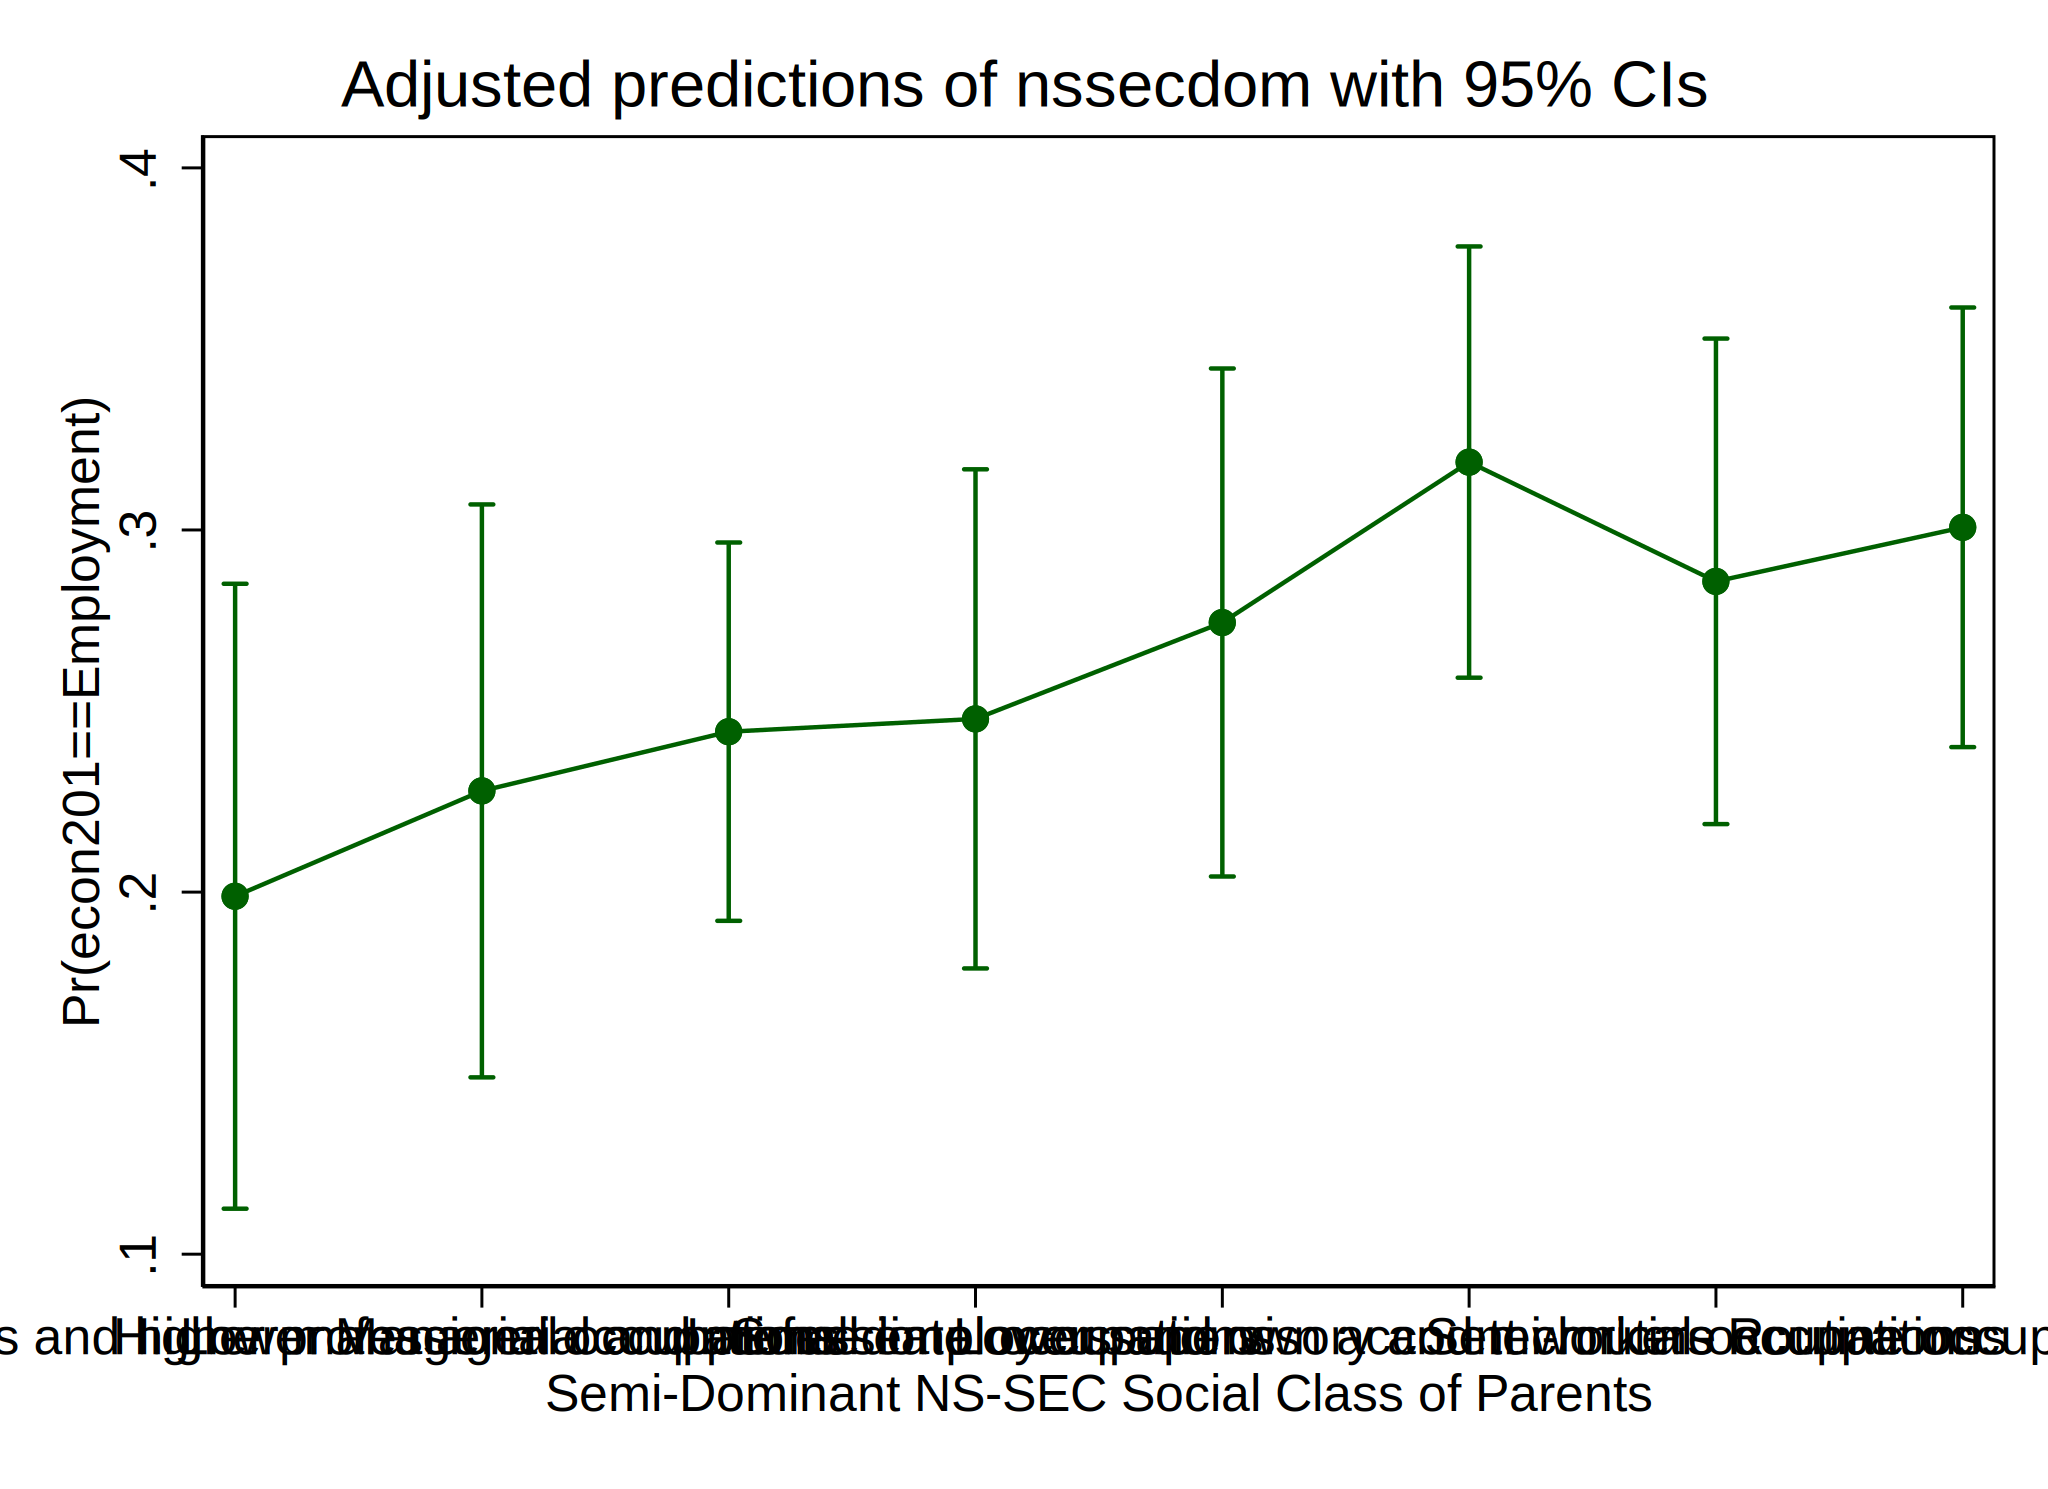

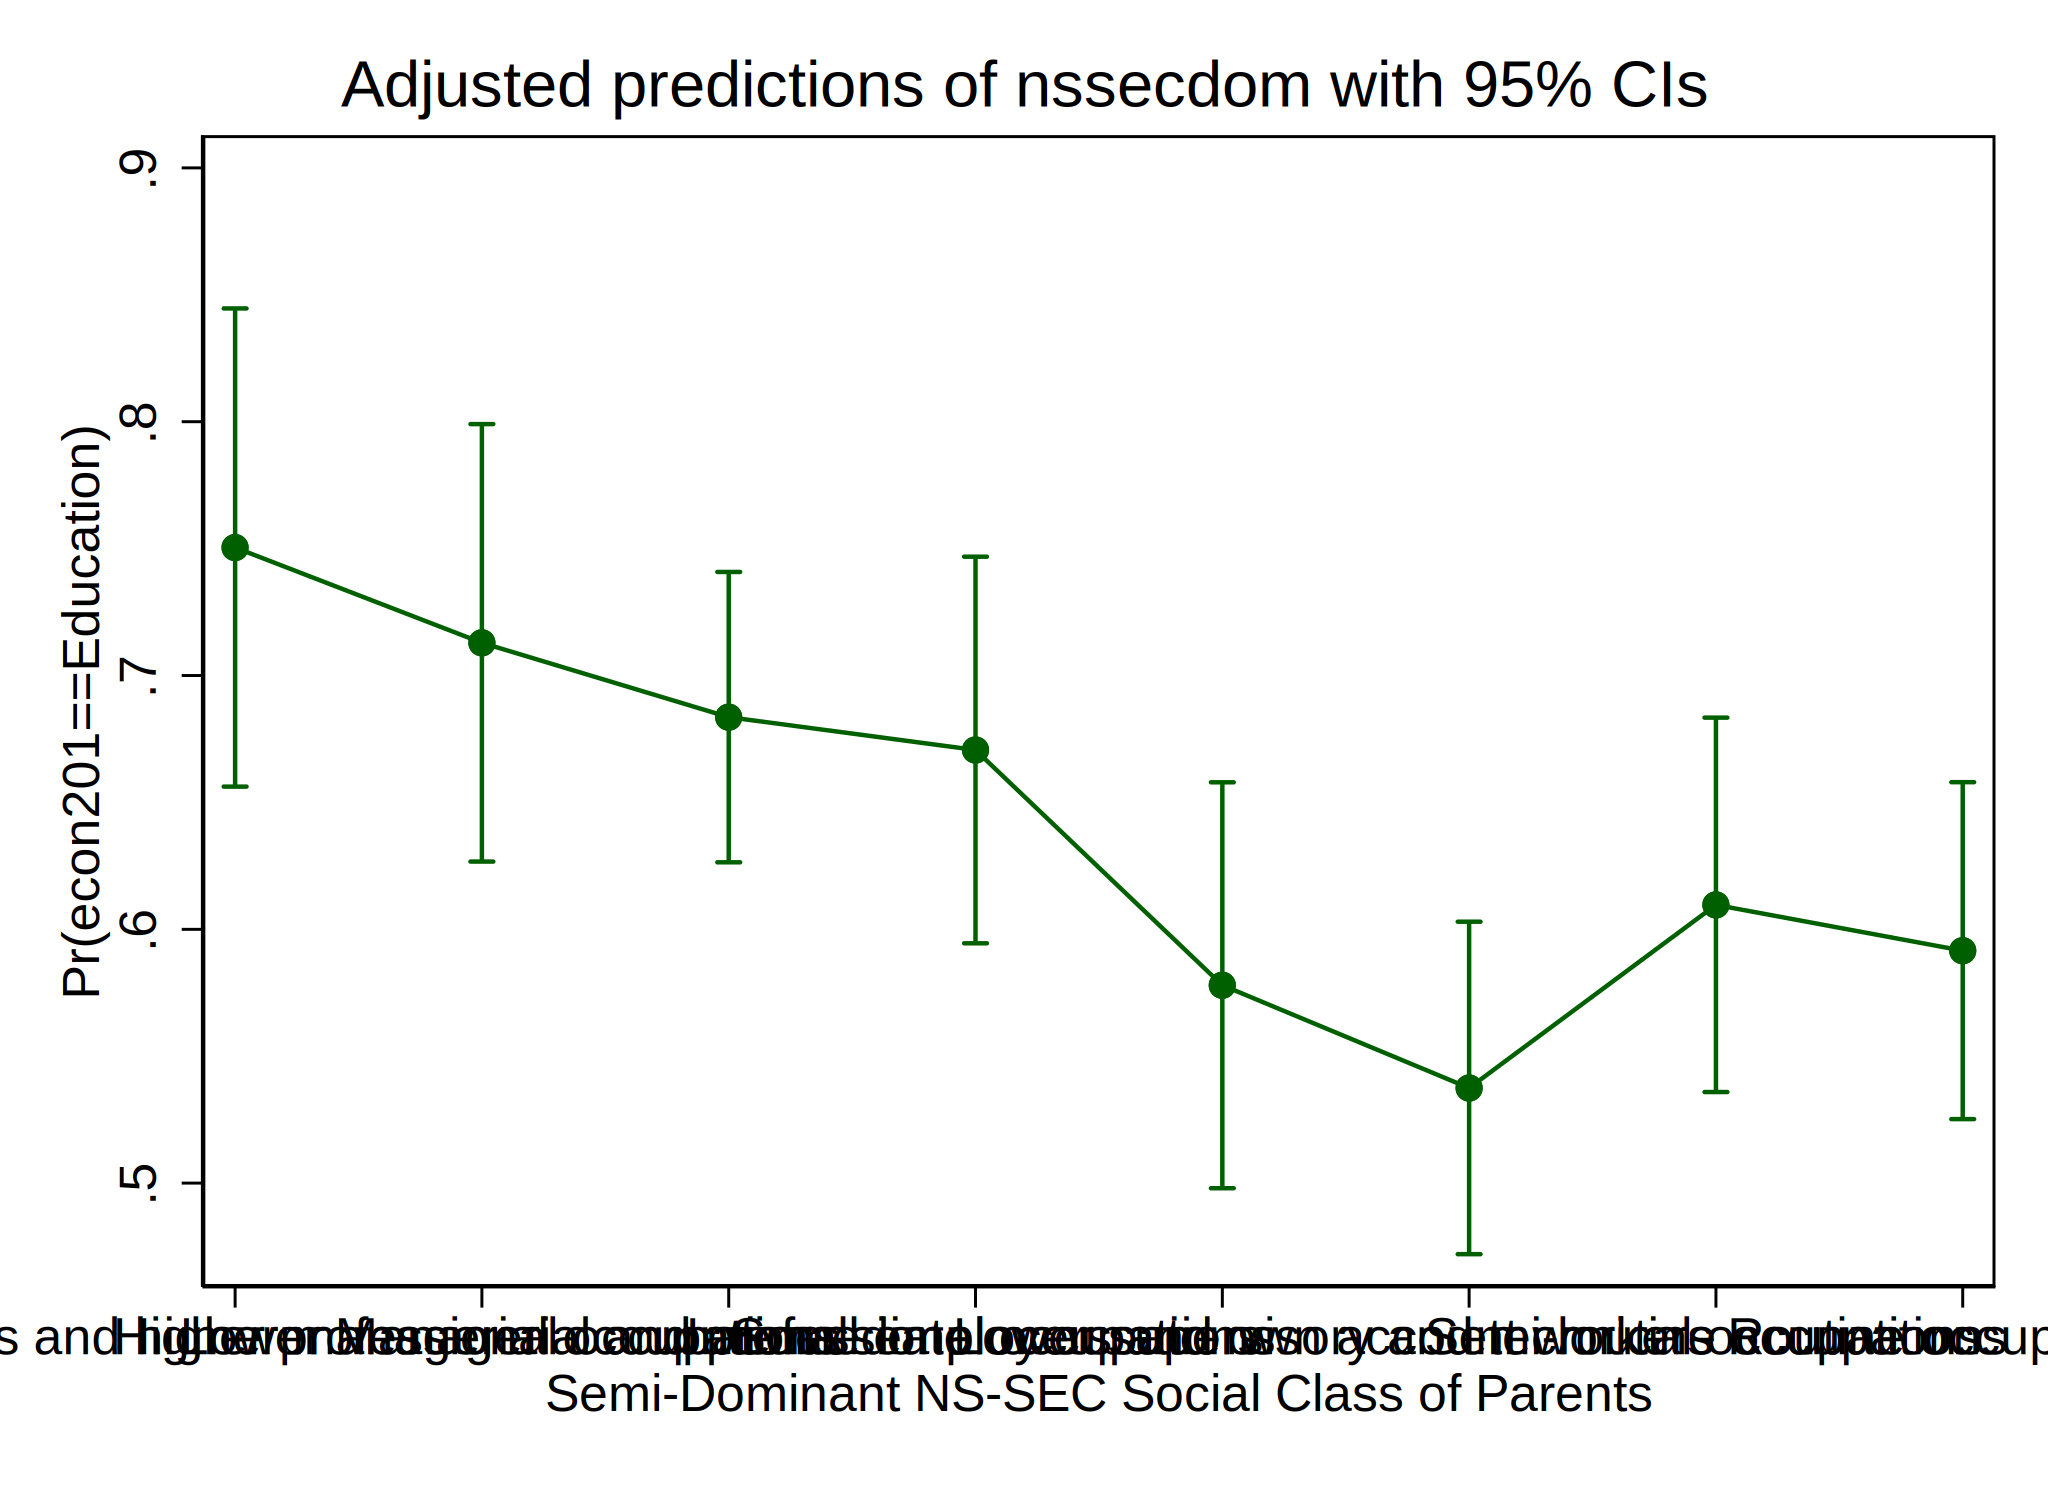

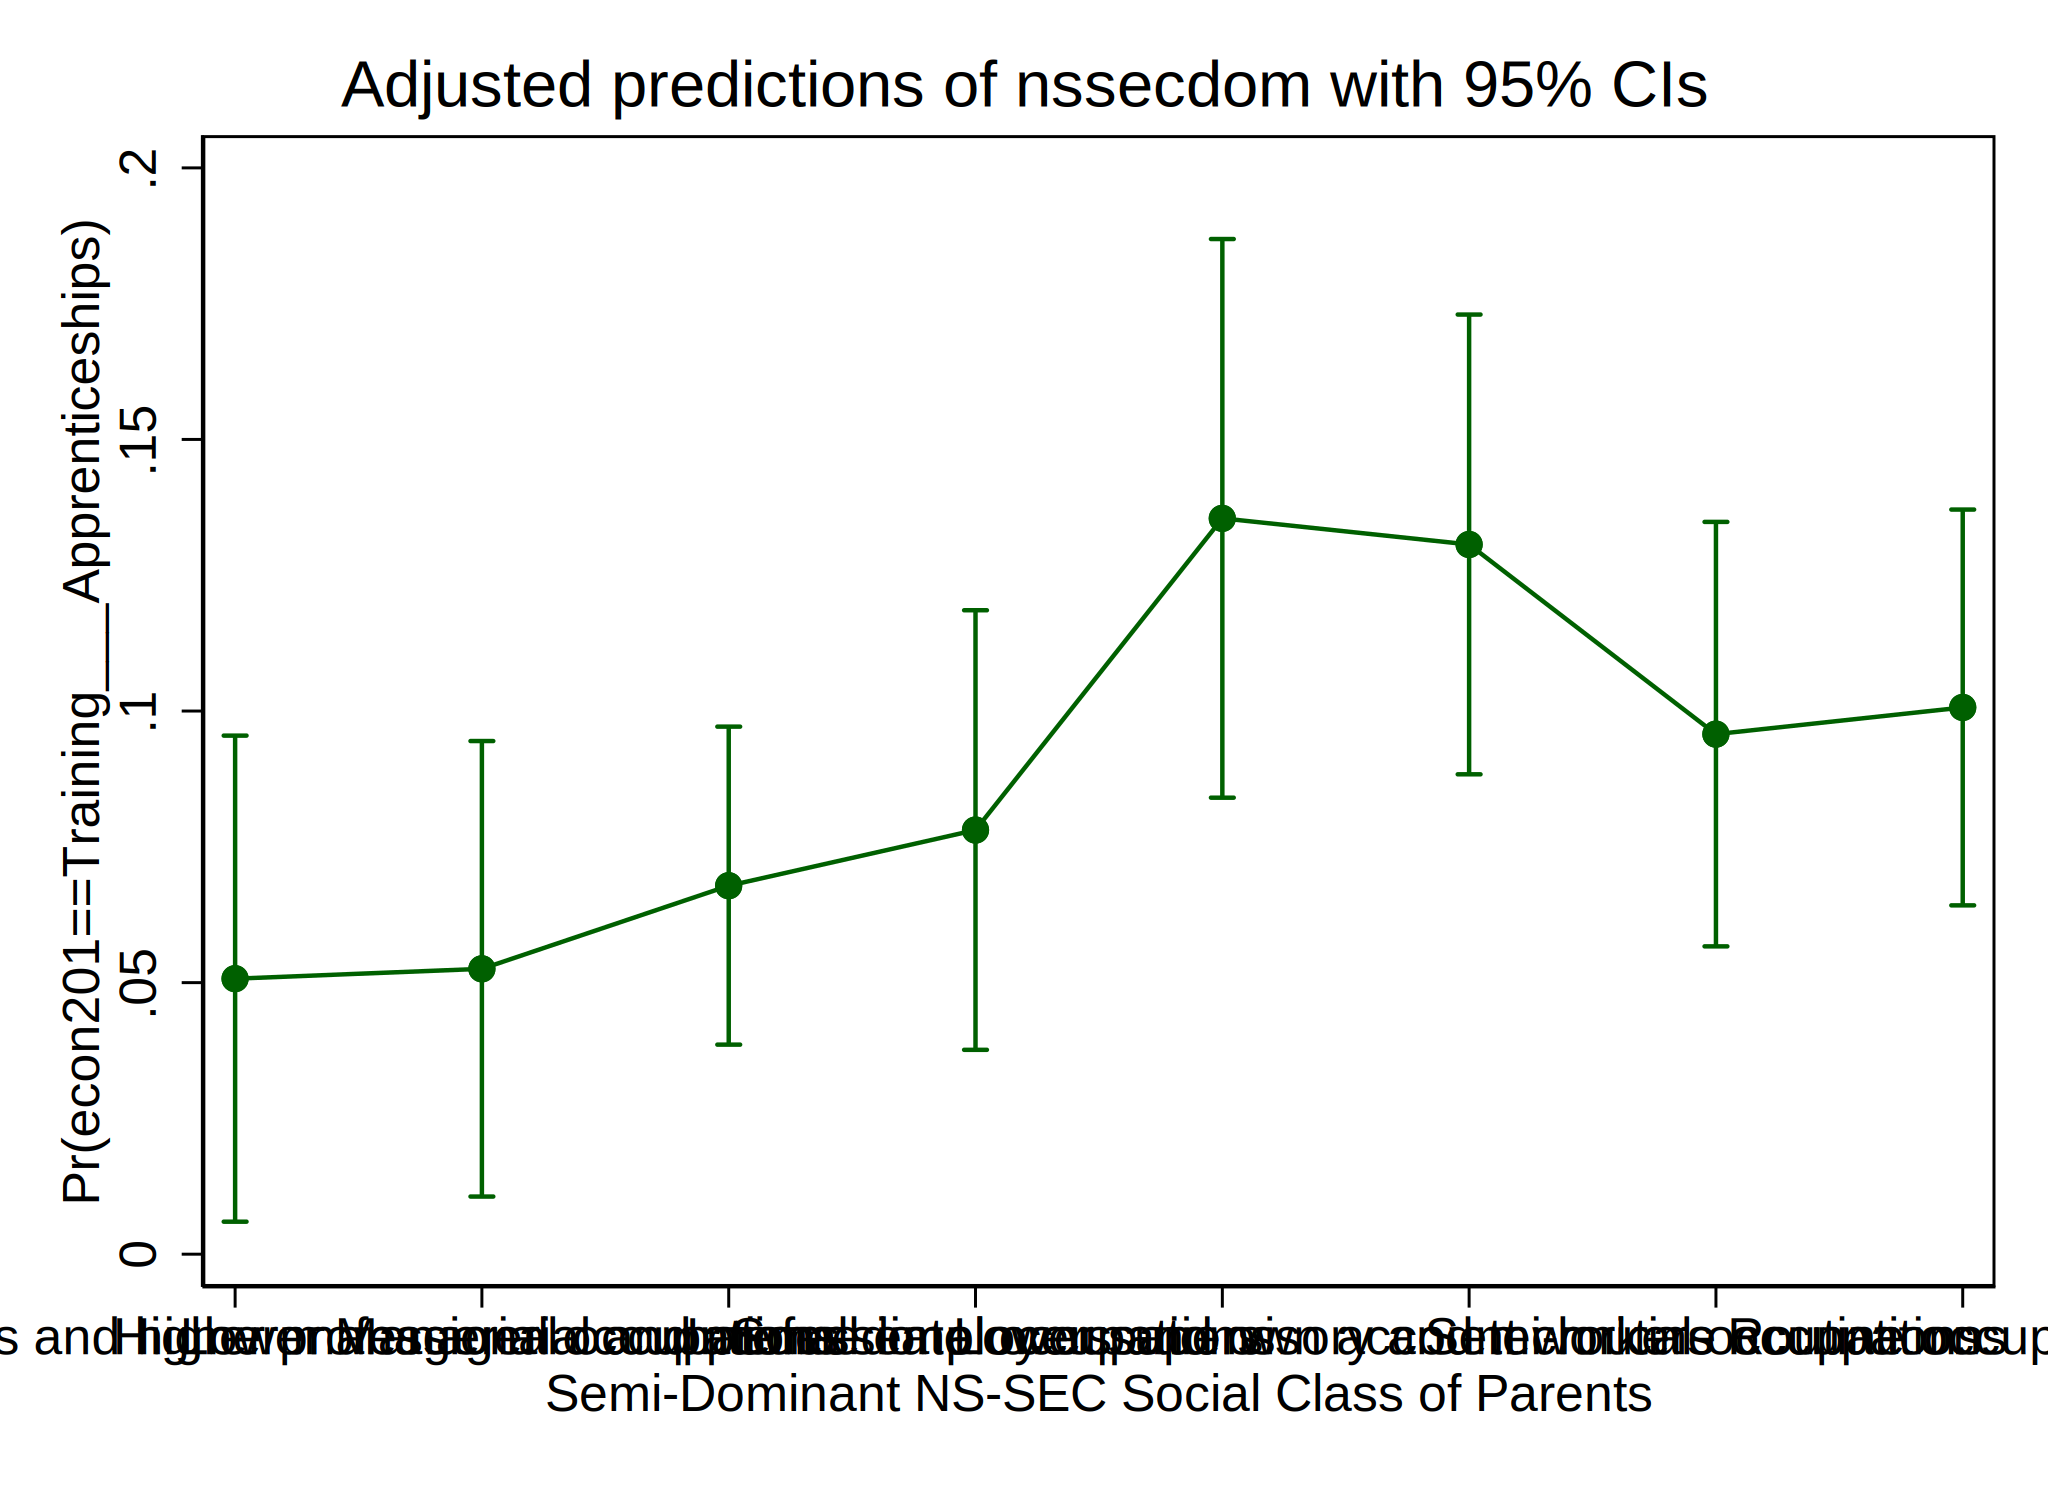

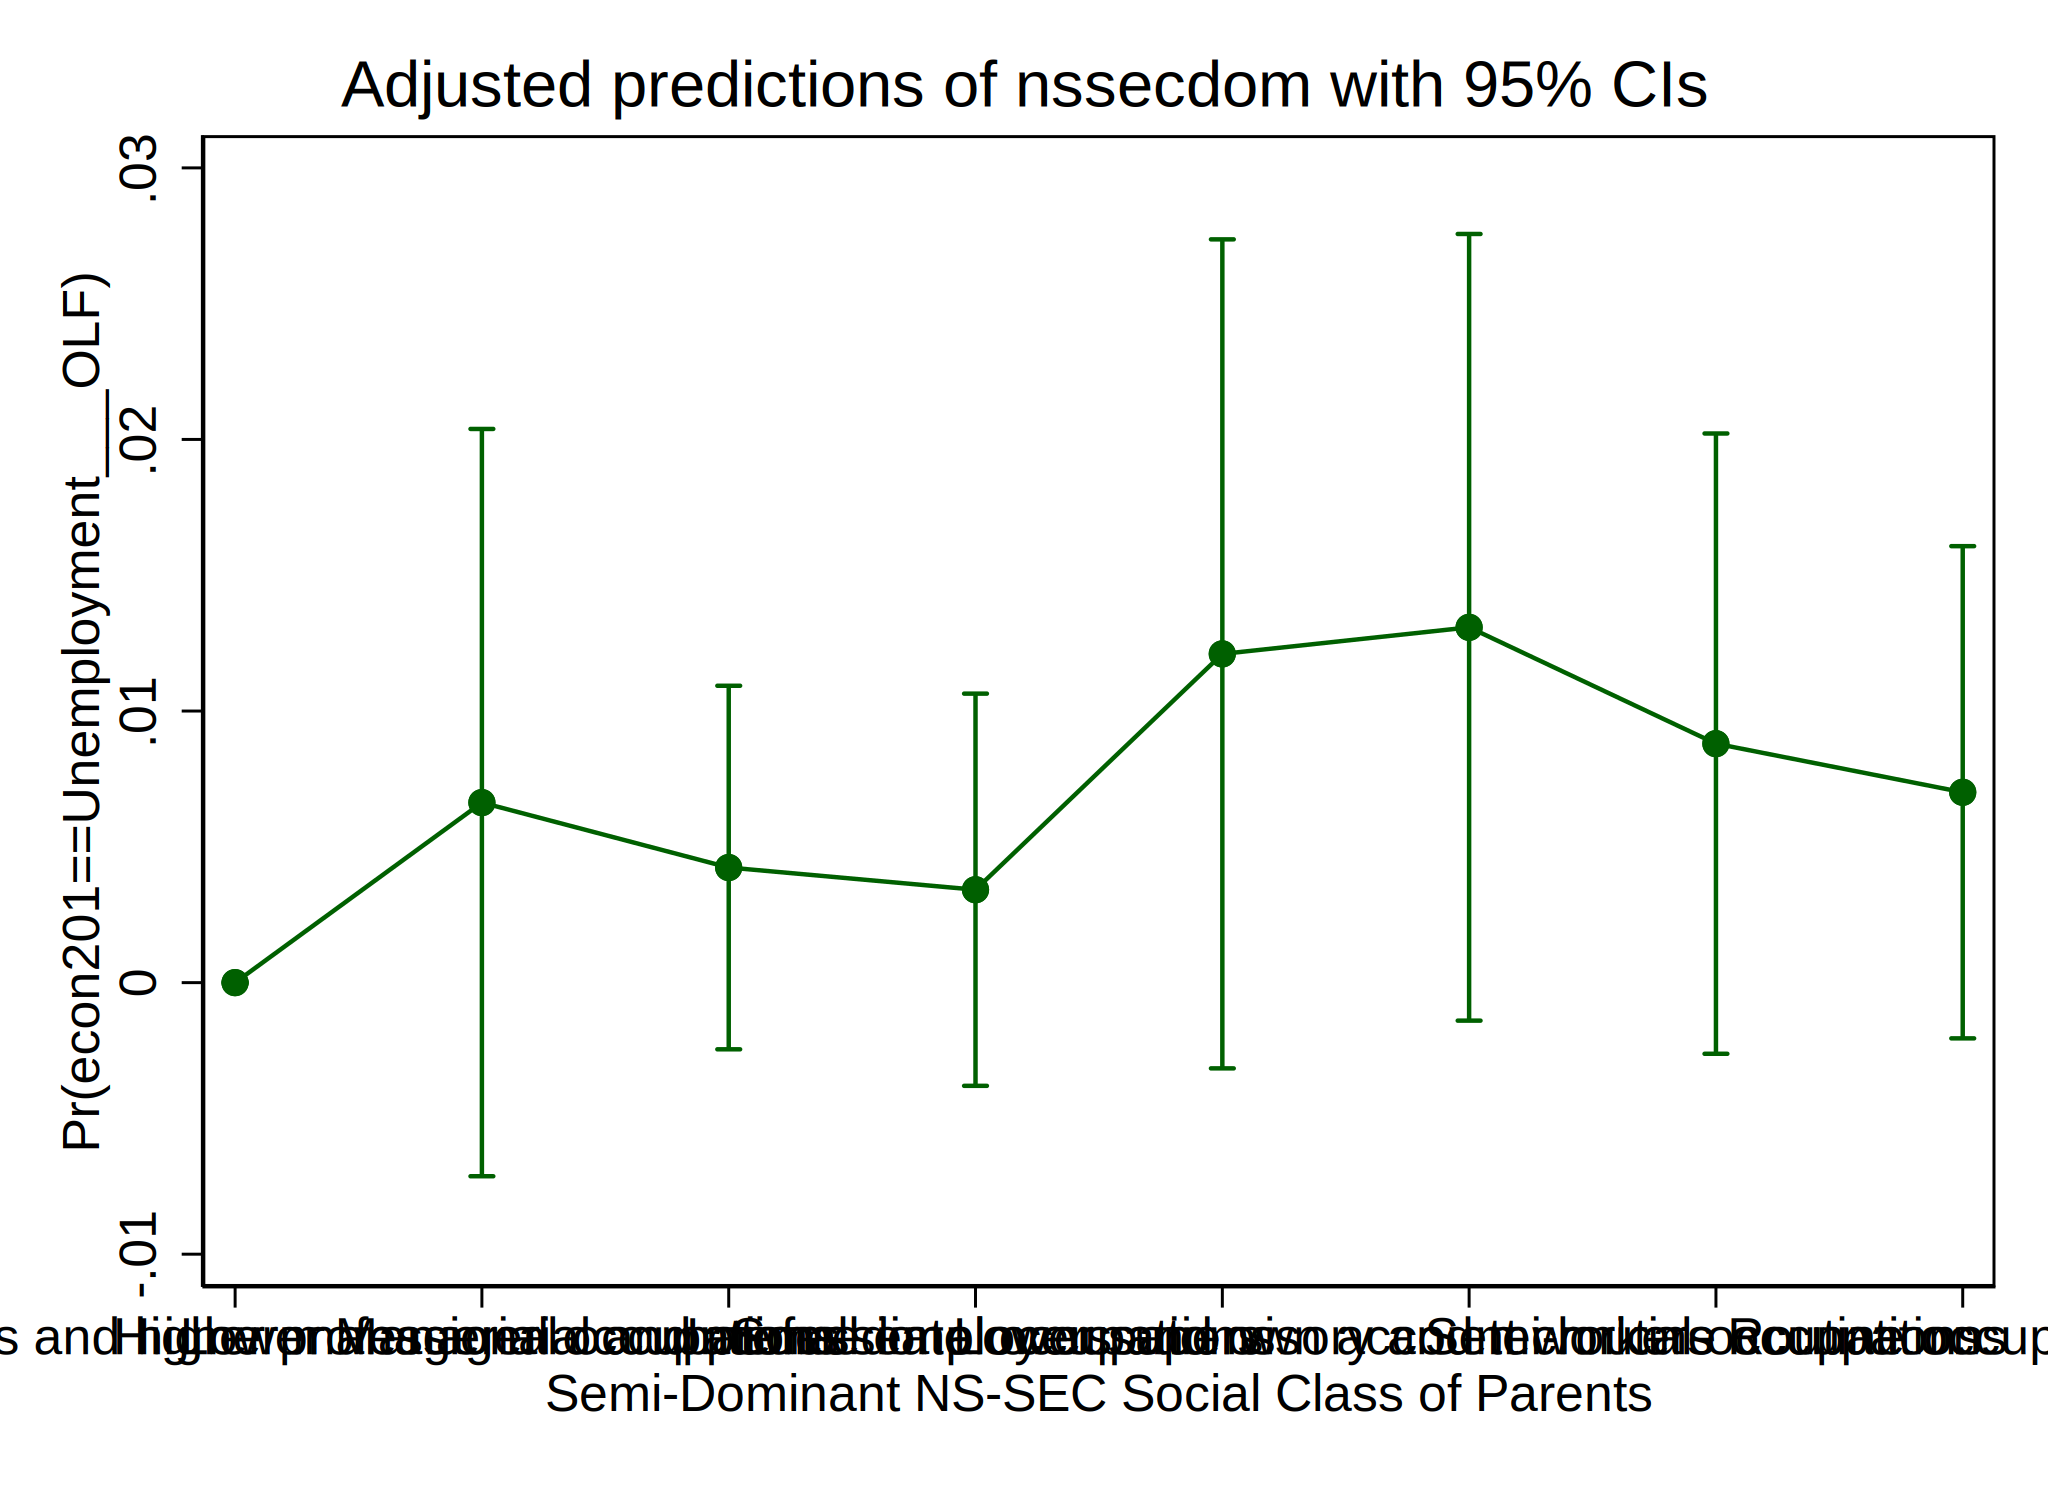

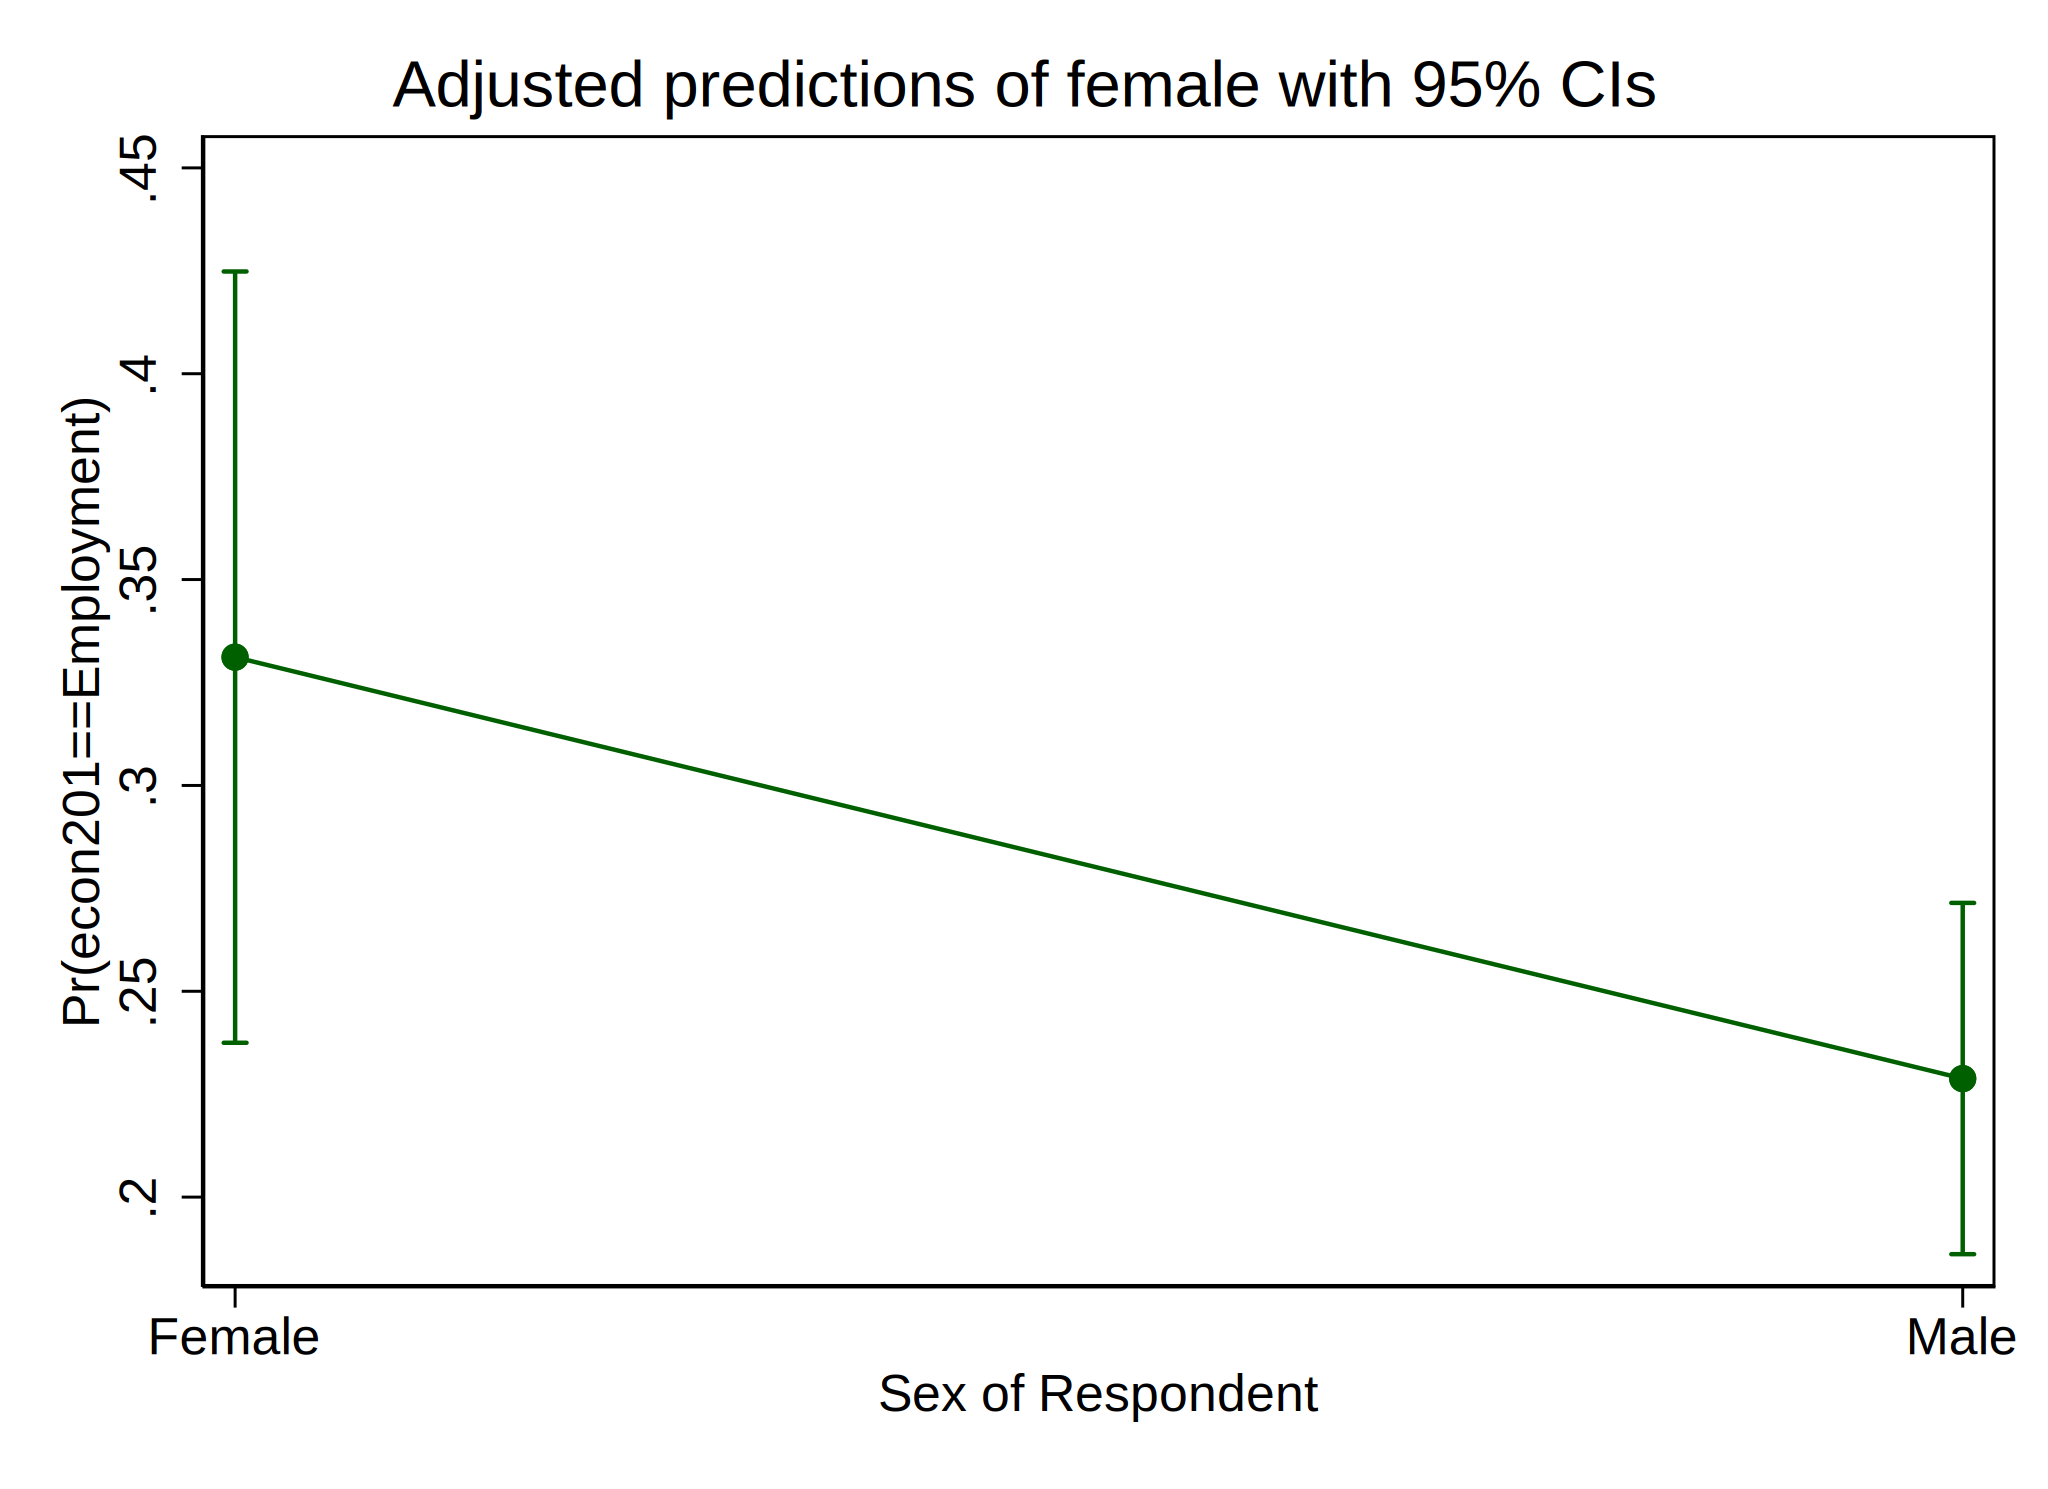

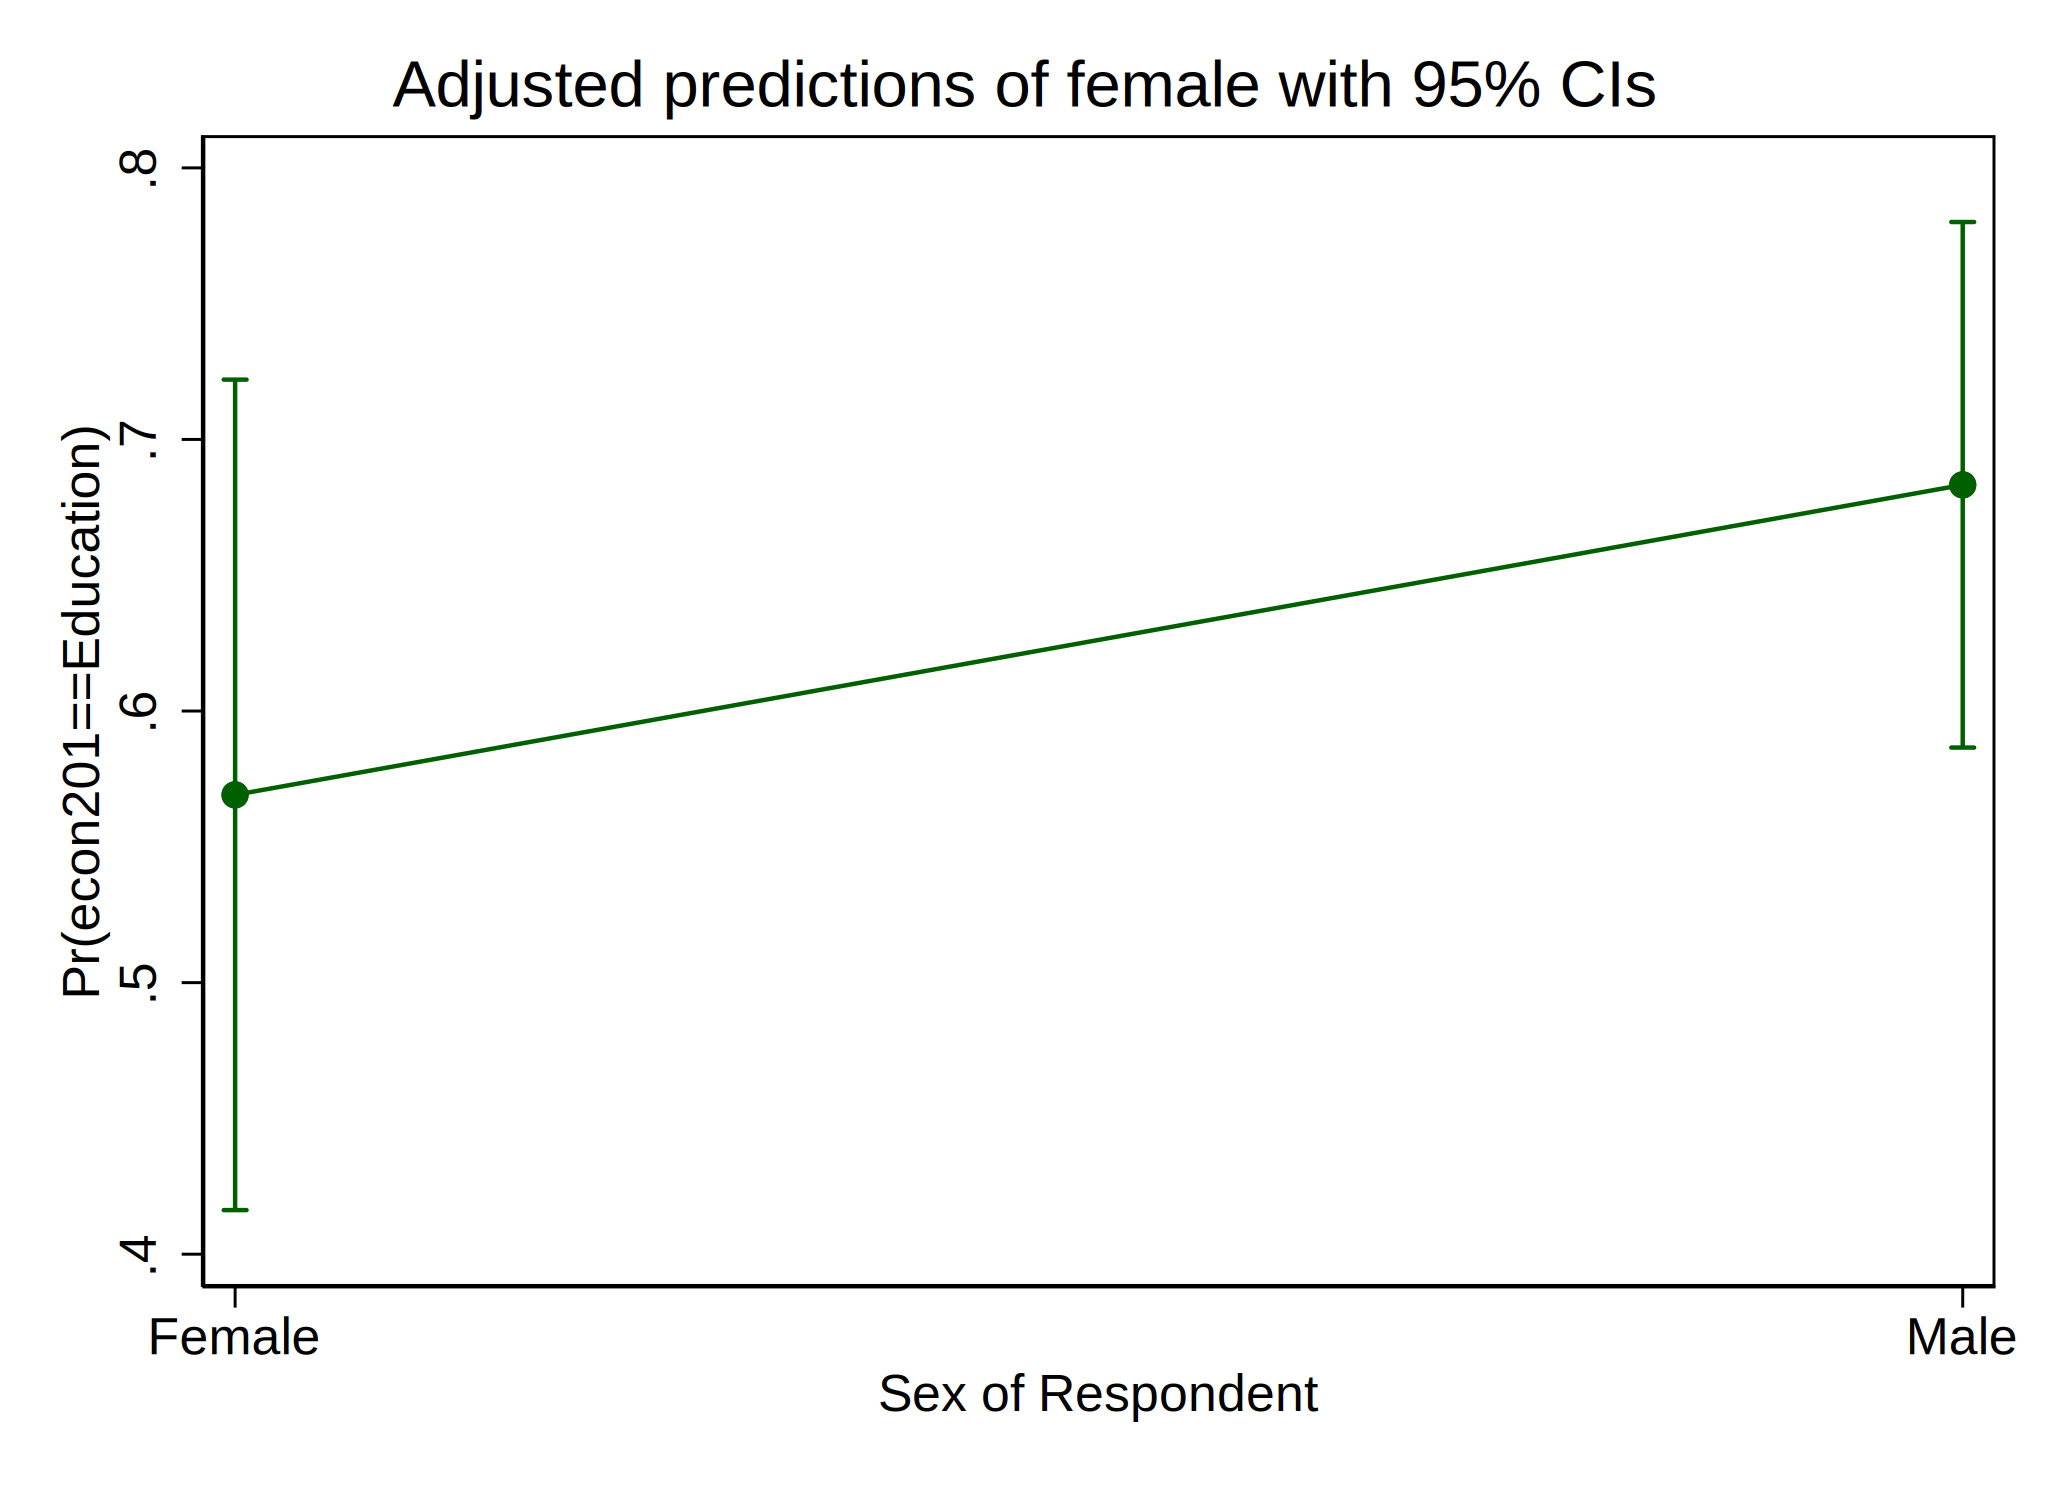

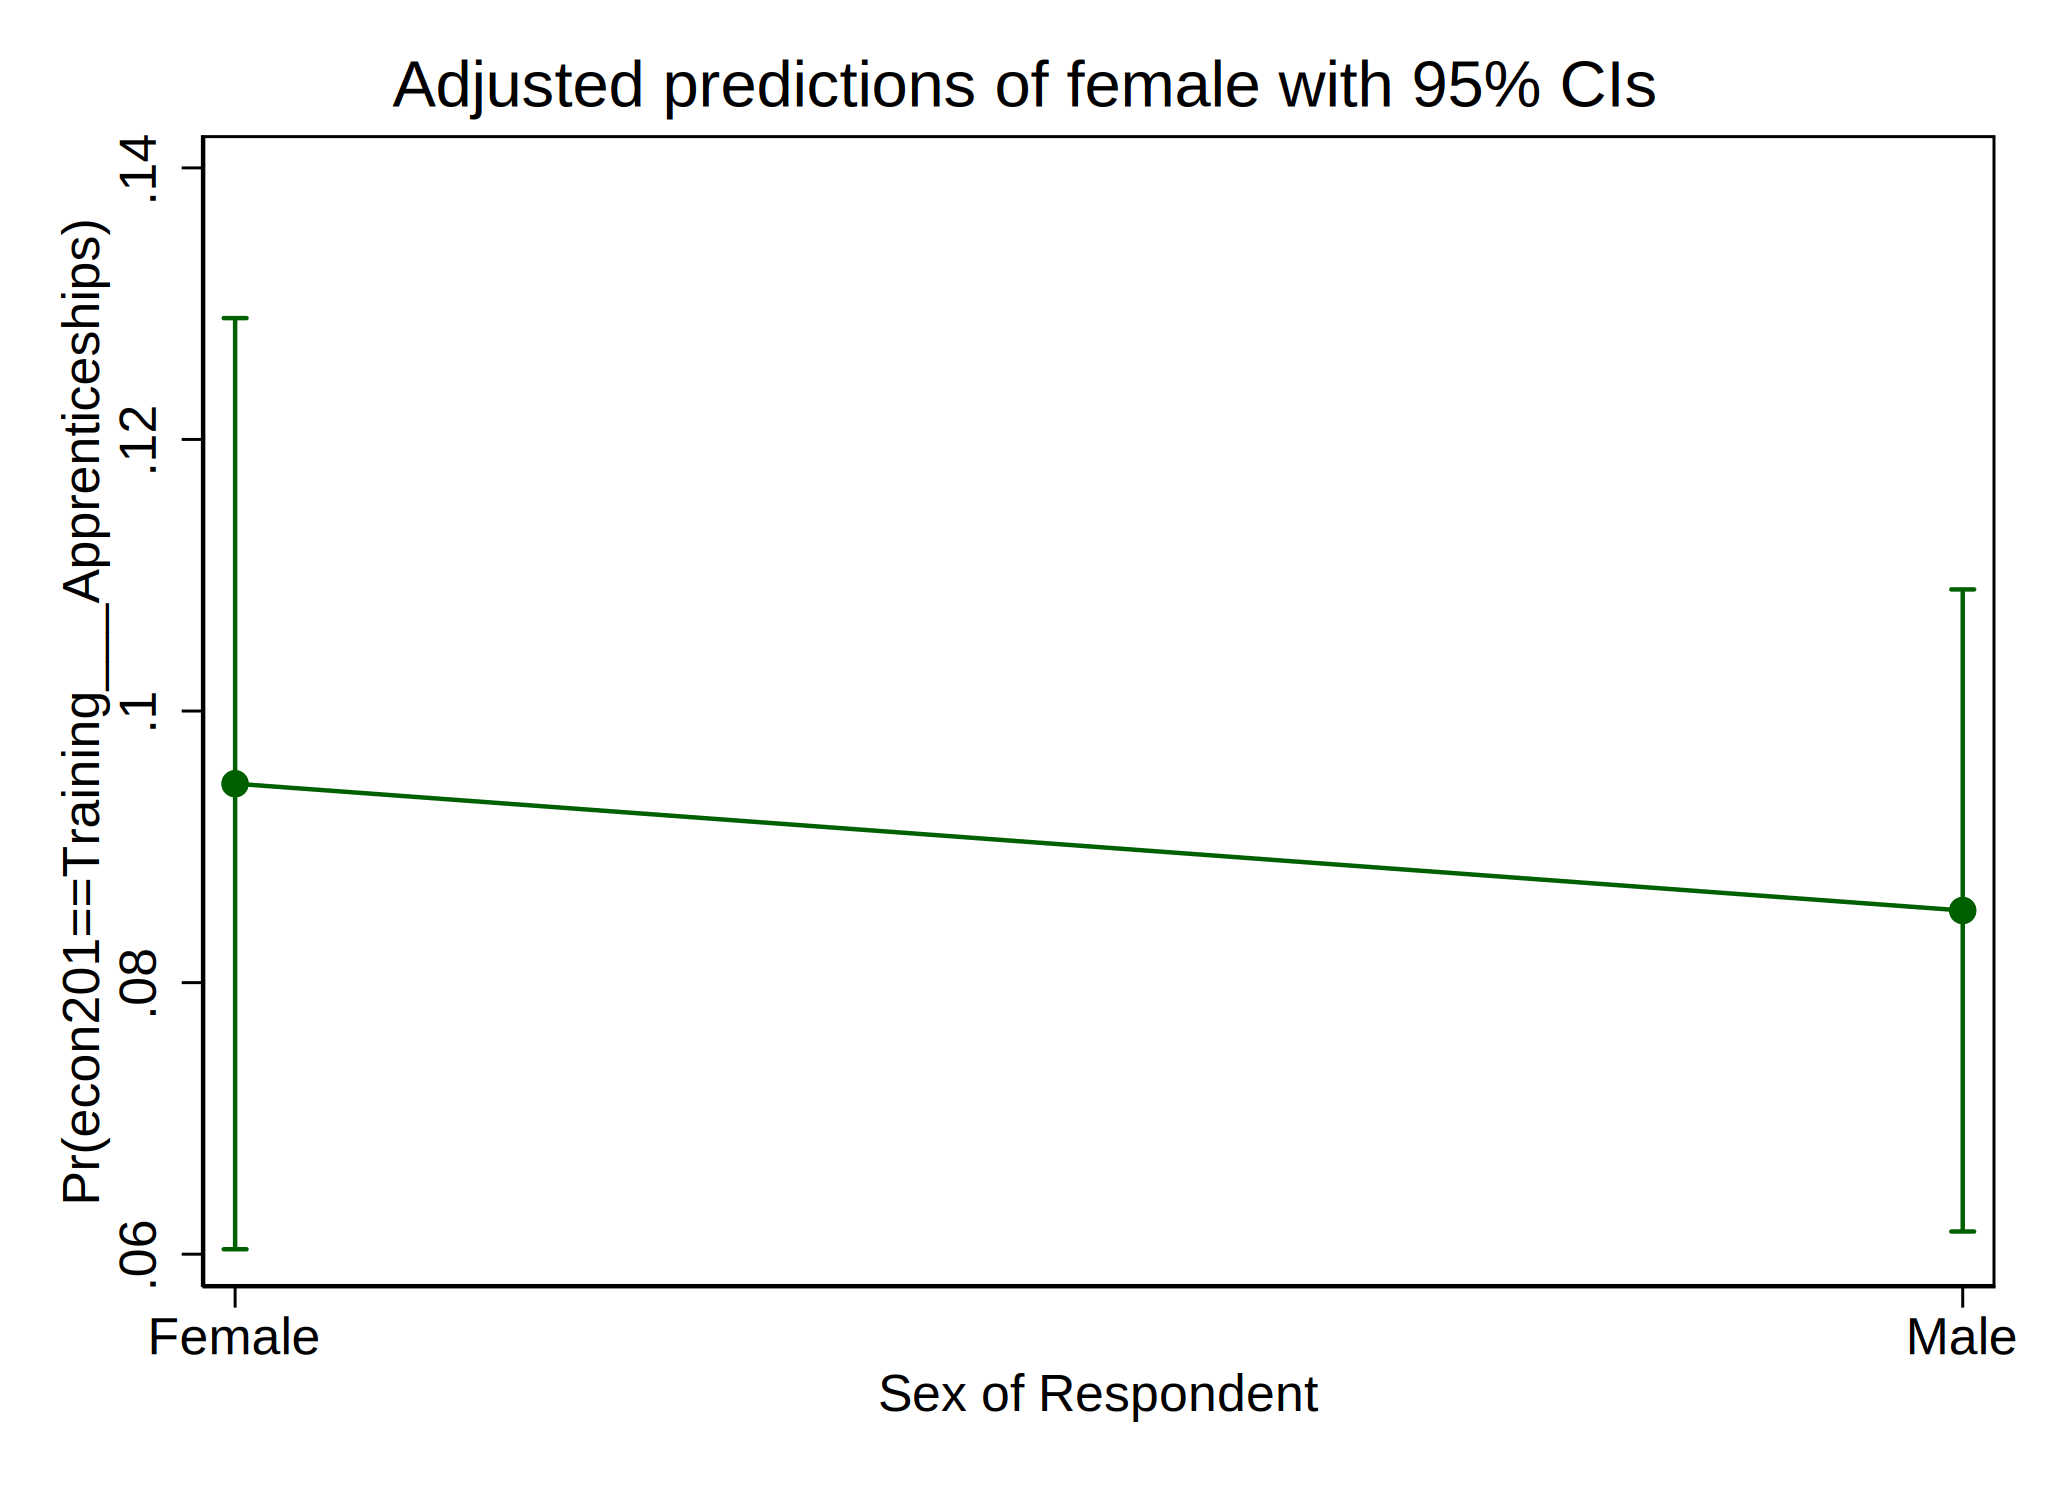

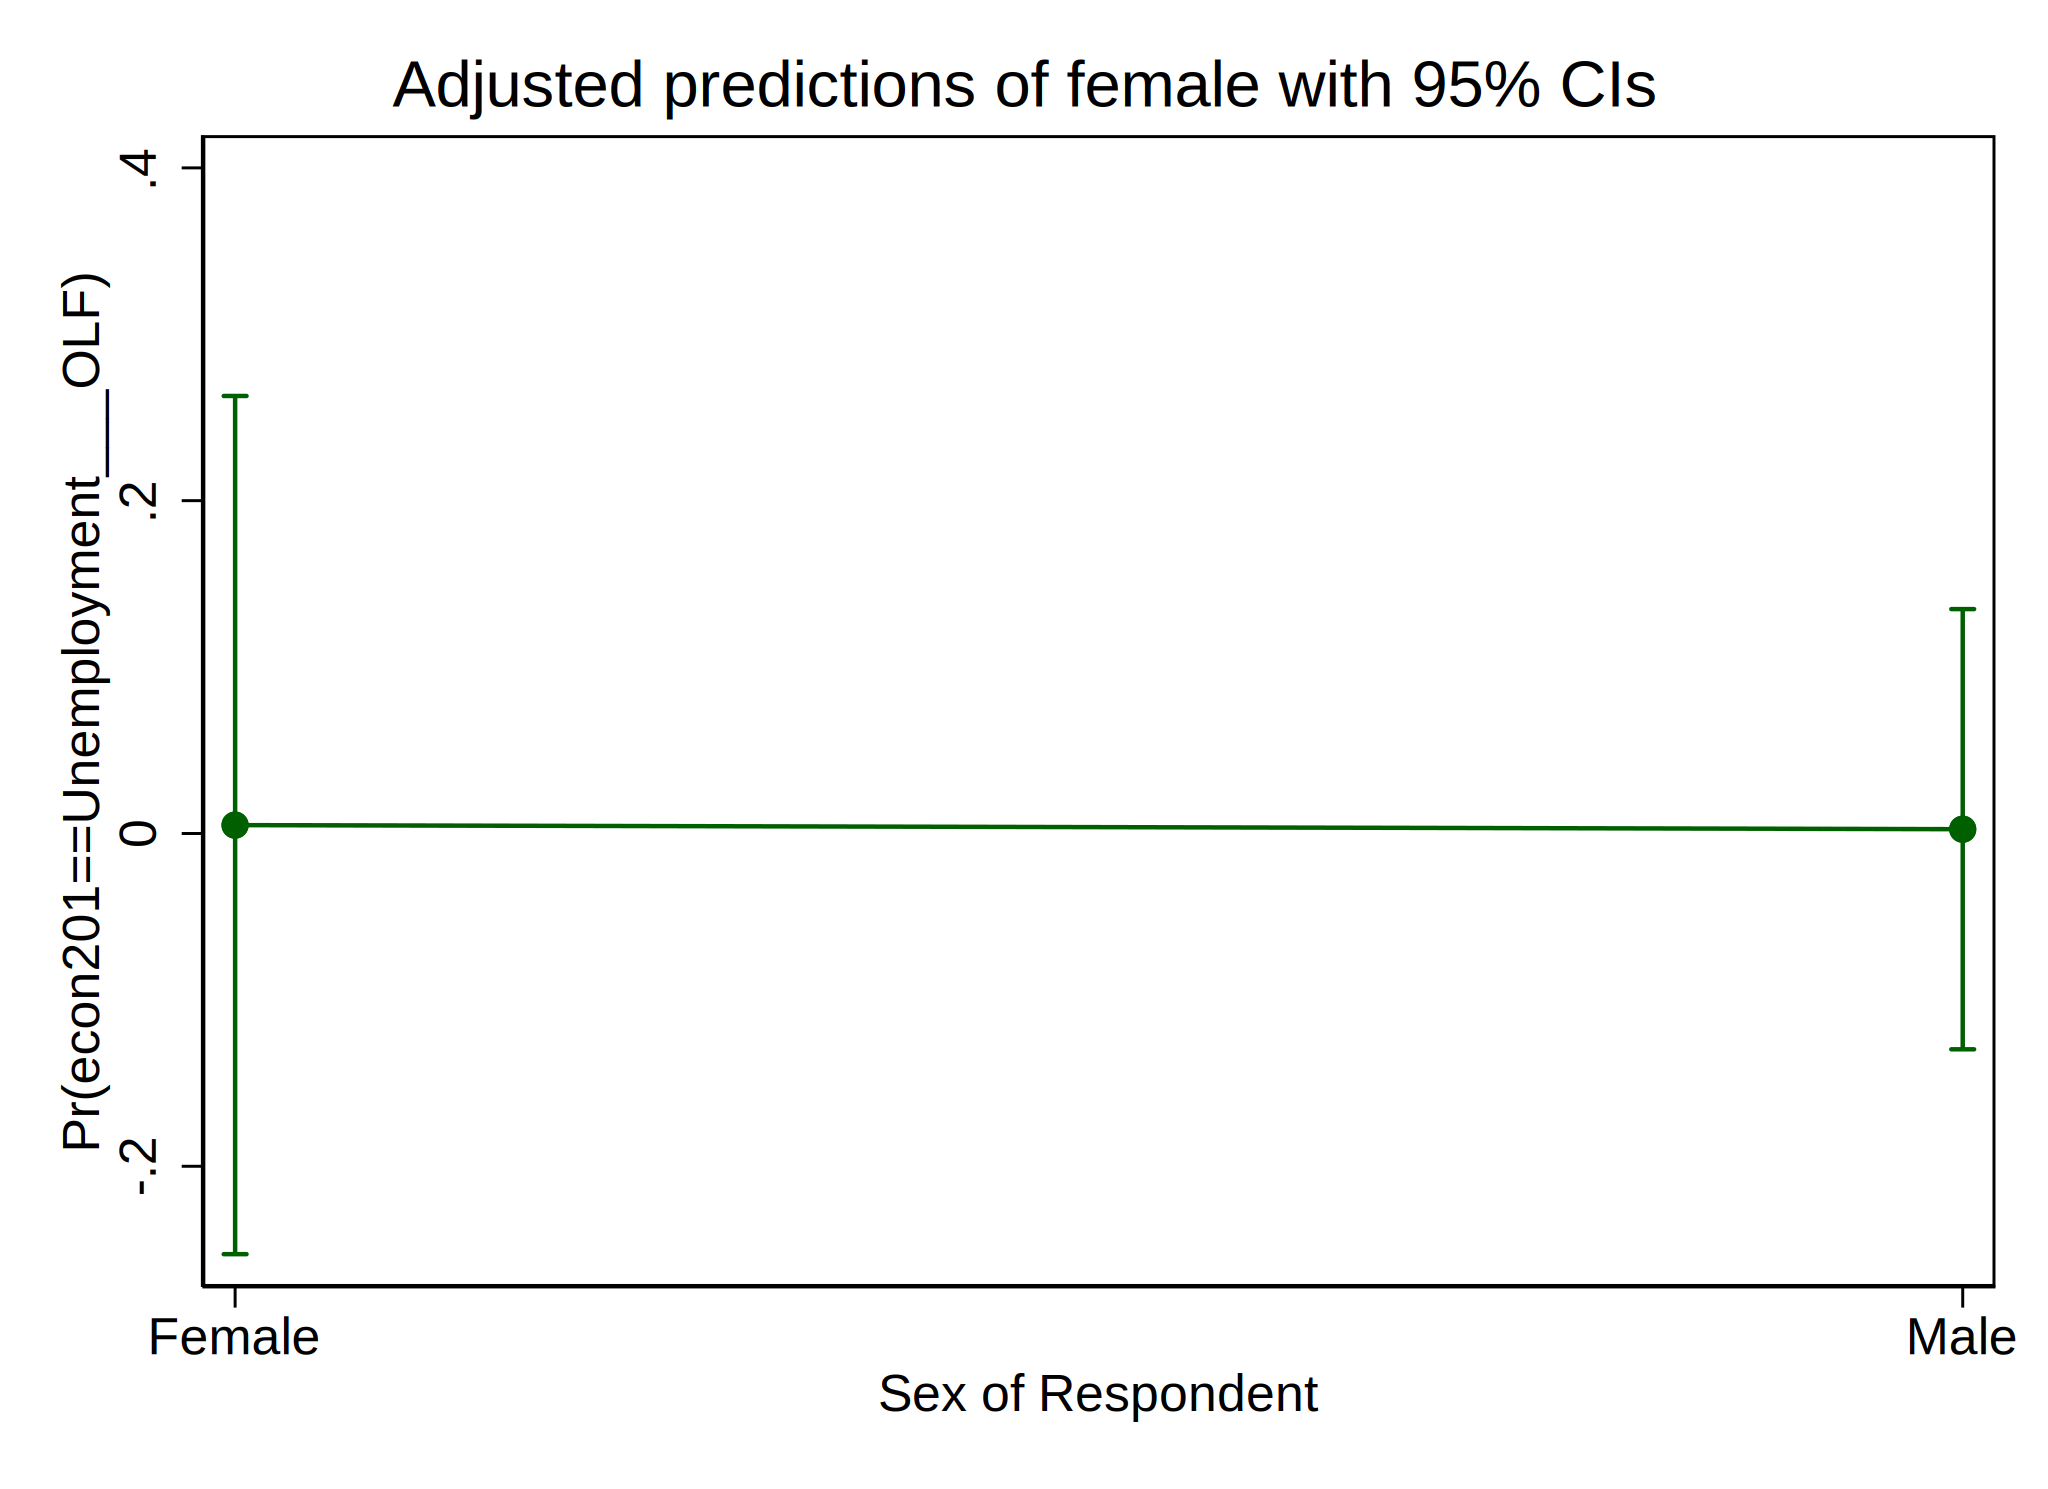

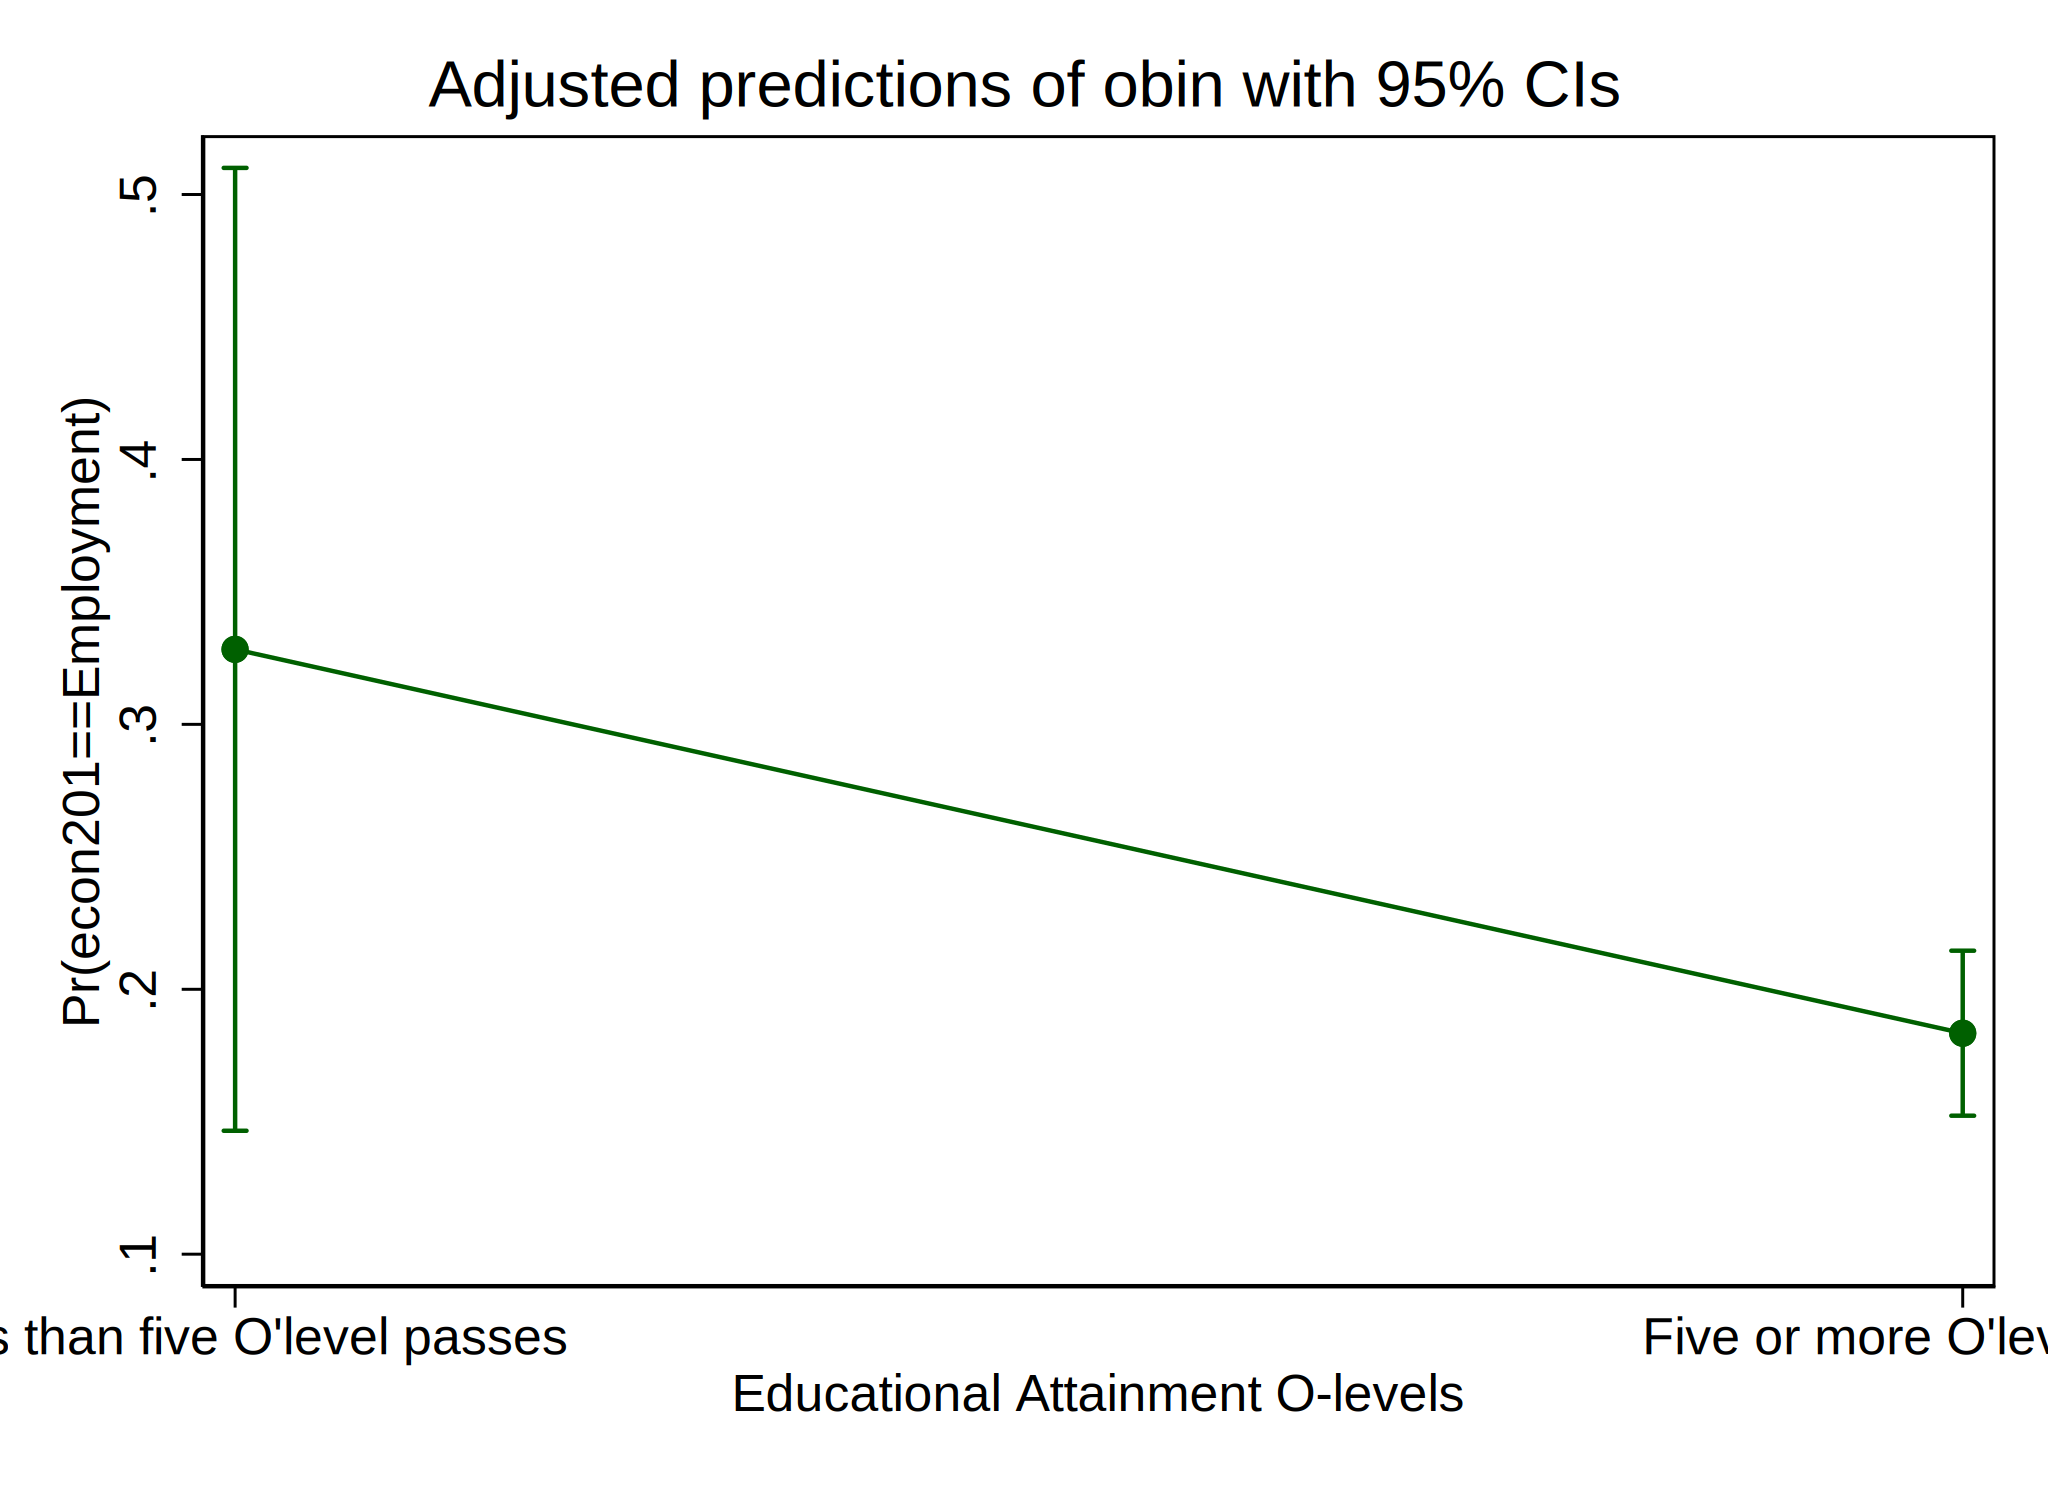

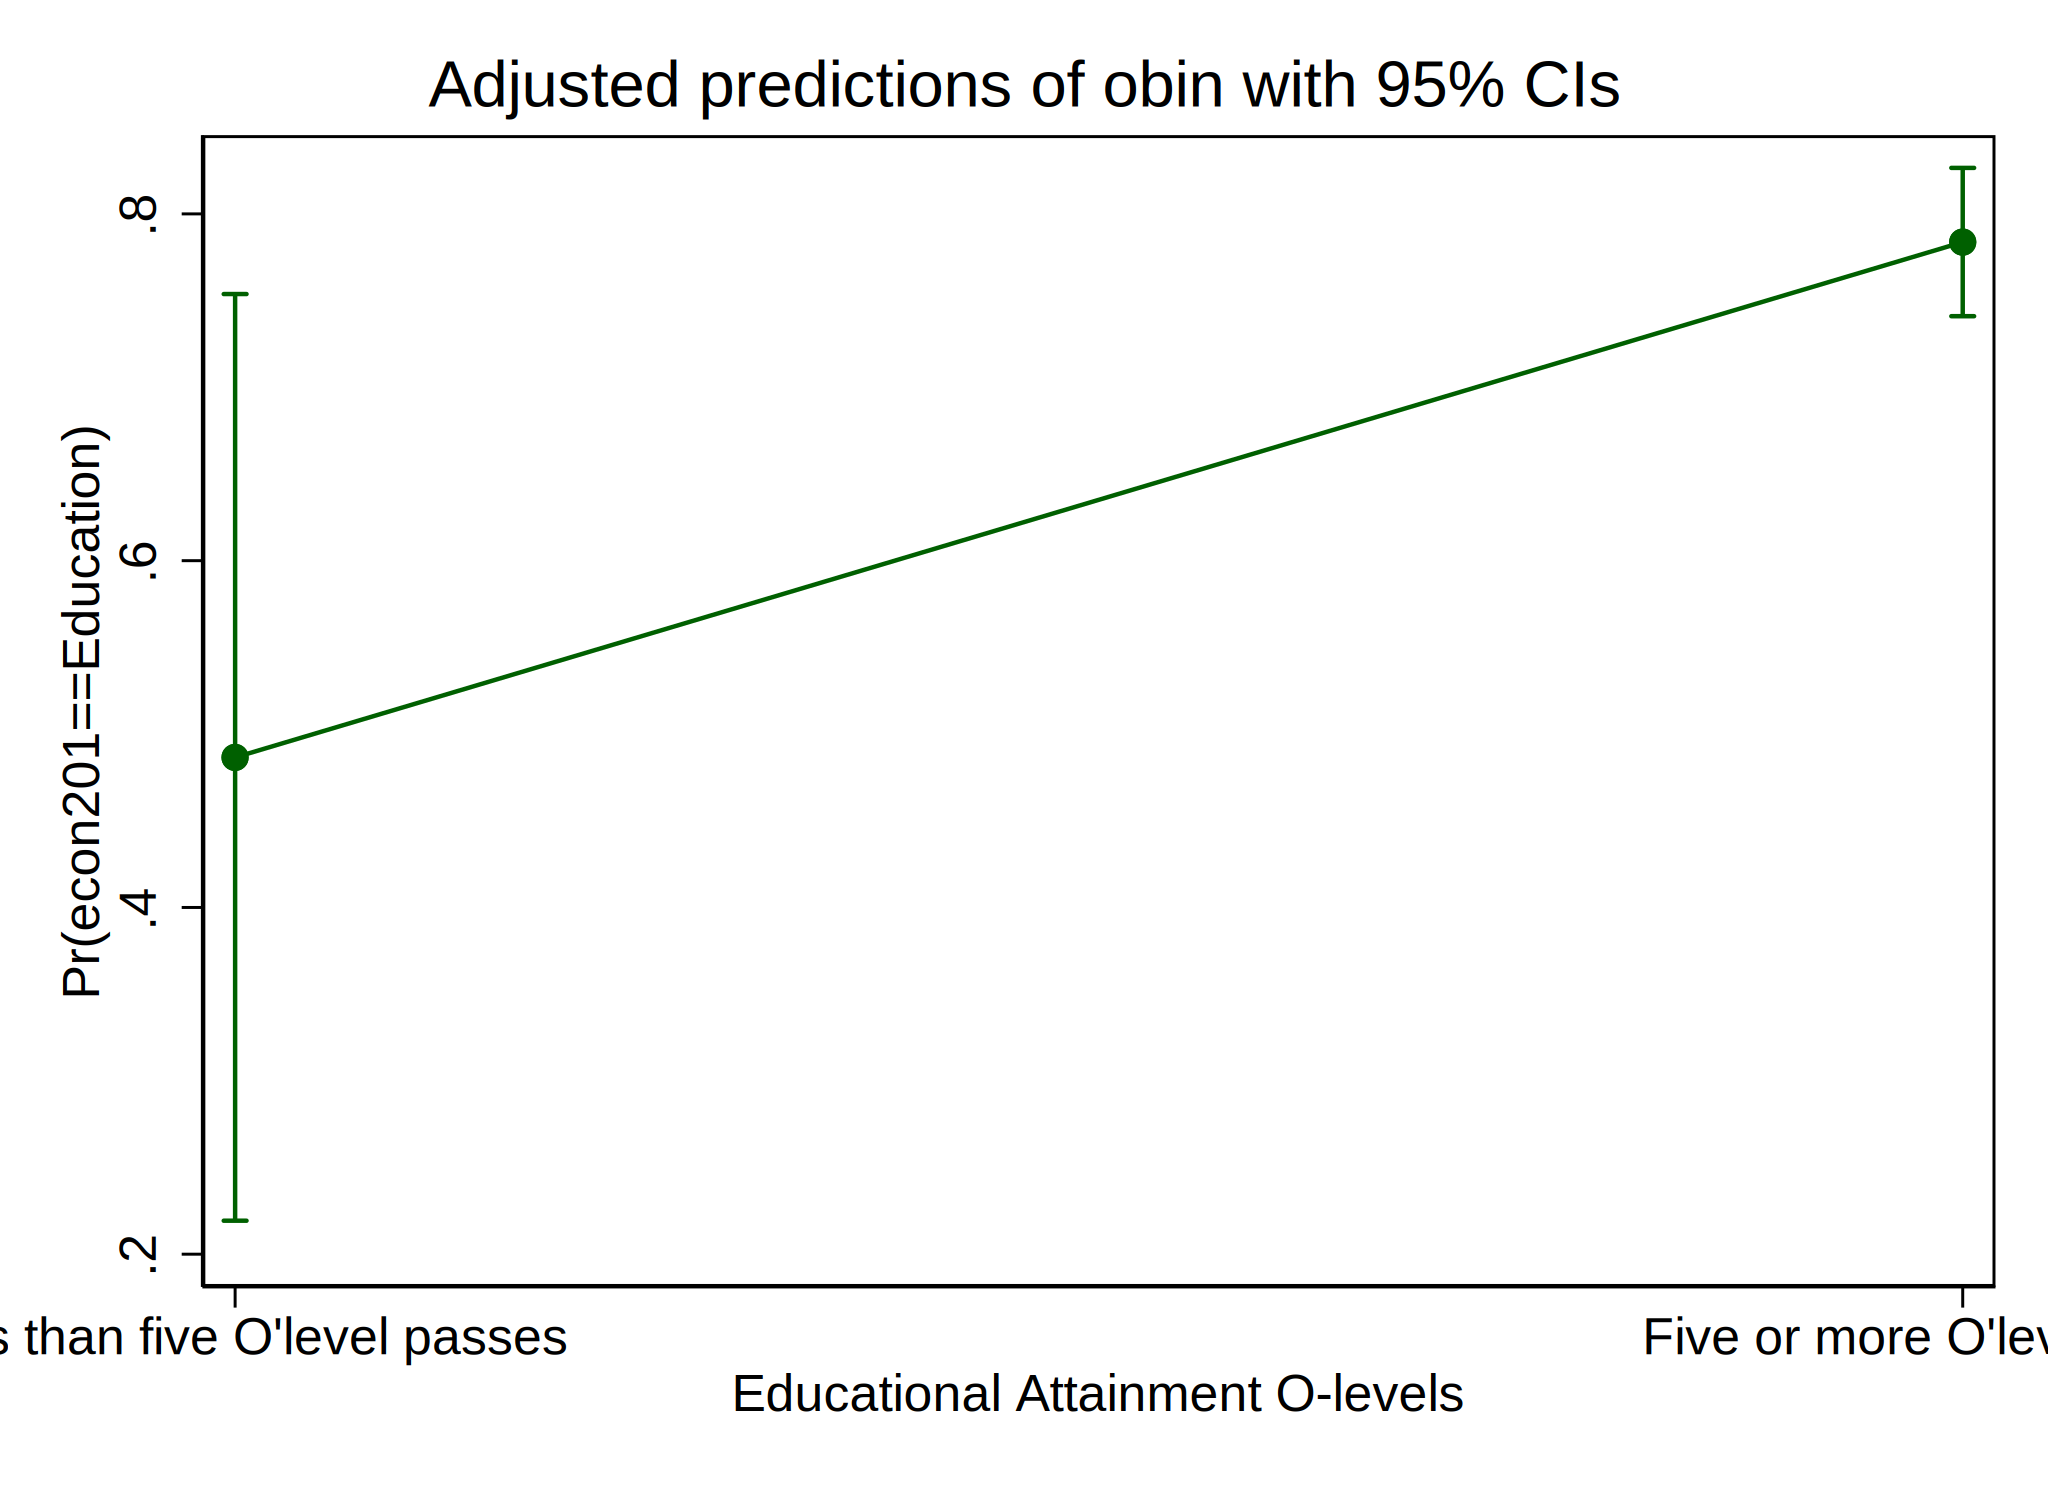

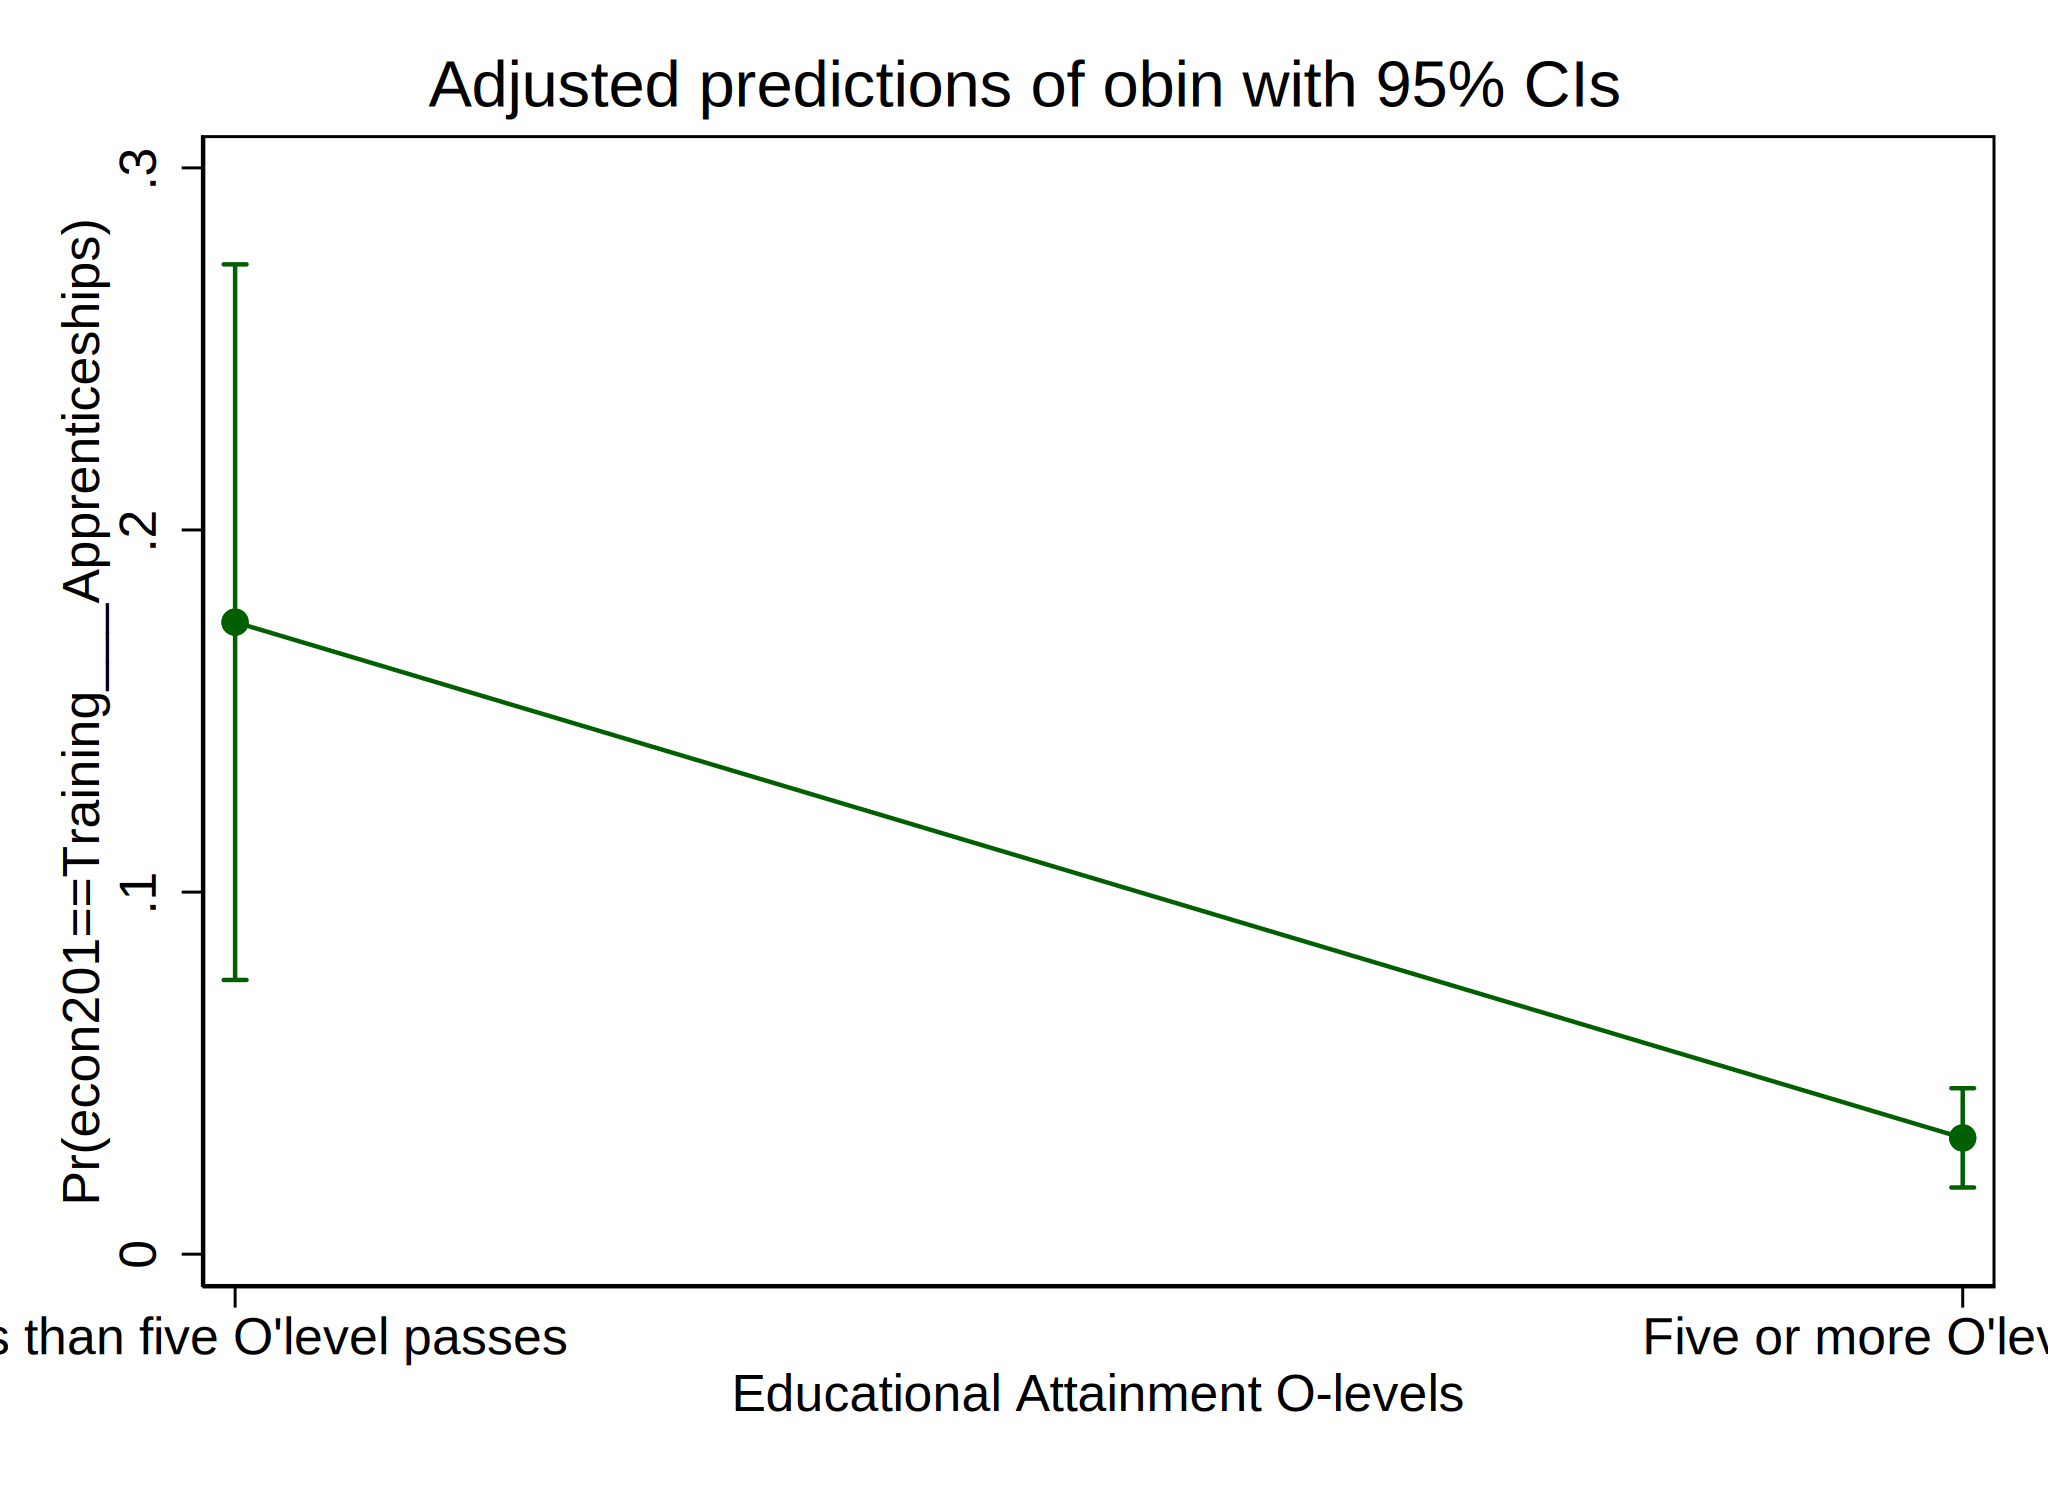

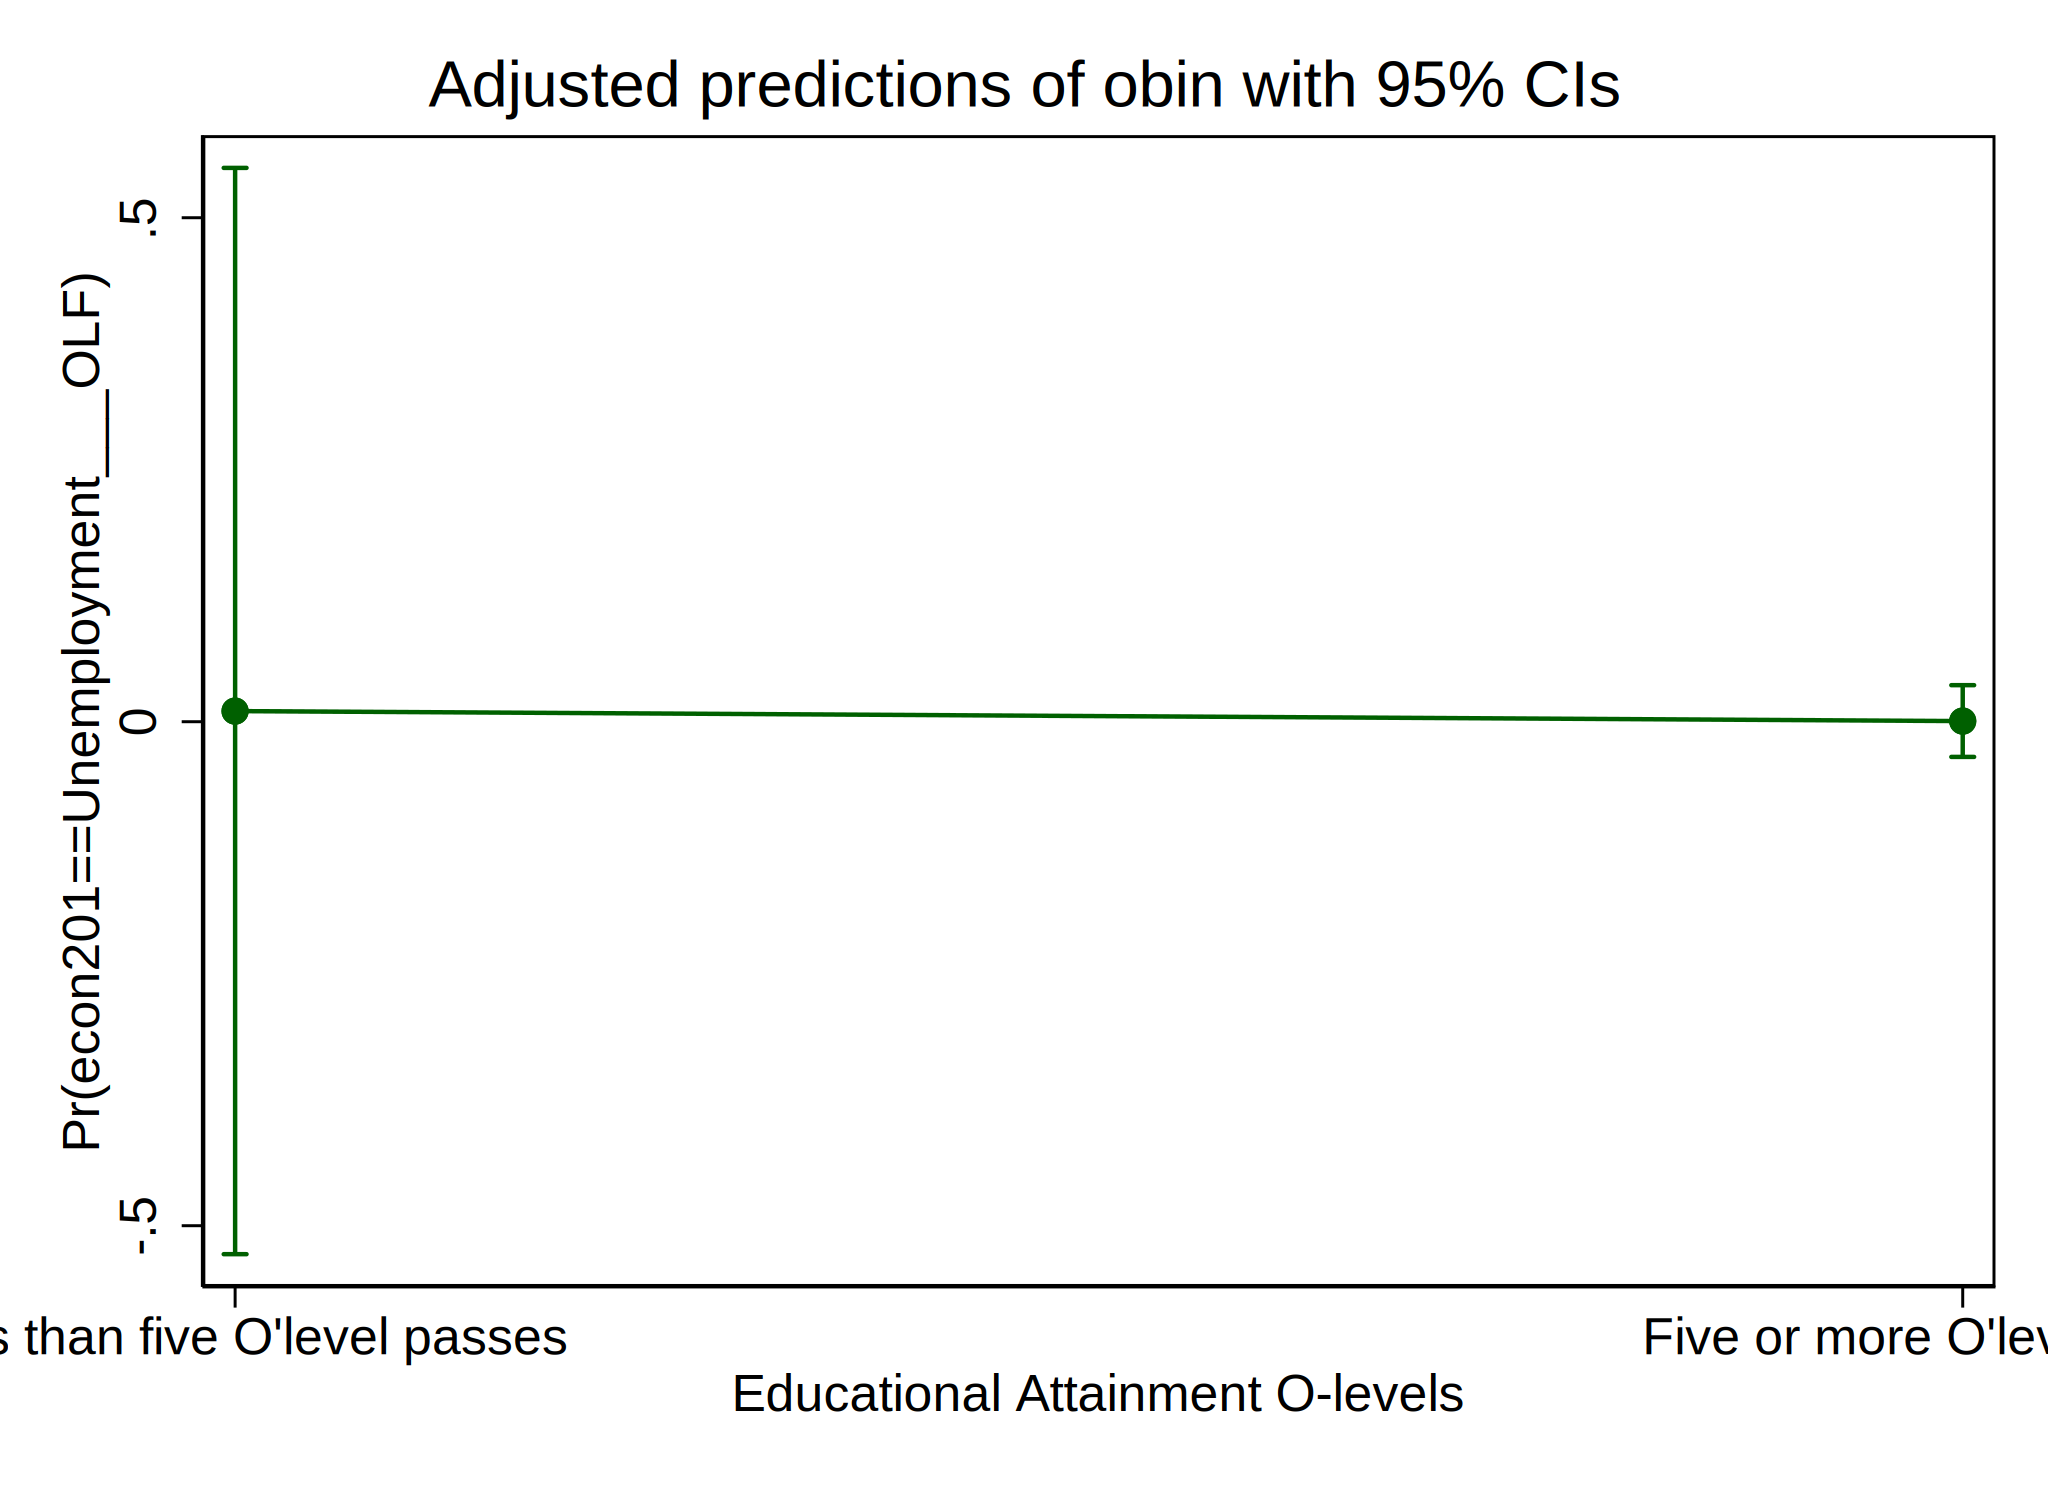

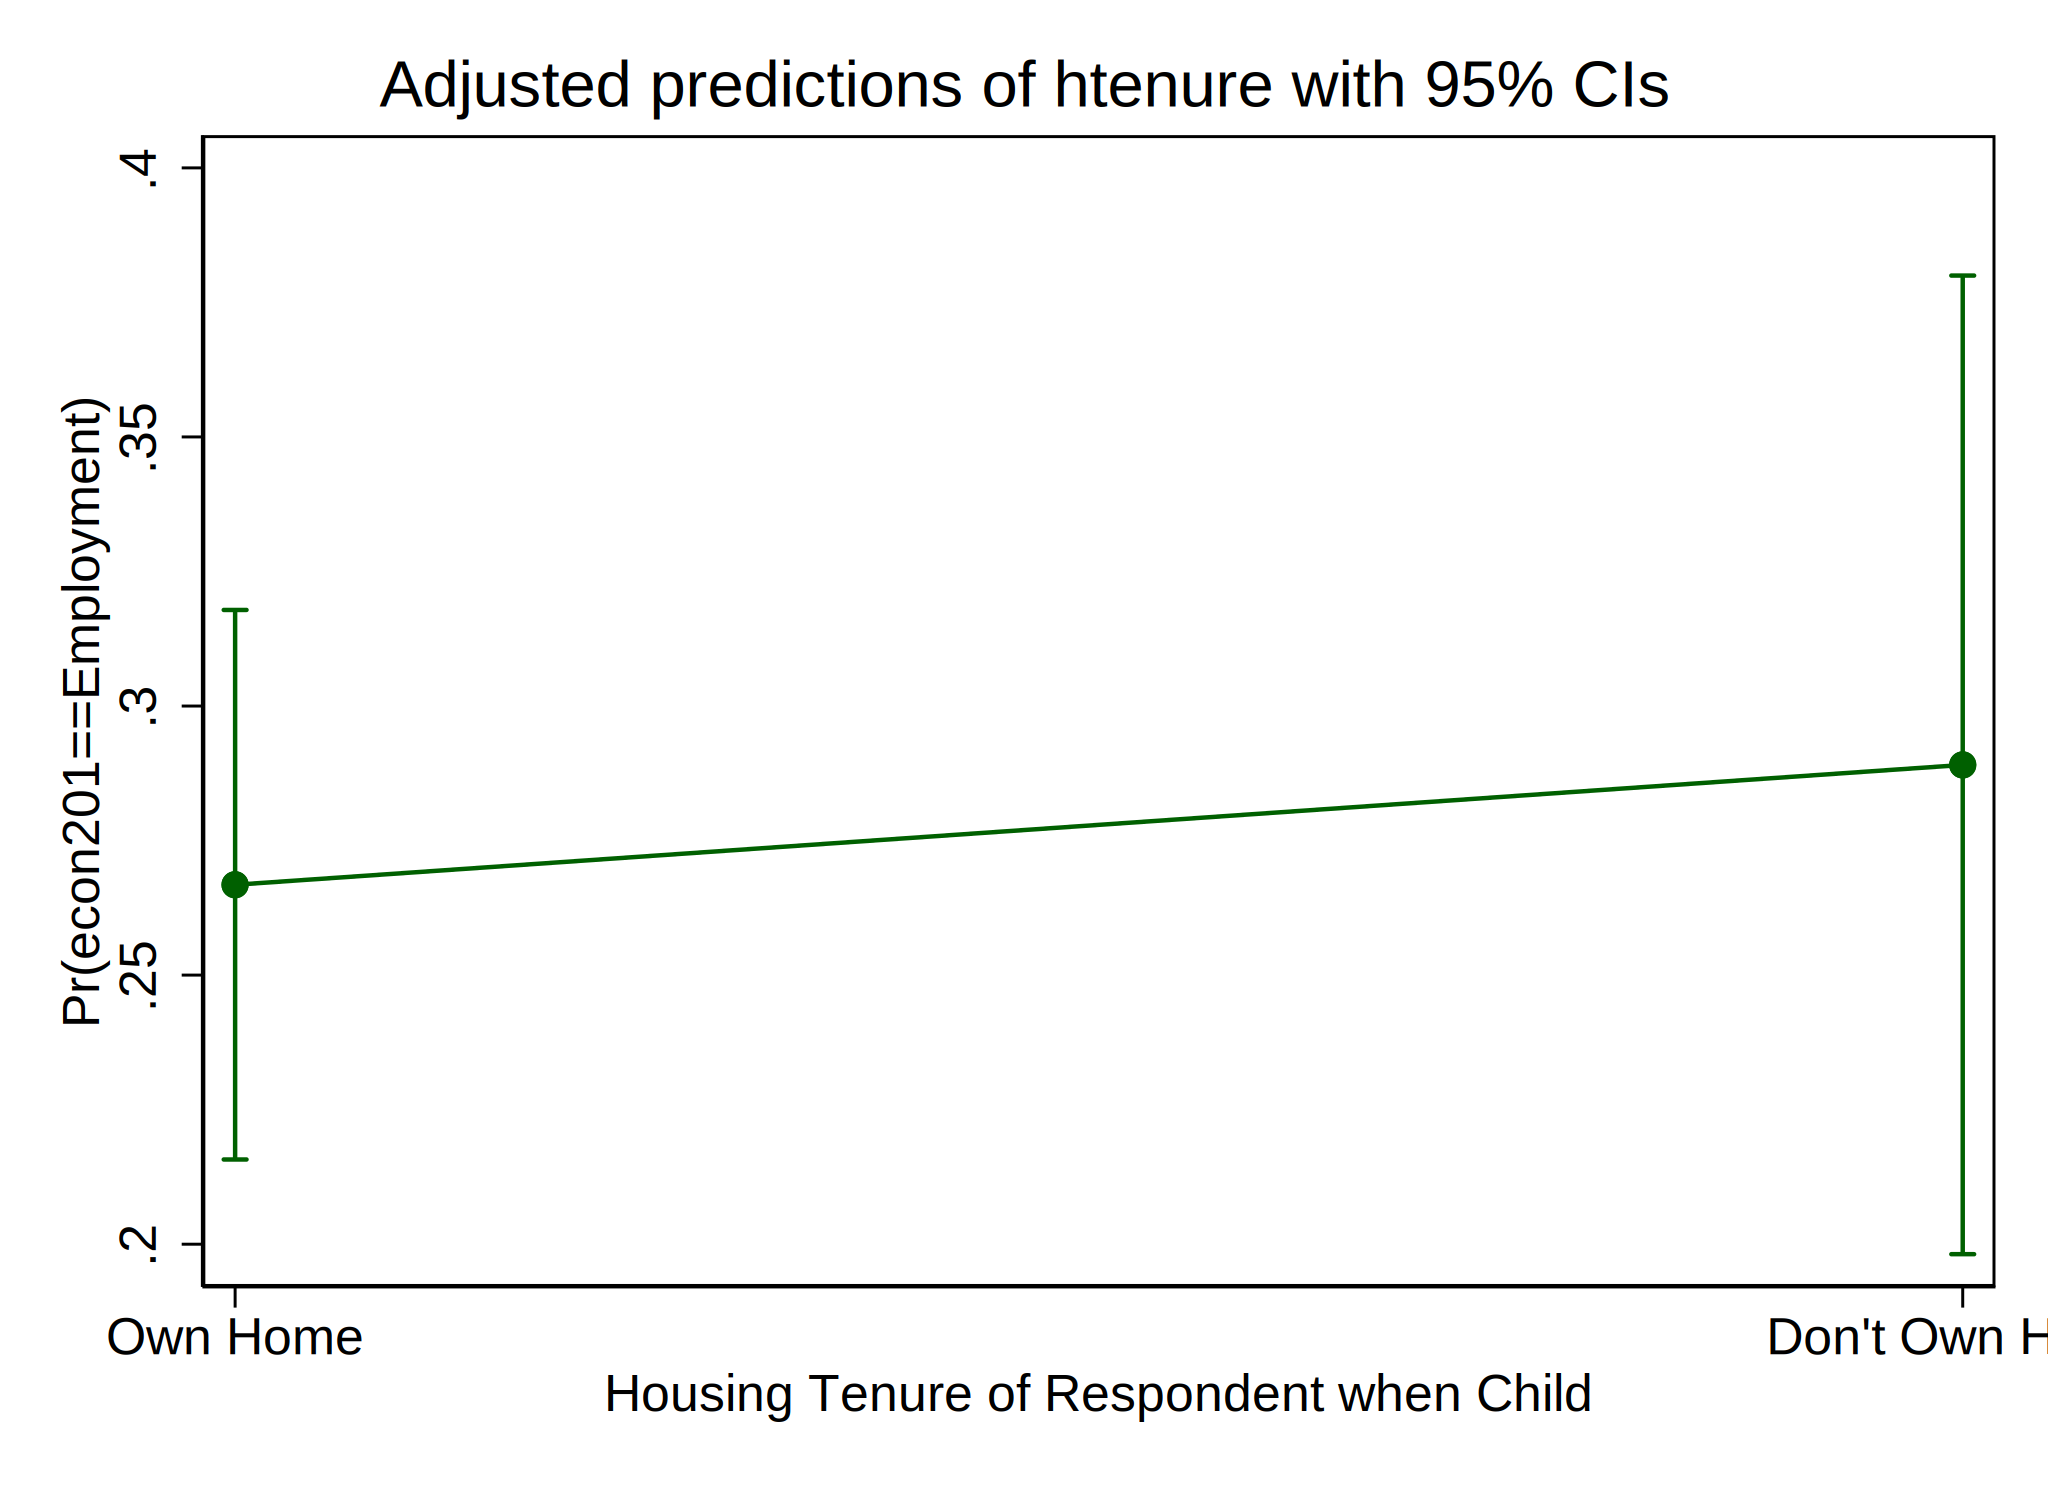

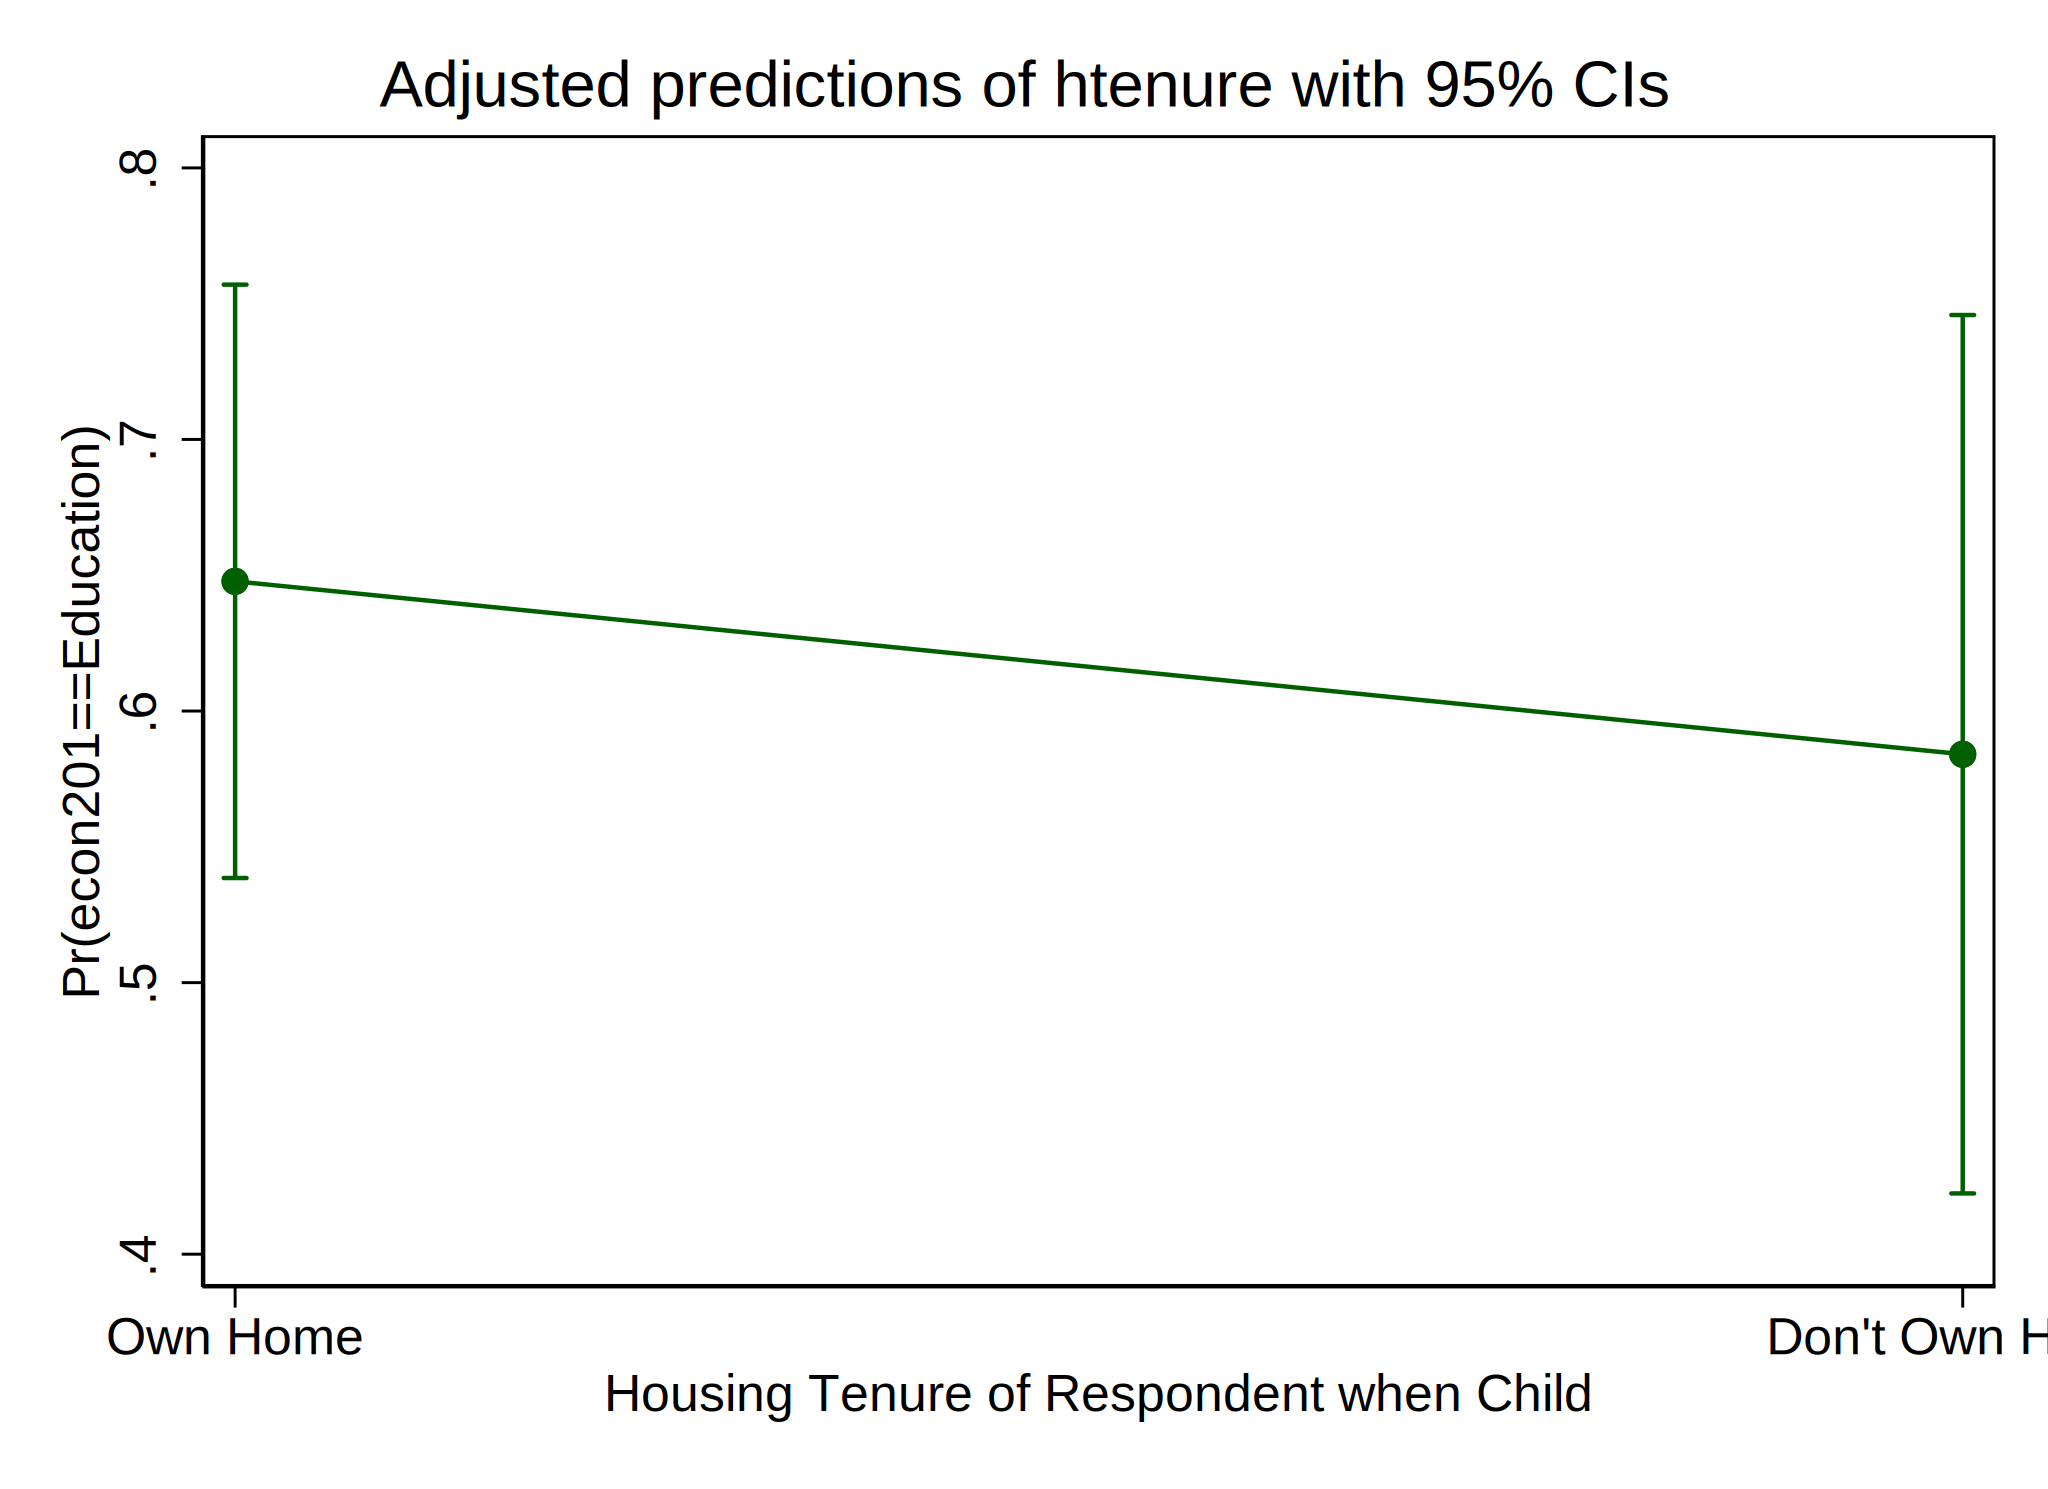

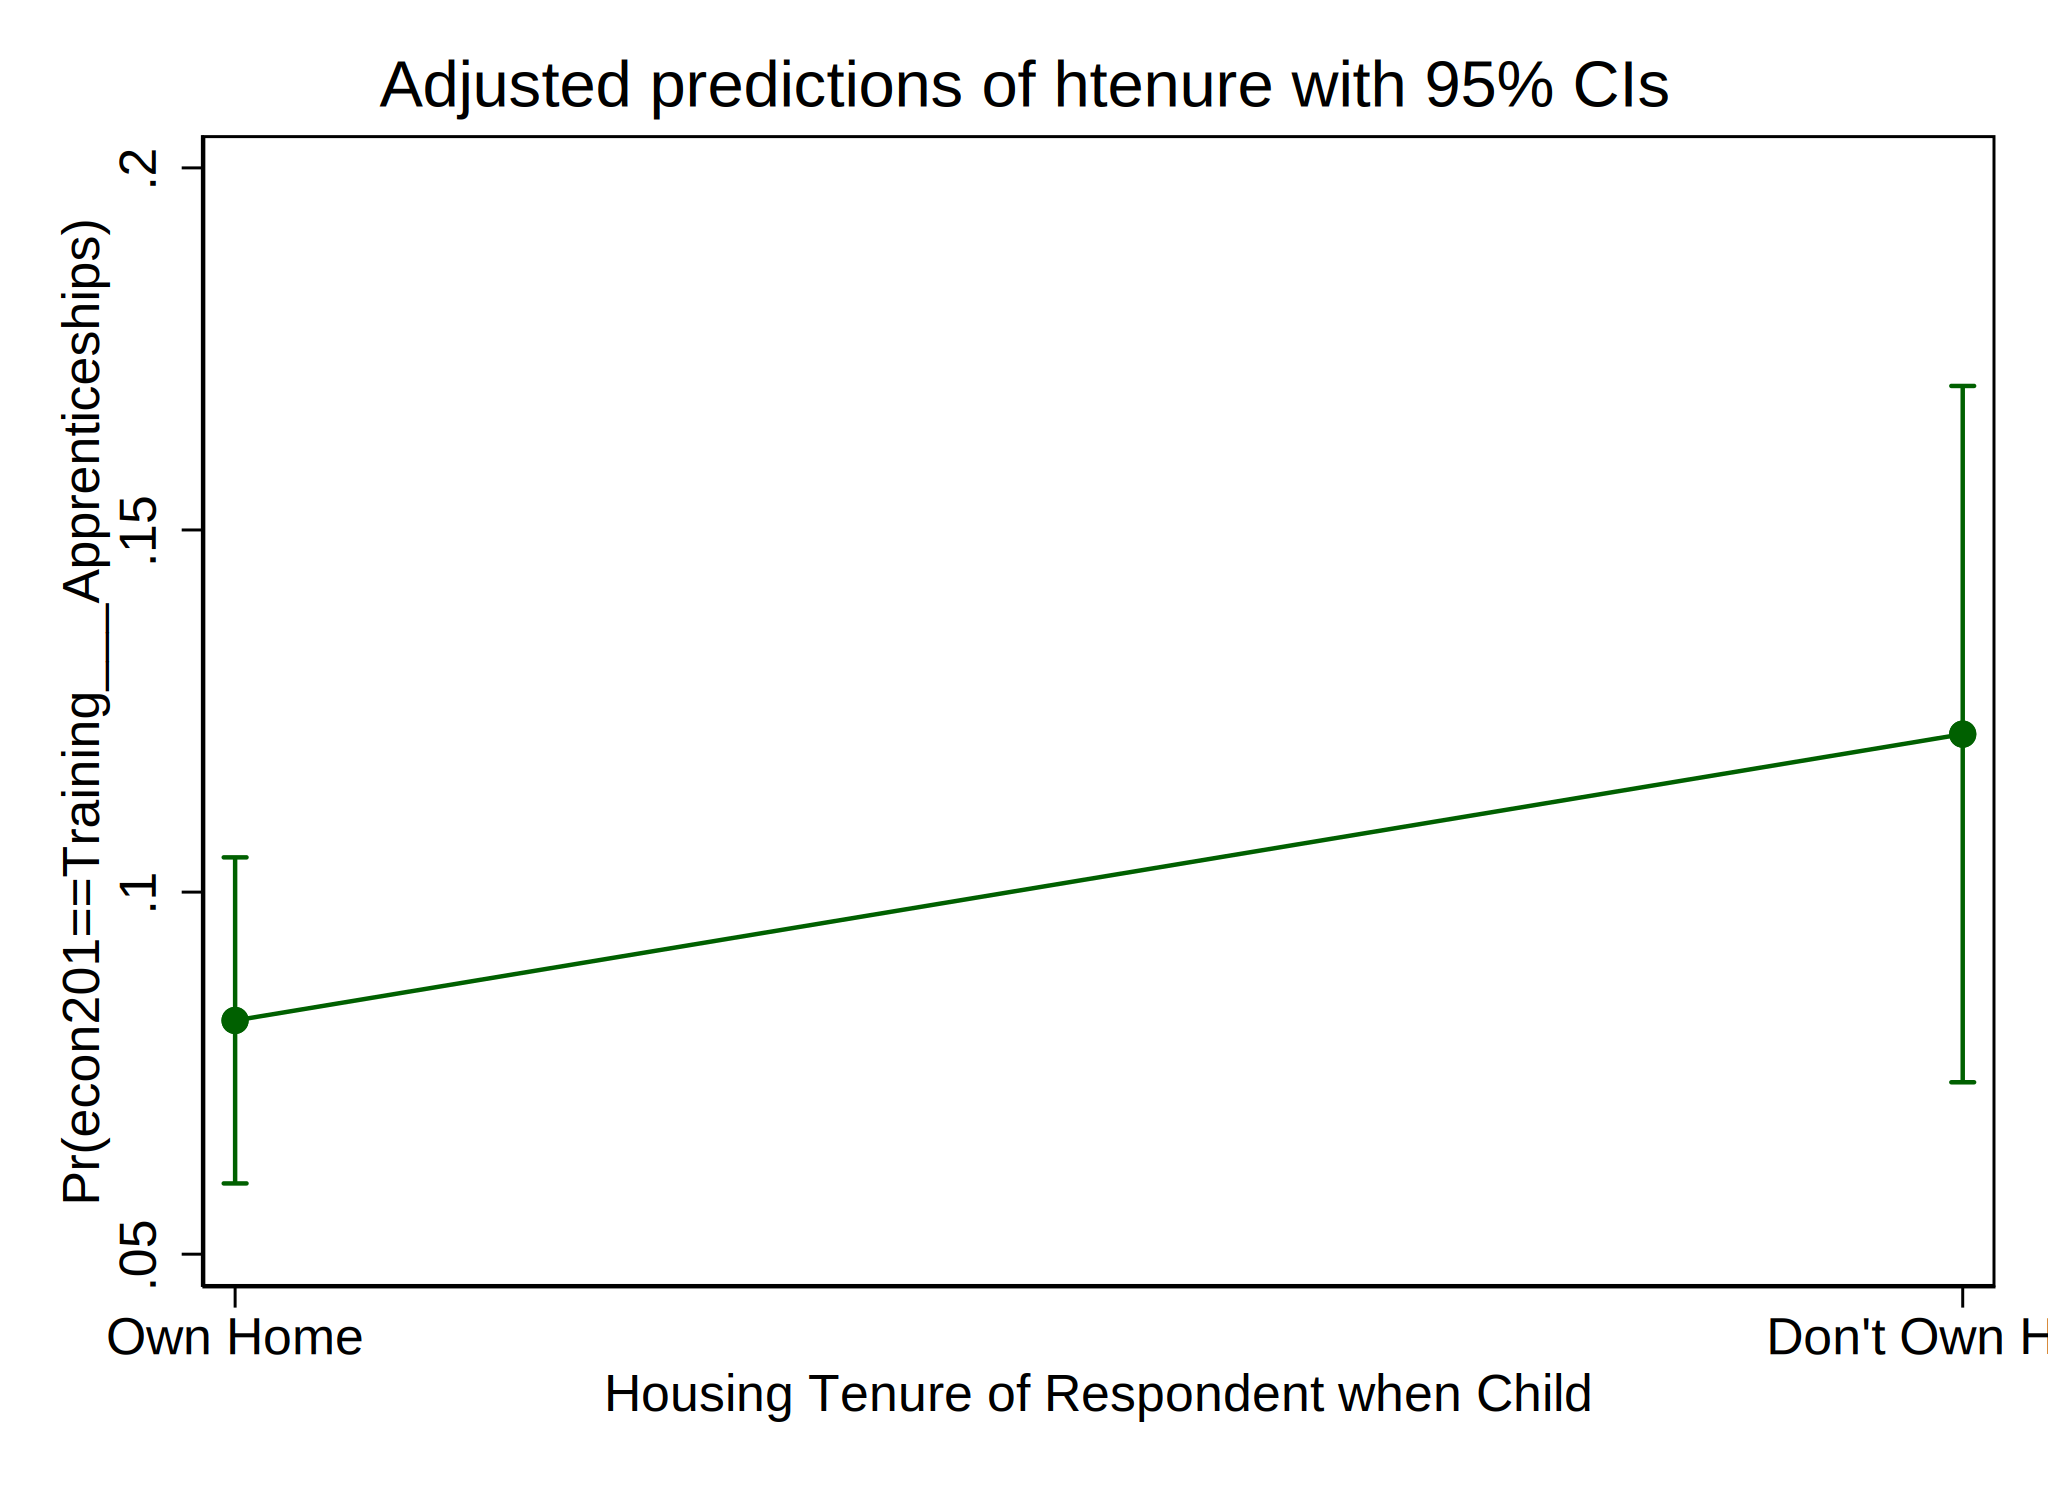

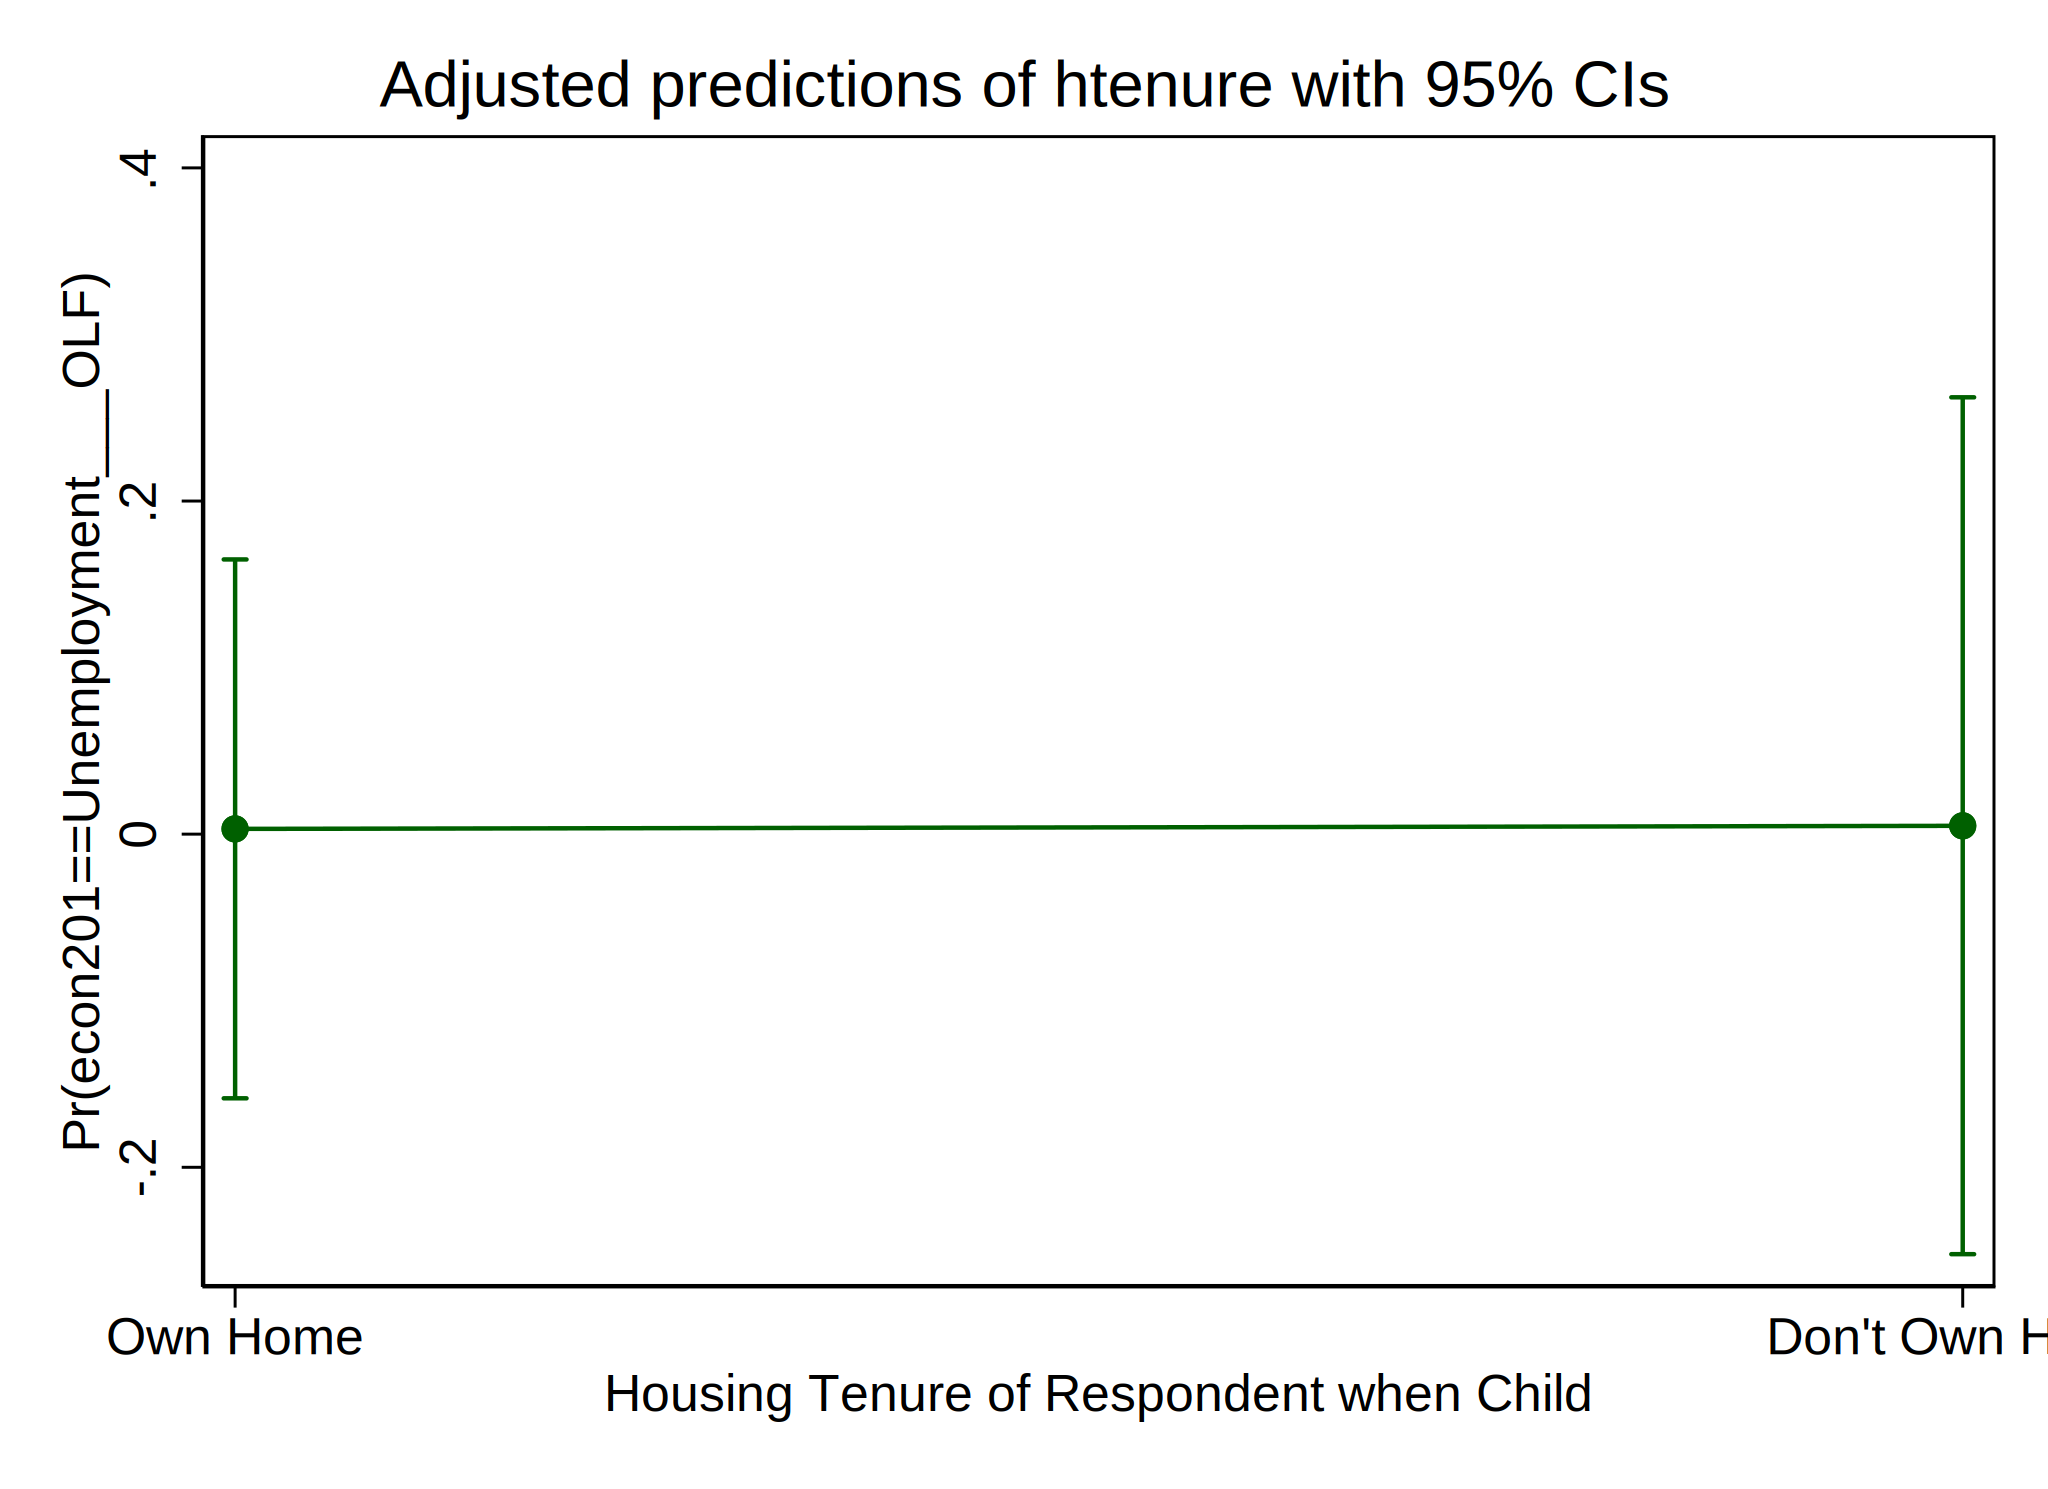

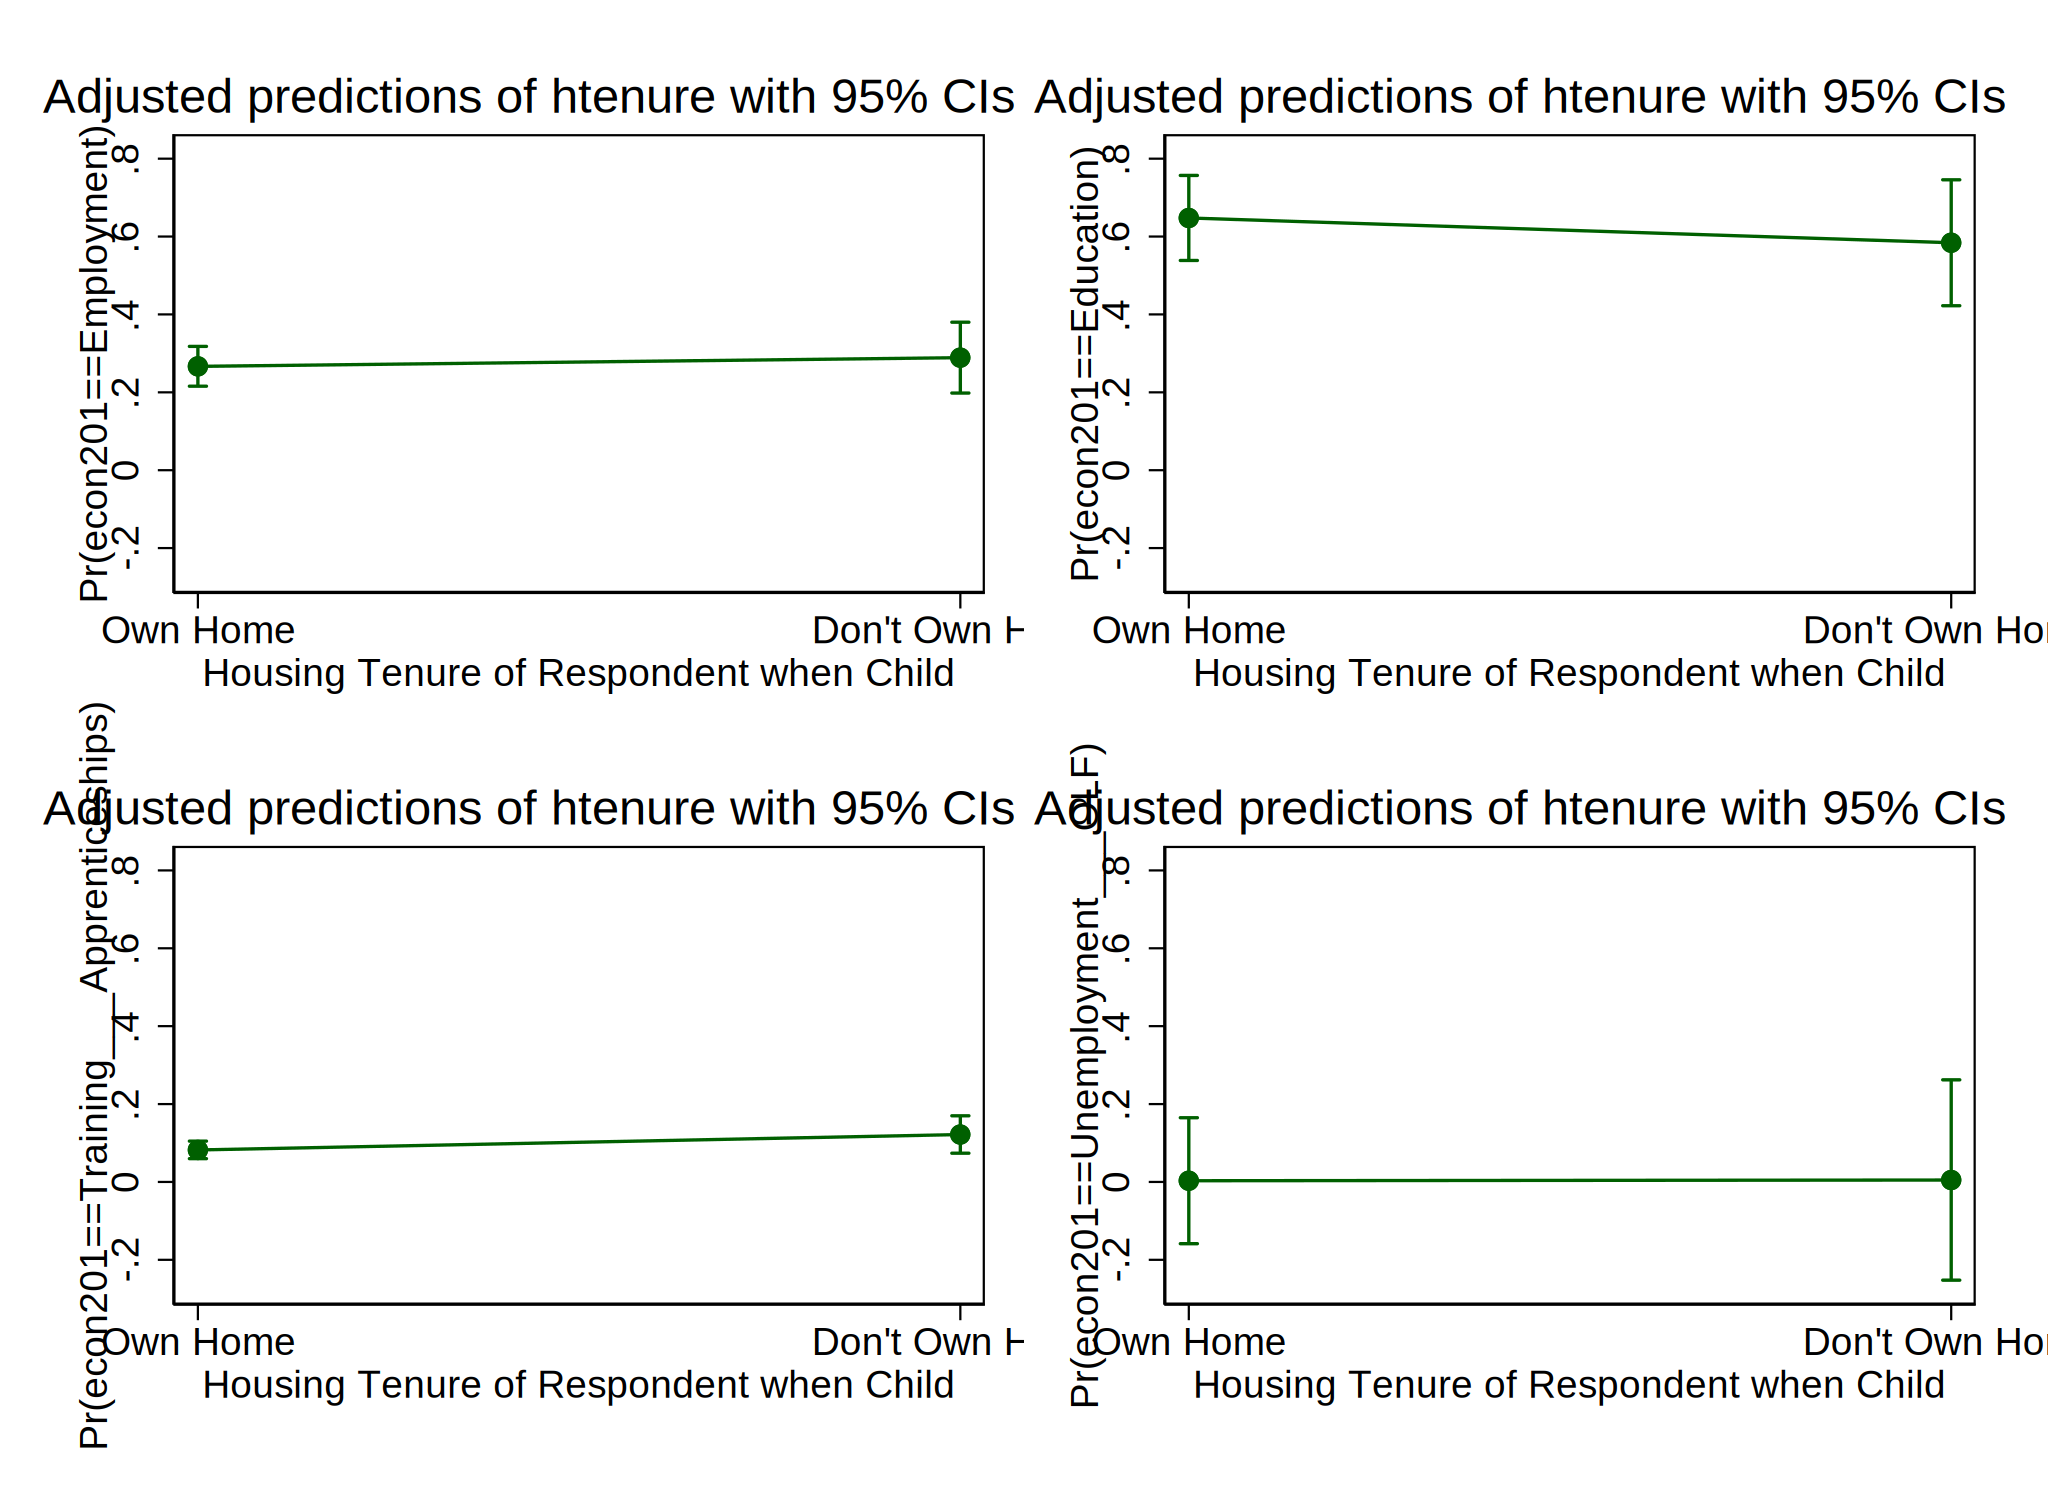

In [23]:
%%stata

set scheme s1color, permanent 

mlogit econ201 i.obin i.female i.htenure ib(8).nssecdom, b(2)

margins nssecdom, atmeans predict(outcome(1))
marginsplot, name(n1)
margins nssecdom, atmeans predict(outcome(2))
marginsplot, name(n2)
margins nssecdom, atmeans predict(outcome(3))
marginsplot, name(n3)
margins nssecdom, atmeans predict(outcome(4))
marginsplot, name(n4)
	
graph combine n1 n2 n3 n4, ycommon
graph save "bcsnssec.gph", replace

mlogit econ201 i.obin i.female i.htenure ib(8).nssecdom, b(2)

margins female, atmeans predict(outcome(1))
marginsplot, name(f1)
margins female, atmeans predict(outcome(2))
marginsplot, name(f2)
margins female, atmeans predict(outcome(3))
marginsplot, name(f3)
margins female, atmeans predict(outcome(4))
marginsplot, name(f4)

graph combine f1 f2 f3 f4, ycommon
graph save "sexbcs.gph", replace

mlogit econ201 i.obin i.female i.htenure ib(8).nssecdom, b(2)

margins obin, atmeans predict(outcome(1))
marginsplot, name(o1)
margins obin, atmeans predict(outcome(2))
marginsplot, name(o2)
margins obin, atmeans predict(outcome(3))
marginsplot, name(o3)
margins obin, atmeans predict(outcome(4))
marginsplot, name(o4)

graph combine o1 o2 o3 o4, ycommon
graph save "obinbcs.gph", replace

mlogit econ201 i.obin i.female i.htenure ib(8).nssecdom, b(2)

margins htenure, atmeans predict(outcome(1))
marginsplot, name(t1)
margins htenure, atmeans predict(outcome(2))
marginsplot, name(t2)
margins htenure, atmeans predict(outcome(3))
marginsplot, name(t3)
margins htenure, atmeans predict(outcome(4))
marginsplot, name(t4)

graph combine t1 t2 t3 t4, ycommon
graph save "tenurebcs.gph", replace

Producing Quasi-variance statistics

In [24]:
%%stata

quietly mlogit econ201 i.obin i.female i.htenure ib(8).nssecdom, b(2)

vce


. 
. quietly mlogit econ201 i.obin i.female i.htenure ib(8).nssecdom, b(2)

. 
. vce

Covariance matrix of coefficients of mlogit model

             | Employment                                                 
             |          1.          1.          1.          1.          2.
        e(V) |       obin      female     htenure    nssecdom    nssecdom 
-------------+------------------------------------------------------------
Employment   |                                                            
      1.obin |  .01740274                                                 
    1.female |  .00150021   .01575278                                     
   1.htenure |  .00057934    .0006086   .02344351                         
  1.nssecdom | -.00220982   .00088742   .00721421   .10265125             
  2.nssecdom | -.00433464   .00053763   .00729443   .02553284   .07924409 
  3.nssecdom | -.00248066  -.00008454   .00576447   .02475614   .02509754 
  4.nssecdom | -.00238222   .00091093

  5.nssecdom |          0           0           0           0           0 
  6.nssecdom |          0           0           0           0           0 
  7.nssecdom |          0           0           0           0           0 
       _cons |          0           0           0           0           0 

             | Education              | Training~s                         
             |         7o.          o.|          1.          1.          1.
        e(V) |   nssecdom       _cons |       obin      female     htenure 
-------------+------------------------+------------------------------------
Education    |                        |                                    
 7o.nssecdom |          0             |                                    
     o._cons |          0           0 |                                    
-------------+------------------------+------------------------------------
Training__~s |                        |                                    
      1.obin | 

RGSC and CAMSIS models

In [25]:
%%stata

mlogit econ201 i.obin i.female i.htenure ib(6).rgscdom, b(2)
est store modeltwo
etable, append
fitstat

mlogit econ201 i.obin i.female i.htenure ib(6).rgscdom, b(2)
margins, dydx(*) post


mlogit econ201 i.obin i.female i.htenure camsisf, b(2)
est store modelthree
etable, append
fitstat

mlogit econ201 i.obin i.female i.htenure camsisf, b(2)
margins, dydx(*) post



. 
. mlogit econ201 i.obin i.female i.htenure ib(6).rgscdom, b(2)

Iteration 0:  Log likelihood = -1480.2282  
Iteration 1:  Log likelihood = -1358.3838  
Iteration 2:  Log likelihood = -1349.2081  
Iteration 3:  Log likelihood = -1348.6997  
Iteration 4:  Log likelihood = -1348.6138  
Iteration 5:  Log likelihood = -1348.5993  
Iteration 6:  Log likelihood = -1348.5959  
Iteration 7:  Log likelihood = -1348.5951  
Iteration 8:  Log likelihood = -1348.5949  
Iteration 9:  Log likelihood = -1348.5949  

Multinomial logistic regression                         Number of obs =  1,524
                                                        LR chi2(24)   = 263.27
                                                        Prob > chi2   = 0.0000
Log likelihood = -1348.5949                             Pseudo R2     = 0.0889

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+--

Log-Lik Intercept Only:    -1480.228     Log-Lik Full Model:        -1348.595
D(1472):                    2697.190     LR(24):                      263.267
                                         Prob > LR:                     0.000
McFadden's R2:                 0.089     McFadden's Adj R2:             0.054
Maximum Likelihood R2:         0.159     Cragg & Uhler's R2:            0.185
Count R2:                      0.611     Adj Count R2:                  0.020
AIC:                           1.838     AIC*n:                      2801.190
BIC:                       -8091.236     BIC':                        -87.368

. 
. mlogit econ201 i.obin i.female i.htenure ib(6).rgscdom, b(2)

Iteration 0:  Log likelihood = -1480.2282  
Iteration 1:  Log likelihood = -1358.3838  
Iteration 2:  Log likelihood = -1349.2081  
Iteration 3:  Log likelihood = -1348.6997  
Iteration 4:  Log likelihood = -1348.6138  
Iteration 5:  Log likelihood = -1348.5993  
Iteration 6:  Log likelihood = -1348.5959  


Iteration 0:  Log likelihood = -1480.2282  
Iteration 1:  Log likelihood = -1362.4799  
Iteration 2:  Log likelihood = -1355.6907  
Iteration 3:  Log likelihood = -1355.5331  
Iteration 4:  Log likelihood = -1355.5316  
Iteration 5:  Log likelihood = -1355.5316  

Multinomial logistic regression                         Number of obs =  1,524
                                                        LR chi2(12)   = 249.39
                                                        Prob > chi2   = 0.0000
Log likelihood = -1355.5316                             Pseudo R2     = 0.0842

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+----------------------------------------------------------------
Employment   |
        obin |
Five or m..  |  -1.023868   .1315656    -7.78   0.000    -1.281731   -.7660036
             |
      female |
       Male  |  -.5518435   .1254578    -4

Log-Lik Intercept Only:    -1480.228     Log-Lik Full Model:        -1355.532
D(1492):                    2711.063     LR(12):                      249.393
                                         Prob > LR:                     0.000
McFadden's R2:                 0.084     McFadden's Adj R2:             0.063
Maximum Likelihood R2:         0.151     Cragg & Uhler's R2:            0.176
Count R2:                      0.605     Adj Count R2:                  0.005
AIC:                           1.821     AIC*n:                      2775.063
BIC:                       -8223.945     BIC':                       -161.444

. 
. mlogit econ201 i.obin i.female i.htenure camsisf, b(2)

Iteration 0:  Log likelihood = -1480.2282  
Iteration 1:  Log likelihood = -1362.4799  
Iteration 2:  Log likelihood = -1355.6907  
Iteration 3:  Log likelihood = -1355.5331  
Iteration 4:  Log likelihood = -1355.5316  
Iteration 5:  Log likelihood = -1355.5316  

Multinomial logistic regression                  

Model Tables

In [26]:
%%stata


est table modelone modeltwo modelthree, stats(ll bic N) b(%9.4g) star

collect style showbase all

collect label levels etable_depvar 1 "NS-SEC Model" ///
										2 "RGSC Model" ///
										3 "CAMSIS Model", modify

collect style cell, font(Times New Roman)

etable, replay column(depvar) ///
cstat(_r_b, nformat(%4.2f))  ///
		cstat(_r_se, nformat(%6.2f))  ///
		showstars showstarsnote  ///
		stars(.05 "*" .01 "**" .001 "***", attach(_r_b)) ///
		mstat(N) mstat(aic) mstat(bic) mstat(r2_a)	///
		title("Table 2: Regression Models") ///
		titlestyles(font(Arial Narrow, size(14) bold)) ///
		note("Data Source: NCDS") ///
		notestyles(font(Arial Narrow, size(10) italic)) ///
		export("margins.docx", replace)  
        
        
save ncds4_cca, replace



. 
. 
. est table modelone modeltwo modelthree, stats(ll bic N) b(%9.4g) star

-----------------------------------------------------------
    Variable |   modelone       modeltwo      modelthree   
-------------+---------------------------------------------
Employment   |
        obin |
          1  |    -1.059***      -1.061***      -1.024***  
             |
      female |
          1  |    -.5526***      -.5445***      -.5518***  
             |
     htenure |
          1  |     .1837          .2147          .1373     
             |
    nssecdom |
          1  |    -.6515*                                  
          2  |    -.4636                                   
          3  |    -.3524                                   
          4  |    -.3189                                   
          5  |   -.06815                                   
          6  |     .1541                                   
          7  |   -.08095                                   
             |
     

(collection ETable exported to file margins.docx)

.         
.         
. save ncds4_cca, replace
file ncds4_cca.dta saved

. 


Part Four: Missing Data

BCS doesn't offer a tracking variable within waves so one needs to be constructed. I do not wish to impute dead people or migrants from the survey. I therefore take the oldest cohort I am taking data from - BCS wave 30 and generate a variable for all active partipants that have answered at least one item in the survey - this will be used as a baseline of how many people to impute. 

In [27]:
%%stata

cd "G:\Stata data and do\BCS\BCS Sweep 30\UKDA-5558-stata\stata\stata11_se"
use "G:\Stata data and do\BCS\BCS Sweep 30\UKDA-5558-stata\stata\stata11_se\bcs2000"

gen coh=1 

keep coh bcsid

cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two"

merge m:m bcsid using BCS_Chapter_Two
drop _merge


. 
. cd "G:\Stata data and do\BCS\BCS Sweep 30\UKDA-5558-stata\stata\stata11_se"
G:\Stata data and do\BCS\BCS Sweep 30\UKDA-5558-stata\stata\stata11_se

. use "G:\Stata data and do\BCS\BCS Sweep 30\UKDA-5558-stata\stata\stata11_se\b
> cs2000"

. 
. gen coh=1 

. 
. keep coh bcsid

. 
. cd "G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Tw
> o"
G:\Stata data and do\Tables and Figures\Tables and Figures for Chapter Two

. 
. merge m:m bcsid using BCS_Chapter_Two

    Result                      Number of obs
    -----------------------------------------
    Not matched                         7,426
        from master                         0  (_merge==1)
        from using                      7,426  (_merge==2)

    Matched                            11,261  (_merge==3)
    -----------------------------------------

. drop _merge

. 


In [30]:
%%stata

drop if missing(coh)

misstable summarize econ201 obin female htenure camsisf

misstable patterns econ201 obin female htenure camsisf 


. 
. misstable summarize econ201 obin female htenure camsisf
                                                               Obs<.
                                                +------------------------------
               |                                | Unique
      Variable |     Obs=.     Obs>.     Obs<.  | values        Min         Max
  -------------+--------------------------------+------------------------------
       econ201 |    15,271               3,416  |      4          1           4
          obin |    11,595               7,092  |      2          0           1
        female |       540              18,147  |      2          0           1
       htenure |     4,077              14,610  |      2          0           1
       camsisf |     6,270              12,417  |    263       13.1        87.9
  -----------------------------------------------------------------------------

. 
. misstable patterns econ201 obin female htenure camsisf 

      Missing-value patterns


In [31]:
%%stata

egen all_missing = rowmiss(econ201 obin female htenure camsisf)

tab all_missing

drop if all_missing == 5



. 
. egen all_missing = rowmiss(econ201 obin female htenure camsisf)

. 
. tab all_missing

all_missing |      Freq.     Percent        Cum.
------------+-----------------------------------
          0 |      1,540        8.24        8.24
          1 |      5,588       29.90       38.14
          2 |      6,200       33.18       71.32
          3 |      1,834        9.81       81.14
          4 |      3,362       17.99       99.13
          5 |        163        0.87      100.00
------------+-----------------------------------
      Total |     18,687      100.00

. 
. drop if all_missing == 5
(163 observations deleted)

. 


In [33]:
%%stata

foreach var in i.pmart i.parity i.breast i.mage i.med i.fed{
	regress econ201 `var'
	testparm `var'
}


. 
. drop if missing(coh)
(7,263 observations deleted)

. 
. 
. foreach var in i.pmart i.parity i.breast i.mage i.med i.fed{
  2.         regress econ201 `var'
  3.         testparm `var'
  4. }

      Source |       SS           df       MS      Number of obs   =     2,924
-------------+----------------------------------   F(1, 2922)      =      0.34
       Model |  .215951992         1  .215951992   Prob > F        =    0.5599
    Residual |  1856.59253     2,922  .635384165   R-squared       =    0.0001
-------------+----------------------------------   Adj R-squared   =   -0.0002
       Total |  1856.80848     2,923  .635240671   Root MSE        =    .79711

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       pmart |
    Married  |   .0380113   .0652007     0.58   0.560    -.0898327    .16585

In [36]:
%%stata

mi set wide

mi register imputed econ201 obin female htenure camsisf pmart parity breast mage med fed
tab _mi_miss

SystemError: 
. 
. 
. mi set wide

. 
. mi register imputed econ201 obin female htenure camsisf pmart parity breast m
> age med fed
variables econ201 obin female htenure camsisf pmart parity breast mage med fed
already registered as imputed
r(110);
r(110);


In [37]:
%%stata

mi impute chained ///
///
(logit, augment) obin female htenure pmart breast ///
///
(mlogit, augment) econ201 parity mage med fed ///
///
(regress) camsisf ///
///
, rseed(12346) dots force add(5) burnin(20) savetrace(MI_test_trace_BCS, replace)


. 
. mi impute chained ///
> ///
> (logit, augment) obin female htenure pmart breast ///
> ///
> (mlogit, augment) econ201 parity mage med fed ///
> ///
> (regress) camsisf ///
> ///
> , rseed(12346) dots force add(5) burnin(20) savetrace(MI_test_trace_BCS, repl
> ace)
note: variable female contains no soft missing (.) values; imputing nothing

Conditional models:
             pmart: logit pmart i.female i.parity i.htenure i.mage i.breast
                     i.med i.fed camsisf i.obin i.econ201 , augment
            parity: mlogit parity i.female i.pmart i.htenure i.mage i.breast
                     i.med i.fed camsisf i.obin i.econ201 , augment
           htenure: logit htenure i.female i.pmart i.parity i.mage i.breast
                     i.med i.fed camsisf i.obin i.econ201 , augment
              mage: mlogit mage i.female i.pmart i.parity i.htenure i.breast
                     i.med i.fed camsisf i.obin i.econ201 , augment
            breast: logit breast i.female i.pmart i.pa

In [38]:
%%stata

mi estimate, post dots: mlogit econ201 i.obin i.female i.htenure camsisf, b(2)

est store imp

etable

save bcs_mi, replace


. 
. mi estimate, post dots: mlogit econ201 i.obin i.female i.htenure camsisf, b(2
> )

Imputations (5):
  ..... done

Multiple-imputation estimates                   Imputations       =          5
Multinomial logistic regression                 Number of obs     =     11,261
                                                Average RVI       =     4.7953
                                                Largest FMI       =     0.9687
DF adjustment:   Large sample                   DF:     min       =       4.37
                                                        avg       =       8.85
                                                        max       =      20.04
Model F test:       Equal FMI                   F(  12,   65.4)   =      23.34
Within VCE type:          OIM                   Prob > F          =     0.0000

------------------------------------------------------------------------------
     econ201 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
----------